# 1 Intro

Notebook dédié:
- à l'exploration des différents datasets
- à la selection des features utilisées dans la conception du modèle de ML
- au feature engineering

Le kernel proposé en ressource de ce projet ne sera pas utilisé. Après 1er check, je me rends compte que le dataset obtenu est très lourd, pas très compréhensible en terme de features obtenues.
Ainsi après un modèle V0 ne comprenant qu'une 15aine de feature issues du dataser application_train et un ROC_AUC de 0.74, le but de cette version est:
- de retrouver dans les autres datasets forunis des informations sur l'historique des clients:
    - montants empruntés
    - dossiers rejetés ou non 
    - présence d'impayés ou non
- d'utiliser qld features issues du kernel fourni en ressources:
    - INCOME_CREDIT_PERC
    - ANNUITY_INCOME_PERC
    - PAYMENT_RATE
    - INCOME_PER_PERSON

## 1.1. Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import missingno as msno

## 1.2. Fonctions utiles / set-up

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def dupl(df):
    
    """Affichage du nb de duplicated dans le dataset selectionné"""
    
    nDupl = df.duplicated().sum()
    print (f'Le dataset contient {nDupl} doublon(s)')

In [4]:
DISPLAY=False

"""If Dispaly == False then all cell starting starting with 'If Display=True' won't be ran.
Else they will

This short function allows to by-pass instructions which are long to run (ex MSNO on huge dataset or sns.pairplot)"""

"If Dispaly == False then all cell starting starting with 'If Display=True' won't be ran.\nElse they will\n\nThis short function allows to by-pass instructions which are long to run (ex MSNO on huge dataset or sns.pairplot)"

# 2 Data

## 2.1 Import and display

- 8 datasets disponibles.
- Application_test ne sera pas utilisé dans le cadre de l'exploration 

#### Application_train

In [4]:
pwd

'c:\\Users\\xavie\\P7\\P7_ML_model'

In [5]:
train=pd.read_csv('../application_train.csv')

In [6]:
train.shape

(307511, 122)

In [7]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
col_train=train.columns.to_list()
col_train

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

#### Previous_application

In [4]:
previous=pd.read_csv('../previous_application.csv')

In [69]:
previous.shape

(1670214, 37)

In [53]:
previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [20]:
previous.columns.to_list()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

De ce fichier, récupérer, via un groupby:
- le nb d'anciens dossiers par client,
- le montant total emprunté, 
- la présence d'impayés
- le statut accepté ou refusé

#### POS_CASH_balance

In [5]:
pcb=pd.read_csv('../POS_CASH_balance.csv')

In [6]:
pcb.shape

(10001358, 8)

In [12]:
pcb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

De ce fichier récupérer pour chaque ancien dossier, la feature SK_DPD. Si <> 0, je considère qu'il y a eu un impayé

#### credit_card_balance

In [7]:
ccb=pd.read_csv('../credit_card_balance.csv')
ccb.shape

(3840312, 23)

In [33]:
ccb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

De ce fichier récupérer pour chaque ancien dossier, la feature SK_DPD. Si <> 0, je considère qu'il y a eu un impayé

#### installment_payments

In [8]:
ip=pd.read_csv('../installments_payments.csv')
ip.shape

(13605401, 8)

In [15]:
ip.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

Fichier ignoré: pas d'information qui m'interesse à ce stade

#### bureau

In [9]:
bureau=pd.read_csv('../bureau.csv',sep=';')
bureau.shape

(1048575, 17)

In [17]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

De ce fichier, récupérer, via un groupby:
- le nb de dossiers par client ouverts dans d'autres EC,
- le montant total emprunté, 
- la présence d'impayés

Le nb de prolongations (CNT_CREDIT_PROLONG) aurait pu être interessant mais n'est pas disponible dans le dataset previous=> je l'ignore

#### bureau_balance

In [10]:
bb=pd.read_csv('../bureau_balance.csv')
bb.shape

(27299925, 3)

In [19]:
bb.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

Fichier ignoré: pas d'information qui m'interesse à ce stade

## 2.2 Structure

In [9]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [10]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## 2.3 NaN & Duplicated

- bureau_balance et installment_payments ignorés car ne seront pas utilisés

### application_train

In [12]:
train.isna().mean().sort_values(ascending=False).round(2)

COMMONAREA_MEDI             0.70
COMMONAREA_AVG              0.70
COMMONAREA_MODE             0.70
NONLIVINGAPARTMENTS_MODE    0.69
NONLIVINGAPARTMENTS_AVG     0.69
                            ... 
NAME_HOUSING_TYPE           0.00
NAME_FAMILY_STATUS          0.00
NAME_EDUCATION_TYPE         0.00
NAME_INCOME_TYPE            0.00
SK_ID_CURR                  0.00
Length: 122, dtype: float64

In [13]:
train.isna().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [14]:
if DISPLAY:
    for keys, values in dict_data.items():
        print(keys)
        msno.matrix(values)
        print('____________\n')

In [15]:
dupl(train)

Le dataset contient 0 doublon(s)


### previous application

In [70]:
previous.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

Parmi les features qui m'interessent seul AMT_CREDIT contient 1 NaN => a supprimer

In [71]:
previous.loc[previous['AMT_CREDIT'].isna()]


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1127152     2204450      438387    Revolving loans          0.0   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1127152              0.0         NaN               NaN              NaN   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1127152                     FRIDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1127152                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1127152                NaN                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1127152                    XAP             Approved           -608   

        NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
1127152               XNA                XAP             NaN         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  CHANNEL_TYPE  \
1127152                 XNA          Cards           walk-in  Country-wide   

         SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1127152                20         Connectivity          0.0              XNA   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
1127152         Card Street                 NaN             NaN   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
1127152                        NaN            NaN               NaN   

         NFLAG_INSURED_ON_APPROVAL  
1127152                        NaN

In [72]:
previous=previous.drop(previous.loc[previous['AMT_CREDIT'].isna()].index).reset_index(drop=True)
previous.shape


(1670213, 37)

In [57]:
dupl(previous)

Le dataset contient 0 doublon(s)


   ### POS_CASH_balance¶

In [29]:
pcb.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

Pas de NaN sur SK_DPD

In [38]:
dupl(pcb)

Le dataset contient 0 doublon(s)


### credit_card_balance

In [34]:
ccb.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

Pas de NaN sur SK_DPD

In [39]:
dupl(ccb)

Le dataset contient 0 doublon(s)


### bureau

In [35]:
bureau.isna().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE        65119
DAYS_ENDDATE_FACT         389308
AMT_CREDIT_MAX_OVERDUE    690835
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 7
AMT_CREDIT_SUM_DEBT       157335
AMT_CREDIT_SUM_LIMIT      365062
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
AMT_ANNUITY               729443
dtype: int64

Parmi les features qui m'interessent seule AMT_CREDIT_SUM contient des NaN

In [36]:
bureau.loc[bureau['AMT_CREDIT_SUM'].isna()]


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
218508      405791       6008179        Active      currency 1            0   
314570      418331       6064357        Active      currency 1            0   
572703      367465       6299480        Active      currency 1            0   
585311      371162       6452468        Closed      currency 1            0   
590328      209921       5491946        Closed      currency 1           -5   
814128      425959       6388671        Active      currency 1            0   
987620      375588       5078559        Active      currency 1            0   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
218508                   0                  NaN                NaN   
314570                   0                  NaN                NaN   
572703                   0                388.0                NaN   
585311                   0                  NaN             -111.0   
590328                   0                  NaN              -46.0   
814128                   0                  NaN                NaN   
987620                   0                  NaN                NaN   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
218508                     NaN                   0             NaN   
314570                     NaN                   0             NaN   
572703                     NaN                   0             NaN   
585311                     NaN                   0             NaN   
590328                     NaN                   0             NaN   
814128                     NaN                   0             NaN   
987620                     NaN                   0             NaN   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
218508             654993.0                   NaN                     0.0   
314570            2250000.0                   NaN                     0.0   
572703            1204582.5                   NaN                     0.0   
585311                  0.0                   NaN                     0.0   
590328                  0.0                   NaN                     0.0   
814128             185926.5                   NaN                     0.0   
987620            1309572.0                   NaN                     0.0   

                 CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
218508  Another type of loan                  -5          NaN  
314570  Another type of loan                 -16          NaN  
572703  Another type of loan                  -5          NaN  
585311  Another type of loan                 -64          NaN  
590328  Another type of loan                 -36          NaN  
814128  Another type of loan                  -3          NaN  
987620  Another type of loan                 -39          NaN

Suppression de ces 7 lignes

In [37]:
bureau=bureau.drop(bureau.loc[bureau['AMT_CREDIT_SUM'].isna()].index).reset_index(drop=True)
bureau.shape

(1048568, 17)

In [40]:
dupl(bureau)

Le dataset contient 0 doublon(s)


# 3 Transformation des datasets autres que application et merge avec application_train

## Previous applications

In [74]:
previous['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036780
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

On ne conserve que les Refused et les Approved

In [76]:
previous=previous.drop(previous.loc[(previous['NAME_CONTRACT_STATUS']=='Canceled')|(previous['NAME_CONTRACT_STATUS']=='Unused offer')].index).reset_index(drop=True)
previous.shape

(1327458, 37)

Booléanisation du 'NAME_CONTRACT_STATUS'
- Refused = 1
- Accepted = 0

=> changement du nom de la features -> 'Contract_refused'

In [86]:
previous=previous.rename(columns={'NAME_CONTRACT_STATUS':'Contract_refused'})
previous['Contract_refused']

0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1327453    Approved
1327454    Approved
1327455    Approved
1327456    Approved
1327457    Approved
Name: Contract_refused, Length: 1327458, dtype: object

In [87]:
previous=previous.replace(to_replace={'Refused':1,'Approved':0})#, inplace=True)

In [98]:
previous['Contract_refused'].value_counts()

0    1036780
1     290678
Name: Contract_refused, dtype: int64

Changement du nom des autres colonnes

In [100]:
previous=previous.rename(columns={'SK_ID_PREV':'Prev_contract_nb','AMT_CREDIT':'Prev_AMT_CREDIT'})
                                

Group by:

In [101]:
previous_gb=previous.groupby('SK_ID_CURR').agg({
    'Prev_contract_nb':'count',
    #'CREDIT_ACTIVE':'max',
    'Prev_AMT_CREDIT':'sum',
    'Contract_refused':'sum'
    #'CREDIT_DAY_OVERDUE':'mean',
    #'CNT_CREDIT_PROLONG':'mean'
     })
previous_gb

Prev_contract_nb  Prev_AMT_CREDIT  Contract_refused
SK_ID_CURR                                                     
100001                     1          23787.0                 0
100002                     1         179055.0                 0
100003                     3        1452573.0                 0
100004                     1          20106.0                 0
100005                     1          40153.5                 0
...                      ...              ...               ...
456251                     1          40455.0                 0
456252                     1          56821.5                 0
456253                     2          41251.5                 0
456254                     2         268879.5                 0
456255                     8        3395448.0                 2

[338402 rows x 3 columns]

Ajout d'un taux de refus

In [103]:
previous_gb['Refused_rate']=previous_gb['Contract_refused']/previous_gb['Prev_contract_nb']
previous_gb.describe()

Prev_contract_nb  Prev_AMT_CREDIT  Contract_refused   Refused_rate
count     338402.000000     3.384020e+05     338402.000000  338402.000000
mean           3.922725     9.398779e+05          0.858972       0.134940
std            3.185509     1.468454e+06          1.831534       0.214682
min            1.000000     0.000000e+00          0.000000       0.000000
25%            2.000000     1.540676e+05          0.000000       0.000000
50%            3.000000     4.202375e+05          0.000000       0.000000
75%            5.000000     1.137670e+06          1.000000       0.250000
max           74.000000     4.359984e+07         68.000000       1.000000

## POS_CASH_balance
- Récupérer de ce dataset le nb de jours 'days past due' pour en déduire un indicateur 'impayé' => 'DPD_flag_pos'

In [130]:
pcb_gb=pcb.groupby('SK_ID_CURR').agg({
    'SK_DPD':'sum'
})
pcb_gb

SK_DPD
SK_ID_CURR        
100001           7
100002           0
100003           0
100004           0
100005           0
...            ...
456251           0
456252           0
456253           5
456254           0
456255           5

[337252 rows x 1 columns]

ajout d'un flag DPD:

In [131]:
pcb_gb['DPD_flag_pos']=0
pcb_gb

SK_DPD  DPD_flag_pos
SK_ID_CURR                      
100001           7             0
100002           0             0
100003           0             0
100004           0             0
100005           0             0
...            ...           ...
456251           0             0
456252           0             0
456253           5             0
456254           0             0
456255           5             0

[337252 rows x 2 columns]

In [132]:
pcb_gb.loc[pcb_gb['SK_DPD']>0,'DPD_flag_pos']=1
pcb_gb['DPD_flag_pos'].value_counts()

0    274268
1     62984
Name: DPD_flag_pos, dtype: int64

Je supprime la colonne SK_DPD:

In [137]:
pcb_gb=pcb_gb.drop(labels='SK_DPD', axis=1)

DPD_flag_pos
SK_ID_CURR              
100001                 1
100002                 0
100003                 0
100004                 0
100005                 0
...                  ...
456251                 0
456252                 0
456253                 1
456254                 0
456255                 1

[337252 rows x 1 columns]

## credit_card_balance 
- Récupérer de ce dataset le nb de jours 'days past due' pour en déduire un indicateur 'impayé' => 'DPD_flag_cc'

In [127]:
ccb_gb=ccb.groupby('SK_ID_CURR').agg({
    'SK_DPD':'sum'
})
ccb_gb

SK_DPD
SK_ID_CURR        
100006           0
100011           0
100013           1
100021           0
100023           0
...            ...
456244           0
456246           0
456247           3
456248           0
456250           0

[103558 rows x 1 columns]

ajout d'un flag DPD:

In [128]:
ccb_gb['DPD_flag_cc']=0

In [129]:
ccb_gb.loc[ccb_gb['SK_DPD']>0,'DPD_flag_cc']=1
ccb_gb['DPD_flag_cc'].value_counts()

0    82898
1    20660
Name: DPD_flag_cc, dtype: int64

Je supprime la colonne 'SK_DPD'

In [139]:
ccb_gb=ccb_gb.drop(labels='SK_DPD', axis=1)
ccb_gb

DPD_flag_cc
SK_ID_CURR             
100006                0
100011                0
100013                1
100021                0
100023                0
...                 ...
456244                0
456246                0
456247                1
456248                0
456250                0

[103558 rows x 1 columns]

## Merge pcb_gb et ccb_gb dans previous_gb

In [152]:
previous_gb=previous_gb.join(pcb_gb).join(ccb_gb)
previous_gb.head(10)

Prev_contract_nb  Prev_AMT_CREDIT  Contract_refused  Refused_rate  \
SK_ID_CURR                                                                      
100001                     1          23787.0                 0      0.000000   
100002                     1         179055.0                 0      0.000000   
100003                     3        1452573.0                 0      0.000000   
100004                     1          20106.0                 0      0.000000   
100005                     1          40153.5                 0      0.000000   
100006                     6        2625259.5                 1      0.166667   
100007                     6         999832.5                 0      0.000000   
100008                     4         813838.5                 0      0.000000   
100009                     7         490963.5                 0      0.000000   
100010                     1         260811.0                 0      0.000000   

            DPD_flag_pos  DPD_flag_cc  
SK_ID_CURR                             
100001               1.0          NaN  
100002               0.0          NaN  
100003               0.0          NaN  
100004               0.0          NaN  
100005               0.0          NaN  
100006               0.0          0.0  
100007               0.0          NaN  
100008               1.0          NaN  
100009               0.0          NaN  
100010               0.0          NaN

In [153]:
previous_gb.isna().sum()

Prev_contract_nb         0
Prev_AMT_CREDIT          0
Contract_refused         0
Refused_rate             0
DPD_flag_pos          2745
DPD_flag_cc         235814
dtype: int64

Dans previous_gb, je remplace les NaN par 0

In [154]:
previous_gb.fillna(0, inplace=True)

In [155]:
previous_gb.isna().sum()

Prev_contract_nb    0
Prev_AMT_CREDIT     0
Contract_refused    0
Refused_rate        0
DPD_flag_pos        0
DPD_flag_cc         0
dtype: int64

Suppression de la colonne 'Contract_refused'

In [170]:
previous_gb=previous_gb.drop(labels='Contract_refused', axis=1)
previous_gb

Prev_contract_nb  Prev_AMT_CREDIT  Refused_rate  DPD_flag_pos  \
SK_ID_CURR                                                                  
100001                     1          23787.0          0.00           1.0   
100002                     1         179055.0          0.00           0.0   
100003                     3        1452573.0          0.00           0.0   
100004                     1          20106.0          0.00           0.0   
100005                     1          40153.5          0.00           0.0   
...                      ...              ...           ...           ...   
456251                     1          40455.0          0.00           0.0   
456252                     1          56821.5          0.00           0.0   
456253                     2          41251.5          0.00           1.0   
456254                     2         268879.5          0.00           0.0   
456255                     8        3395448.0          0.25           1.0   

            DPD_flag_cc  
SK_ID_CURR               
100001              0.0  
100002              0.0  
100003              0.0  
100004              0.0  
100005              0.0  
...                 ...  
456251              0.0  
456252              0.0  
456253              0.0  
456254              0.0  
456255              0.0  

[338402 rows x 5 columns]

## bureau

In [156]:
bureau_gb=bureau.groupby('SK_ID_CURR').agg({
    'SK_ID_BUREAU':'count',
    'AMT_CREDIT_SUM':'sum',
    'CREDIT_DAY_OVERDUE':'mean',
     })
bureau_gb

SK_ID_BUREAU  AMT_CREDIT_SUM  CREDIT_DAY_OVERDUE
SK_ID_CURR                                                  
100001                 7     1453365.000                 0.0
100002                 6      347555.565                 0.0
100003                 4     1017400.500                 0.0
100004                 2      189037.800                 0.0
100008                 2      373311.000                 0.0
...                  ...             ...                 ...
456243                 5     1543851.000                 0.0
456247                 7     4745124.000                 0.0
456249                 4     1358876.160                 0.0
456253                 4     3960000.000                 0.0
456255                11     3801919.500                 0.0

[218291 rows x 3 columns]

In [157]:
bureau_gb.describe()

SK_ID_BUREAU  AMT_CREDIT_SUM  CREDIT_DAY_OVERDUE
count  218291.000000    2.182910e+05       218291.000000
mean        4.803533    1.715096e+06            0.906508
std         4.116263    3.529064e+06           25.364564
min         1.000000    0.000000e+00            0.000000
25%         2.000000    2.435503e+05            0.000000
50%         4.000000    7.650000e+05            0.000000
75%         7.000000    1.984610e+06            0.000000
max       116.000000    5.688579e+08         2776.000000

Ajout d'un flag 'default_payment' = 1 quand CREDIT_DAY_OVERDUE>0

In [158]:
bureau_gb['default_payment']=0

In [160]:
bureau_gb.loc[bureau_gb['CREDIT_DAY_OVERDUE']>0,'default_payment']=1
bureau_gb['default_payment'].value_counts()

0    215891
1      2400
Name: default_payment, dtype: int64

In [161]:
bureau_gb

SK_ID_BUREAU  AMT_CREDIT_SUM  CREDIT_DAY_OVERDUE  default_payment
SK_ID_CURR                                                                   
100001                 7     1453365.000                 0.0                0
100002                 6      347555.565                 0.0                0
100003                 4     1017400.500                 0.0                0
100004                 2      189037.800                 0.0                0
100008                 2      373311.000                 0.0                0
...                  ...             ...                 ...              ...
456243                 5     1543851.000                 0.0                0
456247                 7     4745124.000                 0.0                0
456249                 4     1358876.160                 0.0                0
456253                 4     3960000.000                 0.0                0
456255                11     3801919.500                 0.0                0

[218291 rows x 4 columns]

Suppression de la colonne CREDIT_DAY_OVERDUE

In [162]:
bureau_gb=bureau_gb.drop(labels='CREDIT_DAY_OVERDUE', axis=1)
bureau_gb

SK_ID_BUREAU  AMT_CREDIT_SUM  default_payment
SK_ID_CURR                                               
100001                 7     1453365.000                0
100002                 6      347555.565                0
100003                 4     1017400.500                0
100004                 2      189037.800                0
100008                 2      373311.000                0
...                  ...             ...              ...
456243                 5     1543851.000                0
456247                 7     4745124.000                0
456249                 4     1358876.160                0
456253                 4     3960000.000                0
456255                11     3801919.500                0

[218291 rows x 3 columns]

Changement de nom des colonnes

In [163]:
bureau_gb=bureau_gb.rename(columns={'SK_ID_BUREAU':'Prev_contract_nb_bur','AMT_CREDIT_SUM':'Prev_AMT_CREDIT_bur'})

In [164]:
bureau_gb

Prev_contract_nb_bur  Prev_AMT_CREDIT_bur  default_payment
SK_ID_CURR                                                            
100001                         7          1453365.000                0
100002                         6           347555.565                0
100003                         4          1017400.500                0
100004                         2           189037.800                0
100008                         2           373311.000                0
...                          ...                  ...              ...
456243                         5          1543851.000                0
456247                         7          4745124.000                0
456249                         4          1358876.160                0
456253                         4          3960000.000                0
456255                        11          3801919.500                0

[218291 rows x 3 columns]

In [169]:
bureau_gb.isna().sum()

Prev_contract_nb_bur    0
Prev_AMT_CREDIT_bur     0
default_payment         0
dtype: int64

## Merge de previous_gb et bureau_gb avec application_train

In [174]:
tmp=train.join(previous_gb,on='SK_ID_CURR').join(bureau_gb, on='SK_ID_CURR')
tmp

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

Merge des colonnes:

- 'Prev_contract_nb' et 'Prev_contract_nb_bur' => sum
- 'Prev_AMT_CREDIT' et 'Prev_AMT_CREDIT_bur' => 'sum'
- 'DPD_flag_pos', 'DPD_flag_cc' et 'default_payment' => 1 si au moins une fois 1, sinon 0

Sur les 8 colonnes ajoutées, défaulting des NaN à 0


In [175]:
tmp['Prev_AMT_CREDIT']=tmp['Prev_AMT_CREDIT']+tmp['Prev_AMT_CREDIT_bur']
tmp['Prev_contract_nb']=tmp['Prev_contract_nb']+tmp['Prev_contract_nb_bur']
tmp['default_payment']=tmp['default_payment']+tmp['DPD_flag_pos']+tmp['DPD_flag_cc']
tmp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

Suppression des cols 'Prev_AMT_CREDIT_bur', 'Prev_contract_nb_bur', 'DPD_flag_pos' et 'DPD_flag_cc'

In [179]:
tmp=tmp.drop(['Prev_AMT_CREDIT_bur','Prev_contract_nb_bur','DPD_flag_pos','DPD_flag_cc'], axis=1)
tmp.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [180]:
tmp.shape

(307511, 126)

Booleanisation de l'indicateur 'default payment (Si > 0, à remplacer par 1)

In [188]:
tmp['default_payment'].value_counts()

0.0    135047
1.0     40093
2.0      3659
3.0        42
Name: default_payment, dtype: int64

In [189]:
tmp.loc[tmp['default_payment']>0,'default_payment']=1
tmp['default_payment'].value_counts()

0.0    135047
1.0     43794
Name: default_payment, dtype: int64

# 4 Préparation du dataset application_train 
    (pour analyse exploratoire et Machine Learning)
Sur base Application Train + features récupérées de previous et bureau (cf ci dessus)
- Selection des features
- Traitement des NaN et outliers
- Transformation des variables

## 4.1 Selection des features 

In [190]:
col_train

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

###  2eme selection: 22 features de V0 + 4 new features from merge/join

In [191]:
col_to_keep=['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','OWN_CAR_AGE','FLAG_OWN_REALTY','NAME_HOUSING_TYPE',
             'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE',
             'NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS',
             'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','Prev_contract_nb','Prev_AMT_CREDIT','Refused_rate','default_payment']

In [192]:
train_V1=pd.DataFrame()
for col in col_to_keep:
    train_V1[col]=tmp[col]
train_V1.shape

(307511, 26)

In [193]:
train_V1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

   OWN_CAR_AGE FLAG_OWN_REALTY  NAME_HOUSING_TYPE  CNT_CHILDREN  \
0          NaN               Y  House / apartment             0   
1          NaN               N  House / apartment             0   
2         26.0               Y  House / apartment             0   
3          NaN               Y  House / apartment             0   
4          NaN               Y  House / apartment             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE    NAME_FAMILY_STATUS            NAME_EDUCATION_TYPE  \
0          Working  Single / not married  Secondary / secondary special   
1    State servant               Married               Higher education   
2          Working  Single / not married  Secondary / secondary special   
3          Working        Civil marriage  Secondary / secondary special   
4          Working  Single / not married  Secondary / secondary special   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  \
0       -9461           -637              1.0      0.083037      0.262949   
1      -16765          -1188              2.0      0.311267      0.622246   
2      -19046           -225              1.0           NaN      0.555912   
3      -19005          -3039              2.0           NaN      0.650442   
4      -19932          -3038              1.0           NaN      0.322738   

   EXT_SOURCE_3  Prev_contract_nb  Prev_AMT_CREDIT  Refused_rate  \
0      0.139376               7.0       526610.565      0.000000   
1           NaN               7.0      2469973.500      0.000000   
2      0.729567               3.0       209143.800      0.000000   
3           NaN               NaN              NaN      0.166667   
4           NaN               NaN              NaN      0.000000   

   default_payment  
0              0.0  
1              0.0  
2              0.0  
3              NaN  
4              NaN

In [194]:
train_V1.isna().mean()

SK_ID_CURR             0.000000
TARGET                 0.000000
NAME_CONTRACT_TYPE     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
OWN_CAR_AGE            0.659908
FLAG_OWN_REALTY        0.000000
NAME_HOUSING_TYPE      0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
AMT_CREDIT             0.000000
AMT_ANNUITY            0.000039
AMT_GOODS_PRICE        0.000904
NAME_INCOME_TYPE       0.000000
NAME_FAMILY_STATUS     0.000000
NAME_EDUCATION_TYPE    0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
CNT_FAM_MEMBERS        0.000007
EXT_SOURCE_1           0.563811
EXT_SOURCE_2           0.002146
EXT_SOURCE_3           0.198253
Prev_contract_nb       0.418424
Prev_AMT_CREDIT        0.418424
Refused_rate           0.054785
default_payment        0.418424
dtype: float64

In [195]:
train_V1.isna().sum()

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
OWN_CAR_AGE            202929
FLAG_OWN_REALTY             0
NAME_HOUSING_TYPE           0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                12
AMT_GOODS_PRICE           278
NAME_INCOME_TYPE            0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
CNT_FAM_MEMBERS             2
EXT_SOURCE_1           173378
EXT_SOURCE_2              660
EXT_SOURCE_3            60965
Prev_contract_nb       128670
Prev_AMT_CREDIT        128670
Refused_rate            16847
default_payment        128670
dtype: int64

In [196]:
train_V1.nunique()

SK_ID_CURR             307511
TARGET                      2
NAME_CONTRACT_TYPE          2
CODE_GENDER                 3
FLAG_OWN_CAR                2
OWN_CAR_AGE                62
FLAG_OWN_REALTY             2
NAME_HOUSING_TYPE           6
CNT_CHILDREN               15
AMT_INCOME_TOTAL         2548
AMT_CREDIT               5603
AMT_ANNUITY             13672
AMT_GOODS_PRICE          1002
NAME_INCOME_TYPE            8
NAME_FAMILY_STATUS          6
NAME_EDUCATION_TYPE         5
DAYS_BIRTH              17460
DAYS_EMPLOYED           12574
CNT_FAM_MEMBERS            17
EXT_SOURCE_1           114584
EXT_SOURCE_2           119831
EXT_SOURCE_3              814
Prev_contract_nb           70
Prev_AMT_CREDIT        170858
Refused_rate              284
default_payment             2
dtype: int64

In [197]:
train_V1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   OWN_CAR_AGE          104582 non-null  float64
 6   FLAG_OWN_REALTY      307511 non-null  object 
 7   NAME_HOUSING_TYPE    307511 non-null  object 
 8   CNT_CHILDREN         307511 non-null  int64  
 9   AMT_INCOME_TOTAL     307511 non-null  float64
 10  AMT_CREDIT           307511 non-null  float64
 11  AMT_ANNUITY          307499 non-null  float64
 12  AMT_GOODS_PRICE      307233 non-null  float64
 13  NAME_INCOME_TYPE     307511 non-null  object 
 14  NAME_FAMILY_STATUS   307511 non-null  object 
 15  NAME_EDUCATION_TY

#### Remarques concernant les features:

- Features 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3' conservées (conseil mentor) mais beaucoup de NaN à imputer. Comment?


- Concernant la structure familiale: nb d'enfants, sitaution maritale, nb d'indiv dans lea famille

    => Feature Engineering à prévoir pour simplifier?
    
    => En V0, je conserve le nb d'enfants 
    => et la situation maritale
    
    
- Concerant les features liés à l'emploi, pré selection de pls features + ou - liées:

    => NAME_INCOME_TYPE,
    
    => OCCUPATION_TYPE et
    
    => ORGANIZATION_TYPE
    
    Les 3 peuvent avoir leur importance. En V0, je ne conserve que NAME_INCOME_TYPE
    

- Dates exprimées en jours: A corriger


- Concernant les features AMT_REQ_CREDIT_BUREAU_XX, pour V1, prévoir une concaténation (sum) des 6 features (Hour -> Year)

    => En V0, suppression de ces features.
    =>  Non fait en V1
    

- COncerant les 'client's social surroundings' OBS_XX_CNT_SOCIAL_CIRCLE et DEF_XX_CNT_SOCIAL_CIRCLE => Défauts de paiement observés dans l'environnement direct du client

    => Suppression en V0, à voir si nécessaire en V1

## 4.2 Traitement des NaN

In [198]:
train_V1.sample(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
215826      350082       0         Cash loans           F            N   
242953      381246       0         Cash loans           F            Y   
259196      399961       0         Cash loans           F            N   
251453      390949       0         Cash loans           F            N   
120292      239482       0         Cash loans           F            N   
282316      426964       0         Cash loans           M            N   
76075       188221       0         Cash loans           F            N   
105979      222964       0         Cash loans           M            N   
130326      251160       0         Cash loans           F            Y   
265937      408064       0         Cash loans           F            Y   
14183       116536       0         Cash loans           M            Y   
221663      356775       0         Cash loans           F            Y   
94126       209301       0         Cash loans           M            Y   
224418      359928       0         Cash loans           F            N   
122048      241504       1         Cash loans           F            N   
44416       151453       0         Cash loans           F            N   
6770        107898       0         Cash loans           F            N   
189079      319212       0         Cash loans           M            Y   
40720       147159       0         Cash loans           F            Y   
220968      355974       0         Cash loans           F            N   

        OWN_CAR_AGE FLAG_OWN_REALTY    NAME_HOUSING_TYPE  CNT_CHILDREN  \
215826          NaN               Y  Municipal apartment             2   
242953          2.0               Y    House / apartment             2   
259196          NaN               Y    House / apartment             0   
251453          NaN               Y    House / apartment             1   
120292          NaN               Y    House / apartment             2   
282316          NaN               Y    House / apartment             1   
76075           NaN               N    House / apartment             1   
105979          NaN               N    House / apartment             0   
130326         19.0               Y    House / apartment             0   
265937          2.0               Y    House / apartment             0   
14183          22.0               Y    House / apartment             1   
221663         13.0               Y    House / apartment             1   
94126           6.0               Y    House / apartment             0   
224418          NaN               N    House / apartment             0   
122048          NaN               Y    House / apartment             0   
44416           NaN               Y    House / apartment             0   
6770            NaN               N    House / apartment             1   
189079          7.0               N    House / apartment             0   
40720           4.0               Y    House / apartment             0   
220968          NaN               Y    House / apartment             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
215826          135000.0    562500.0      28719.0         562500.0   
242953          112500.0    824823.0      29353.5         688500.0   
259196          292500.0   1019205.0      36607.5         774000.0   
251453          202500.0    459000.0      29461.5         459000.0   
120292           67500.0    797557.5      26487.0         688500.0   
282316          382500.0    485640.0      41674.5         450000.0   
76075           135000.0    127350.0      13500.0         112500.0   
105979          225000.0    509400.0      40374.0         450000.0   
130326          121500.0    808650.0      23305.5         675000.0   
265937          135000.0    170640.0       9922.5         135000.0   
14183           180000.0    835380.0      40320.0         675000.0   
221663          157500.0    675000.0      21775.5         

### OWN_CAR_AGE            

In [199]:
train_V1.loc[train_V1['OWN_CAR_AGE'].isna(),:]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

        OWN_CAR_AGE FLAG_OWN_REALTY  NAME_HOUSING_TYPE  CNT_CHILDREN  \
0               NaN               Y  House / apartment             0   
1               NaN               N  House / apartment             0   
3               NaN               Y  House / apartment             0   
4               NaN               Y  House / apartment             0   
5               NaN               Y  House / apartment             0   
...             ...             ...                ...           ...   
307506          NaN               N       With parents             0   
307507          NaN               Y  House / apartment             0   
307508          NaN               Y  House / apartment             0   
307509          NaN               Y  House / apartment             0   
307510          NaN               N  House / apartment             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
5                99000.0    490495.5      27517.5         454500.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

            NAME_INCOME_TYPE    NAME_FAMILY_STATUS  \
0                    Working  Single / not married   
1              State servant               Married   
3                    Working        Civil marriage   
4                    Working  Single / not married   
5              State servant               Married   
...                      ...                   ...   
307506               Working             Separated   
307507             Pensioner                 Widow   
307508               Working             Separated   
307509  Commercial associate               Married   
307510  Commercial associate               Married   

                  NAME_EDUCATION_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0       Secondary / secondary special       -9461           -637   
1                    Higher education      -16765          -1188   
3       Secondary / secondary special      -19005          -3039   
4       Secondary / secondary special      -19932          -3038   
5       Secondary / secondary special      -16941          -1588   
...                               ...         ...            ...   
307506  Secondary / secondary special       -9327           -236   
307507  Secondary / secondary special      -20775         365243   
307508               Higher education      -14966          -7921   
307509  Secondary / secondary special      -11961          -4786   
307510          

In [200]:
train_V1.loc[(train_V1['OWN_CAR_AGE'].isna()) & train_V1['FLAG_OWN_CAR']=='Y',:]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, OWN_CAR_AGE, FLAG_OWN_REALTY, NAME_HOUSING_TYPE, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_EDUCATION_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, CNT_FAM_MEMBERS, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, Prev_contract_nb, Prev_AMT_CREDIT, Refused_rate, default_payment]
Index: []

L'age de la voiture est toujours renseigné quand flag_own_car = Y. Cette feature ne servira par pour le ML mais pourra servir pour le calcul de la garantie

### AMT_ANNUITY

In [201]:
train_V1.loc[train_V1['AMT_ANNUITY'].isna(),:]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

        OWN_CAR_AGE FLAG_OWN_REALTY    NAME_HOUSING_TYPE  CNT_CHILDREN  \
47531           NaN               N    House / apartment             0   
50035           NaN               N    House / apartment             0   
51594           NaN               N    House / apartment             0   
55025           NaN               N    House / apartment             0   
59934           4.0               N    House / apartment             0   
75873           8.0               N     Rented apartment             0   
89343           2.0               N    House / apartment             0   
123872          NaN               Y    House / apartment             0   
207186          NaN               N    House / apartment             0   
227939          NaN               Y  Municipal apartment             0   
239329          NaN               Y    House / apartment             0   
241835          NaN               N    House / apartment             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
47531           180000.0    450000.0          NaN         450000.0   
50035            94500.0    450000.0          NaN         450000.0   
51594           202500.0    539100.0          NaN         450000.0   
55025           162000.0    296280.0          NaN         225000.0   
59934           202500.0    360000.0          NaN         360000.0   
75873           144000.0    219249.0          NaN         166500.0   
89343            90000.0    157500.0          NaN         157500.0   
123872          202500.0    929088.0          NaN         720000.0   
207186          171000.0    486000.0          NaN         486000.0   
227939          315000.0    628069.5          NaN         499500.0   
239329          157500.0    792000.0          NaN         792000.0   
241835          315000.0   1483231.5          NaN        1354500.0   

            NAME_INCOME_TYPE    NAME_FAMILY_STATUS  \
47531   Commercial associate  Single / not married   
50035                Working        Civil marriage   
51594                Working               Married   
55025          State servant               Married   
59934                Working  Single / not married   
75873                Working  Single / not married   
89343          State servant               Married   
123872               Working        Civil marriage   
207186  Commercial associate               Married   
227939  Commercial associate               Married   
239329         State servant               Married   
241835               Working               Married   

                  NAME_EDUCATION_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
47531               Incomplete higher      -10668          -2523   
50035                 Lower secondary       -9027          -1270   
51594   Secondary / secondary special      -17376          -3950   
55025                Higher education      -11329          -2040   
59934   Secondary / secondary special      -19762          -2498   
75873                Higher education      -20831          -

Pas d'imputation à ce stade. Sera fait via pipeline dans partie ML (KNNimputer ou SimpleImputer/median) ou à supprimer?

En V1, suppression de ces 12 lignes

In [202]:
train_V1 = train_V1[~train_V1['AMT_ANNUITY'].isna()]

### AMT_GOODS_PRICE

Le prix du bien va nous servir pour estimer le montant de la garantie et donc le montant potentiellement récupérable en cas 
de défaut de paiement

In [203]:
train_V1.loc[train_V1['AMT_GOODS_PRICE'].isna(),:]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
...            ...     ...                ...         ...          ...   
304678      452992       0    Revolving loans           F            N   
304784      453120       0    Revolving loans           M            N   
305833      454341       0    Revolving loans           F            N   
306126      454683       0    Revolving loans           M            N   
306273      454852       0    Revolving loans           M            N   

        OWN_CAR_AGE FLAG_OWN_REALTY    NAME_HOUSING_TYPE  CNT_CHILDREN  \
724             NaN               Y    House / apartment             2   
5937            NaN               N    House / apartment             0   
6425            NaN               N    House / apartment             0   
6703            NaN               N    House / apartment             1   
7647            NaN               Y    House / apartment             0   
...             ...             ...                  ...           ...   
304678          NaN               Y    House / apartment             2   
304784          NaN               Y    House / apartment             1   
305833          NaN               Y         With parents             0   
306126          NaN               Y  Municipal apartment             0   
306273          NaN               Y    House / apartment             2   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
724              45000.0    135000.0       6750.0              NaN   
5937            157500.0    450000.0      22500.0              NaN   
6425             67500.0    202500.0      10125.0              NaN   
6703            121500.0    180000.0       9000.0              NaN   
7647            180000.0    450000.0      22500.0              NaN   
...                  ...         ...          ...              ...   
304678           67500.0    202500.0      10125.0              NaN   
304784          112500.0    270000.0      13500.0              NaN   
305833          126000.0    270000.0      13500.0              NaN   
306126          135000.0    270000.0      13500.0              NaN   
306273           67500.0    202500.0      10125.0              NaN   

            NAME_INCOME_TYPE    NAME_FAMILY_STATUS  \
724     Commercial associate               Married   
5937                 Working               Married   
6425                 Working               Married   
6703                 Working        Civil marriage   
7647                 Working  Single / not married   
...                      ...                   ...   
304678               Working               Married   
304784               Working               Married   
305833               Working  Single / not married   
306126  Commercial associate               Married   
306273               Working               Married   

                  NAME_EDUCATION_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
724     Secondary / secondary special      -10072           -381   
5937    Secondary / secondary special      -11993          -2921   
6425                 Higher education       -9727          -2712   
6703    Secondary / secondary special      -11079           -899   
7647                 Higher education       -9986          -1847   
...                               ...         ...            ...   
304678               Higher education      -11313          -1470   
304784  Secondary / secondary special      -16870           -825   
305833              Incomplete higher      -10440          -3444   
306126  Secondary / secondary special      -15406           

In [204]:
train_V1.loc[train_V1['AMT_GOODS_PRICE'].isna(),'TARGET'].value_counts()

0    257
1     21
Name: TARGET, dtype: int64

In [205]:
train_V1.loc[train_V1['AMT_GOODS_PRICE'].isna(),'NAME_CONTRACT_TYPE'].value_counts()

Revolving loans    278
Name: NAME_CONTRACT_TYPE, dtype: int64

Que des revolving sont concernés. Cherchons le lien entre prix du bien et montant du pret revolving

In [206]:
tmp=train_V1.loc[train_V1['NAME_CONTRACT_TYPE']=='Revolving loans',['AMT_CREDIT','AMT_GOODS_PRICE']]
tmp

AMT_CREDIT  AMT_GOODS_PRICE
2         135000.0         135000.0
9         405000.0         405000.0
17        270000.0         270000.0
18        157500.0         157500.0
20        427500.0         427500.0
...            ...              ...
307444    270000.0         270000.0
307457    360000.0         360000.0
307467    675000.0         675000.0
307485    180000.0         180000.0
307496    337500.0         337500.0

[29279 rows x 2 columns]

In [207]:
tmp['pct']=tmp['AMT_GOODS_PRICE']/tmp['AMT_CREDIT']*100
tmp['pct'].describe()

count    29001.000000
mean       100.592258
std         10.315044
min         16.666667
25%        100.000000
50%        100.000000
75%        100.000000
max        666.666667
Name: pct, dtype: float64

<AxesSubplot:xlabel='pct', ylabel='Count'>

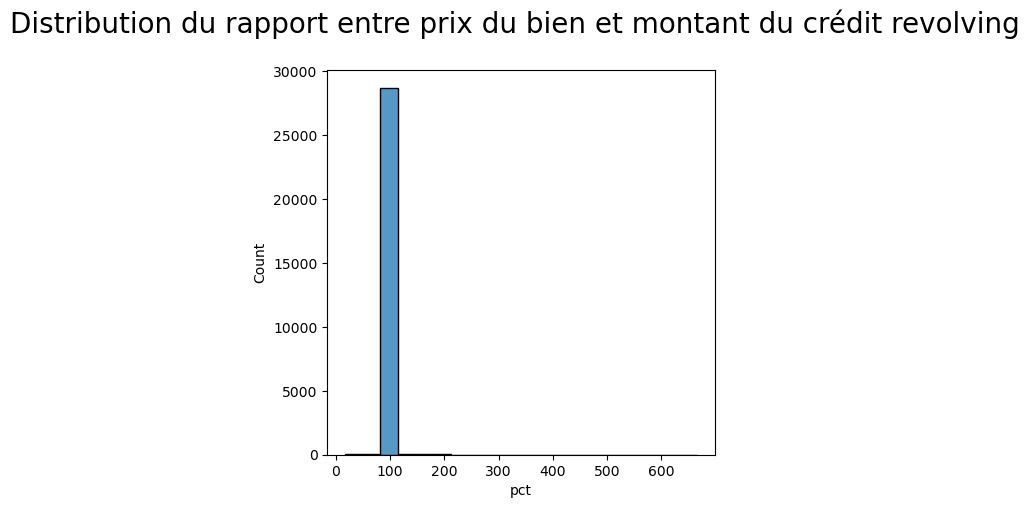

In [208]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution du rapport entre prix du bien et montant du crédit revolving", size=20, y=1)
#plt.xticks(rotation = 90)
sns.histplot(tmp['pct'], bins =20)#, stat='percent' #, kde=True)

In [209]:
tmp=tmp.loc[tmp['pct']!=100,:]
tmp

AMT_CREDIT  AMT_GOODS_PRICE         pct
724       135000.0              NaN         NaN
1942      315000.0         450000.0  142.857143
2138      135000.0         202500.0  150.000000
2612      360000.0         337500.0   93.750000
2808      337500.0         540000.0  160.000000
...            ...              ...         ...
305833    270000.0              NaN         NaN
306035    540000.0         247500.0   45.833333
306126    270000.0              NaN         NaN
306273    202500.0              NaN         NaN
306779    270000.0         202500.0   75.000000

[606 rows x 3 columns]

606 cas où prix du bien <> du montant du prêt (dont 278 NaN)
=> Défaultage avec montant du crédit

In [210]:
train_V1.loc[train_V1['AMT_GOODS_PRICE'].isna(),['AMT_GOODS_PRICE']]=train_V1['AMT_CREDIT']

### CNT_FAM_MEMBERS

Pour retrouver les NaN, recherche dans Train du nb d'enfants et prise en compte du statut marital

In [212]:
train.loc[train['CNT_FAM_MEMBERS'].isna(),['CNT_CHILDREN','NAME_FAMILY_STATUS']]

CNT_CHILDREN NAME_FAMILY_STATUS
41982              0            Unknown
187348             0            Unknown

Par défaut, j'applique 1

In [213]:
train_V1.loc[train_V1['CNT_FAM_MEMBERS'].isna(),['CNT_FAM_MEMBERS']]=1

In [214]:
train_V1['CNT_FAM_MEMBERS'].isna().sum()

0

### EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3 

Ne sachant pas comment calculer ces scores exactement, imputation par SimpleImputer()  via pipeline

In [215]:
train_V1.loc[train_V1['EXT_SOURCE_1'].isna(),:]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
7           100010       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
307502      456246       0         Cash loans           F            N   
307504      456248       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   

        OWN_CAR_AGE FLAG_OWN_REALTY  NAME_HOUSING_TYPE  CNT_CHILDREN  \
2              26.0               Y  House / apartment             0   
3               NaN               Y  House / apartment             0   
4               NaN               Y  House / apartment             0   
5               NaN               Y  House / apartment             0   
7               8.0               Y  House / apartment             0   
...             ...             ...                ...           ...   
307502          NaN               Y  House / apartment             1   
307504          NaN               Y  House / apartment             0   
307505          NaN               Y  House / apartment             0   
307507          NaN               Y  House / apartment             0   
307509          NaN               Y  House / apartment             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
5                99000.0    490495.5      27517.5         454500.0   
7               360000.0   1530000.0      42075.0        1530000.0   
...                  ...         ...          ...              ...   
307502           94500.0    225000.0      10620.0         225000.0   
307504          153000.0    331920.0      16096.5         225000.0   
307505          112500.0    225000.0      22050.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307509          171000.0    370107.0      20205.0         319500.0   

            NAME_INCOME_TYPE    NAME_FAMILY_STATUS  \
2                    Working  Single / not married   
3                    Working        Civil marriage   
4                    Working  Single / not married   
5              State servant               Married   
7              State servant               Married   
...                      ...                   ...   
307502               Working               Married   
307504               Working             Separated   
307505             Pensioner  Single / not married   
307507             Pensioner                 Widow   
307509  Commercial associate               Married   

                  NAME_EDUCATION_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
2       Secondary / secondary special      -19046           -225   
3       Secondary / secondary special      -19005          -3039   
4       Secondary / secondary special      -19932          -3038   
5       Secondary / secondary special      -16941          -1588   
7                    Higher education      -18850           -449   
...                               ...         ...            ...   
307502  Secondary / secondary special      -16063          -8736   
307504  Secondary / secondary special      -16705          -7258   
307505  Secondary / secondary special      -24384         365243   
307507  Secondary / secondary special      -20775         365243   
307509  Secondar

Aperçu de l'influence de la TARGET en fonction de la présence ou non des indicateurs EXT_SOURCE

In [216]:
train_V1.loc[train_V1['EXT_SOURCE_1'].isna(),'TARGET'].value_counts(normalize=True)

0    0.914803
1    0.085197
Name: TARGET, dtype: float64

In [217]:
train_V1.loc[~train_V1['EXT_SOURCE_1'].isna(),'TARGET'].value_counts(normalize=True)

0    0.92504
1    0.07496
Name: TARGET, dtype: float64

In [218]:
train_V1.loc[train_V1['EXT_SOURCE_2'].isna(),'TARGET'].value_counts(normalize=True)

0    0.921212
1    0.078788
Name: TARGET, dtype: float64

In [219]:
train_V1.loc[~train_V1['EXT_SOURCE_2'].isna(),'TARGET'].value_counts(normalize=True)

0    0.919264
1    0.080736
Name: TARGET, dtype: float64

In [220]:
train_V1.loc[train_V1['EXT_SOURCE_3'].isna(),'TARGET'].value_counts(normalize=True)

0    0.906879
1    0.093121
Name: TARGET, dtype: float64

In [221]:
train_V1.loc[~train_V1['EXT_SOURCE_3'].isna(),'TARGET'].value_counts(normalize=True)

0    0.922332
1    0.077668
Name: TARGET, dtype: float64

Légère différence, plus marquée sur EXT_SOURCE_3

### Features ajoutées en V2 (issues de previous et bureau)

- Defaulter les NaN à 0

In [231]:
added_col=['Prev_contract_nb','Prev_AMT_CREDIT','Refused_rate','default_payment']
added_col

['Prev_contract_nb', 'Prev_AMT_CREDIT', 'Refused_rate', 'default_payment']

In [233]:
for col in added_col:
    train_V1[col].fillna(0,inplace =True)
train_V1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

        OWN_CAR_AGE FLAG_OWN_REALTY  NAME_HOUSING_TYPE  CNT_CHILDREN  \
0               NaN               Y  House / apartment             0   
1               NaN               N  House / apartment             0   
2              26.0               Y  House / apartment             0   
3               NaN               Y  House / apartment             0   
4               NaN               Y  House / apartment             0   
...             ...             ...                ...           ...   
307506          NaN               N       With parents             0   
307507          NaN               Y  House / apartment             0   
307508          NaN               Y  House / apartment             0   
307509          NaN               Y  House / apartment             0   
307510          NaN               N  House / apartment             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

            NAME_INCOME_TYPE    NAME_FAMILY_STATUS  \
0                    Working  Single / not married   
1              State servant               Married   
2                    Working  Single / not married   
3                    Working        Civil marriage   
4                    Working  Single / not married   
...                      ...                   ...   
307506               Working             Separated   
307507             Pensioner                 Widow   
307508               Working             Separated   
307509  Commercial associate               Married   
307510  Commercial associate               Married   

                  NAME_EDUCATION_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0       Secondary / secondary special       -9461           -637   
1                    Higher education      -16765          -1188   
2       Secondary / secondary special      -19046           -225   
3       Secondary / secondary special      -19005          -3039   
4       Secondary / secondary special      -19932          -3038   
...                               ...         ...            ...   
307506  Secondary / secondary special       -9327           -236   
307507  Secondary / secondary special      -20775         365243   
307508               Higher education      -14966          -7921   
307509  Secondary / secondary special      -11961          -4786   
307510          

# 5 Analyse uni dimensionnelle / traitement des outliers

## 5.1 Variables quantitatives

In [234]:
train_V1.describe()

SK_ID_CURR         TARGET    OWN_CAR_AGE   CNT_CHILDREN  \
count  307499.000000  307499.000000  104579.000000  307499.000000   
mean   278181.934868       0.080732      12.061303       0.417068   
std    102790.364944       0.272423      11.944910       0.722131   
min    100002.000000       0.000000       0.000000       0.000000   
25%    189149.500000       0.000000       5.000000       0.000000   
50%    278204.000000       0.000000       9.000000       0.000000   
75%    367143.500000       0.000000      15.000000       1.000000   
max    456255.000000       1.000000      91.000000      19.000000   

       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.074990e+05  3.074990e+05  307499.000000     3.074990e+05   
mean       1.687972e+05  5.990273e+05   27108.573909     5.381634e+05   
std        2.371274e+05  4.024927e+05   14493.737315     3.694072e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.469970e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

          DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS   EXT_SOURCE_1  \
count  307499.000000  307499.000000    307499.000000  134125.000000   
mean   -16037.054212   63817.623992         2.152674       0.502125   
std      4364.000425  141277.920123         0.910694       0.211062   
min    -25229.000000  -17912.000000         1.000000       0.014568   
25%    -19682.000000   -2760.000000         2.000000       0.334003   
50%    -15750.000000   -1213.000000         2.000000       0.505994   
75%    -12413.000000    -289.000000         3.000000       0.675051   
max     -7489.000000  365243.000000        20.000000       0.962693   

       EXT_SOURCE_2   EXT_SOURCE_3  Prev_contract_nb  Prev_AMT_CREDIT  \
count  3.068390e+05  246535.000000     307499.000000     3.074990e+05   
mean   5.143905e-01       0.510858          5.109922     1.524891e+06   
std    1.910605e-01       0.194845          6.075102     3.281295e+06   
min    8.173617e-08       0.000527          0.000000     0.000000e+00   
25%    3.924522e-01       0.370650          0.000000     0.000000e+00   
50%    5.659561e-01       0.535276          4.000000     4.390560e+05   
75%    6.636171e-01       0.669057          8.000000     1.912275e+06   
max    8.549997e-01       0.896010        122.000000     5.690216e+08   

        Refused_rate  default_payment  
count  307499.000000    307499.000000  
mean        0.126093         0.142410  
std         0.210418         0.349471  
min         0.000000         0.000000  
25%         0.000000         0.000000  
50%         0.000000         0.000000  
75%         0.250000         0.000000  
max         1.000000         1.000000

In [235]:
num_feat=train_V1.select_dtypes(exclude=object).columns.to_list()
num_feat

['SK_ID_CURR',
 'TARGET',
 'OWN_CAR_AGE',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'Prev_contract_nb',
 'Prev_AMT_CREDIT',
 'Refused_rate',
 'default_payment']

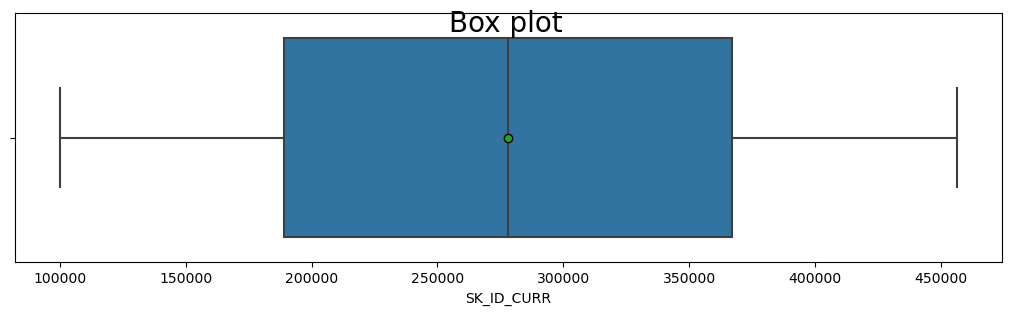

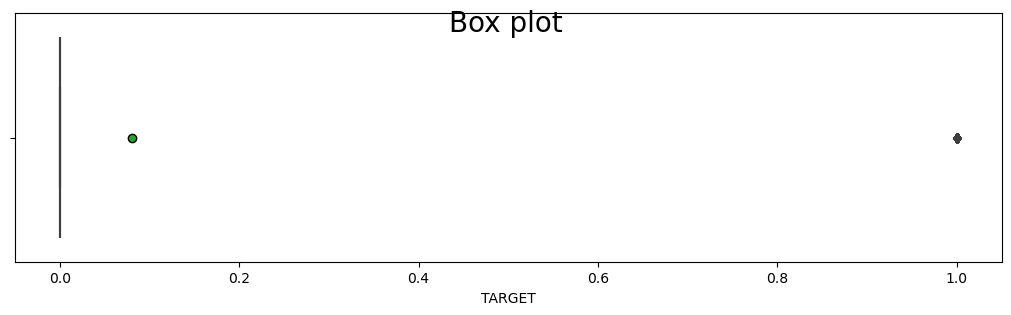

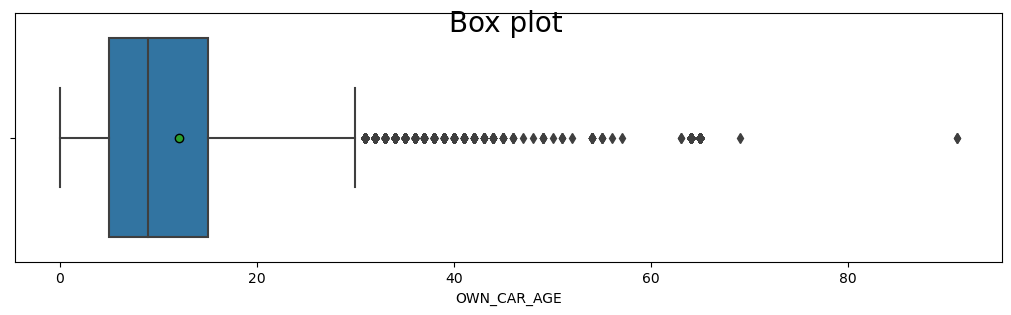

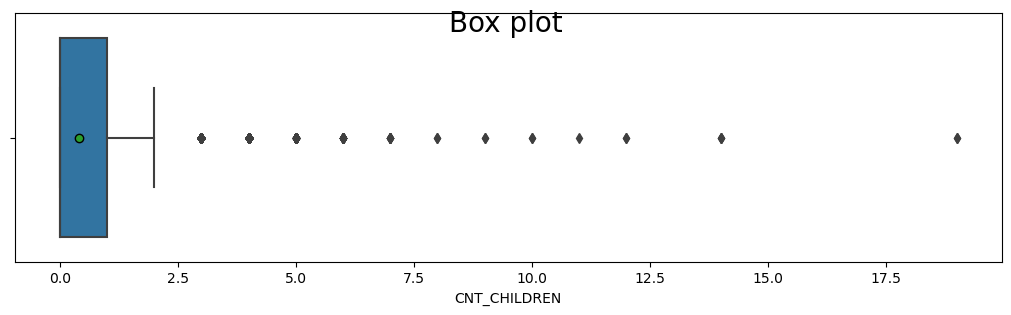

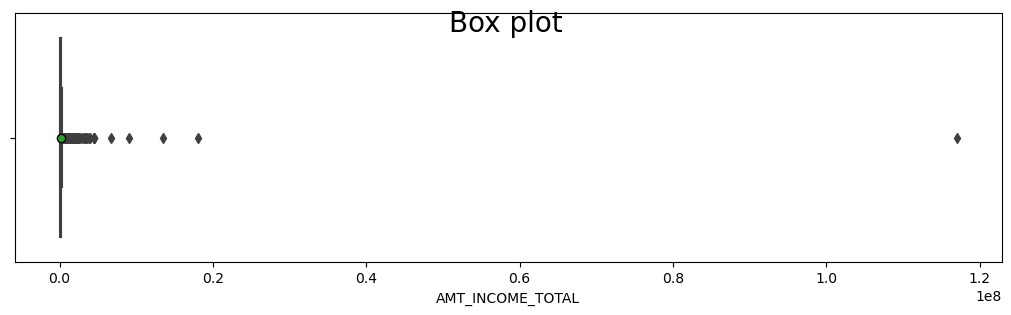

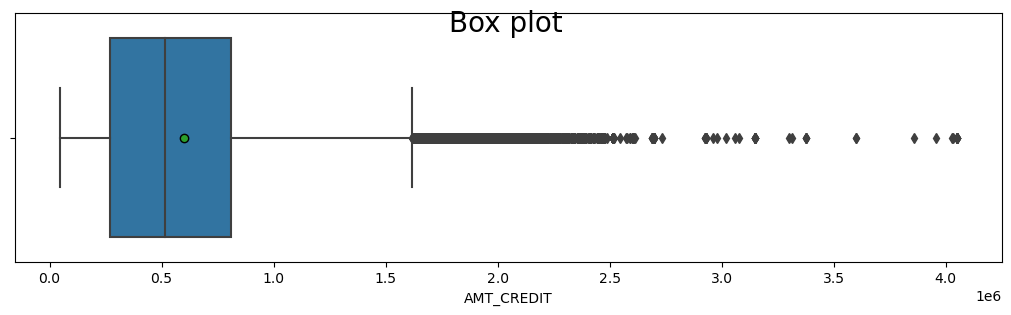

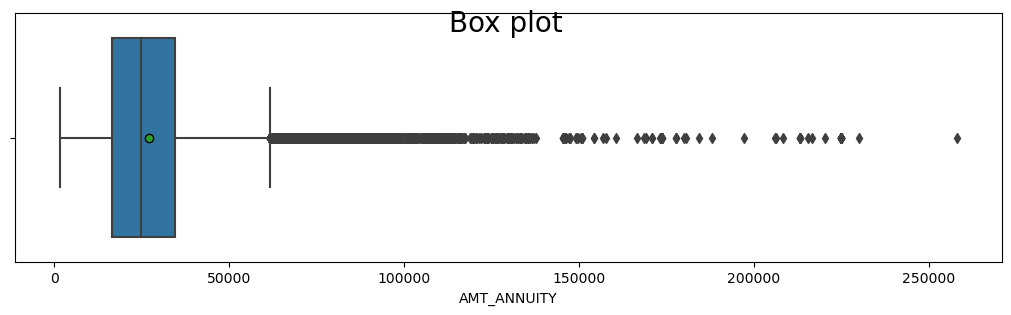

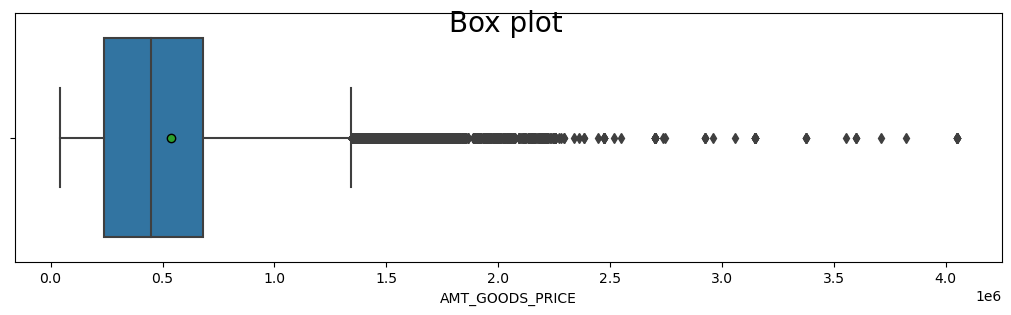

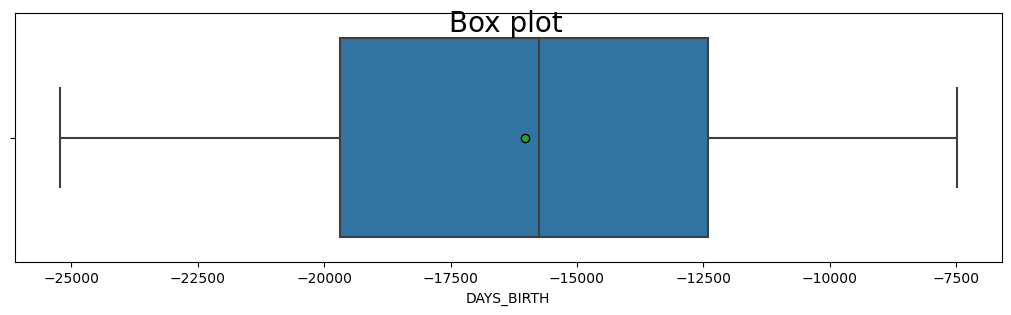

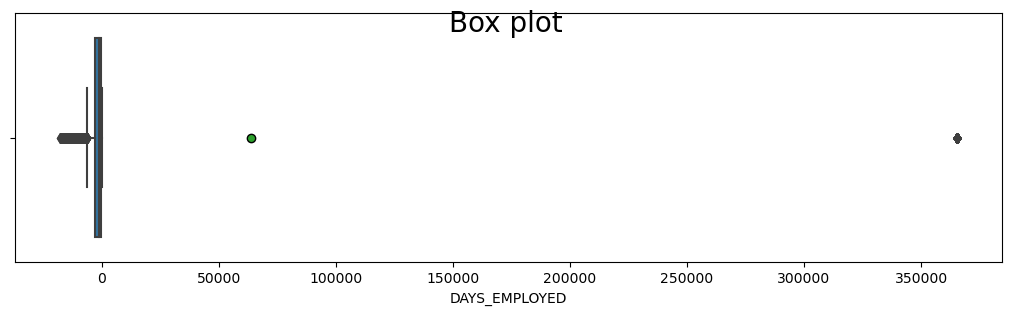

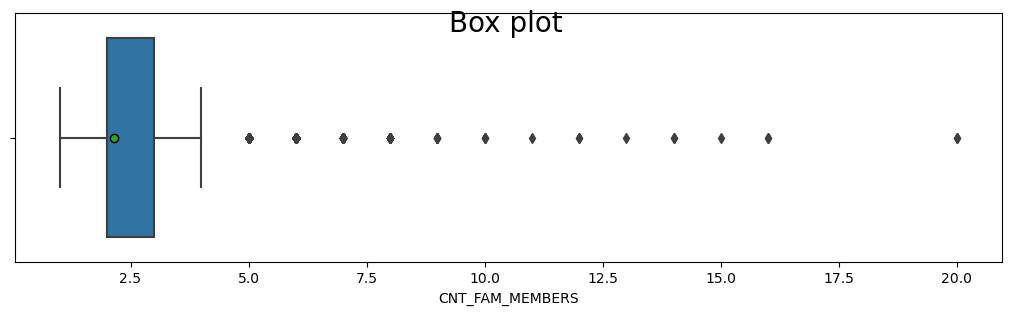

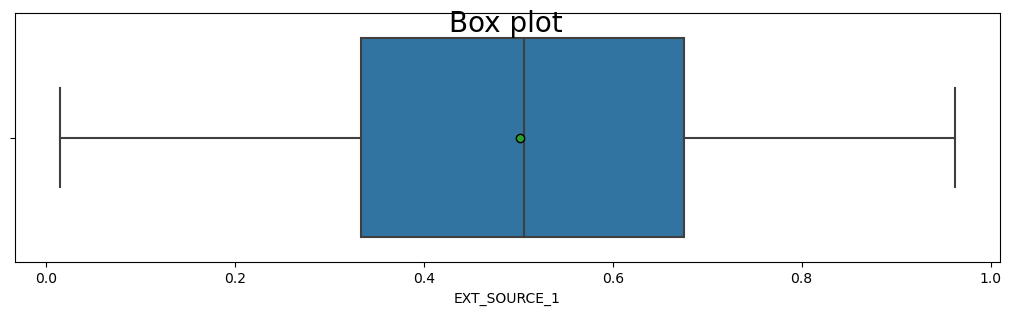

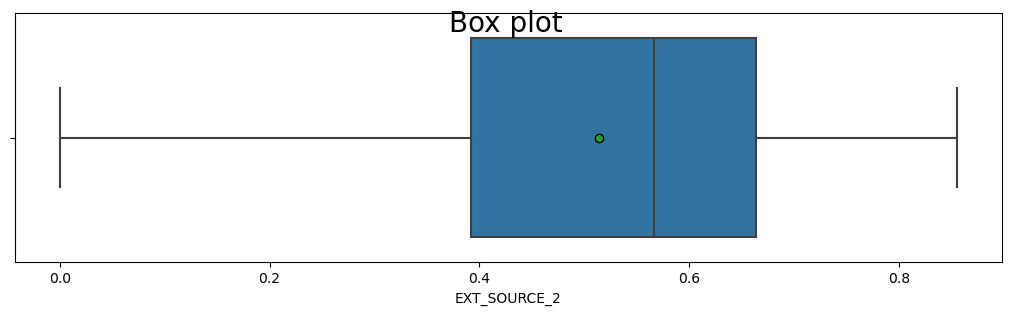

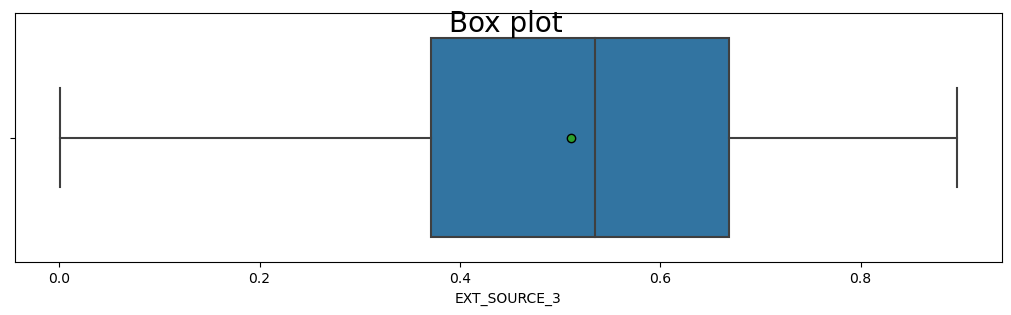

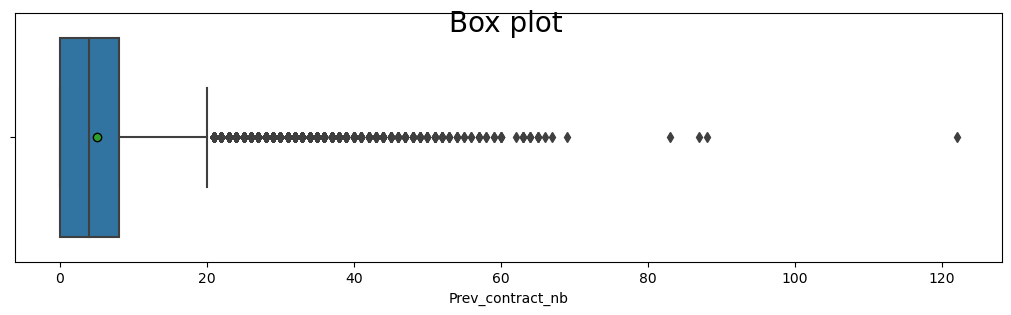

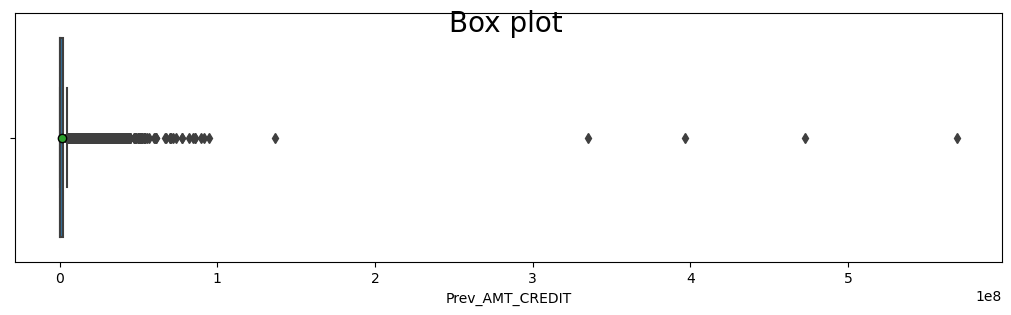

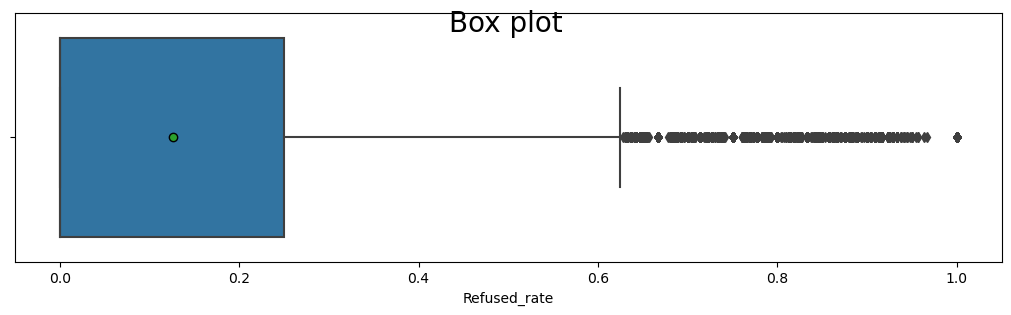

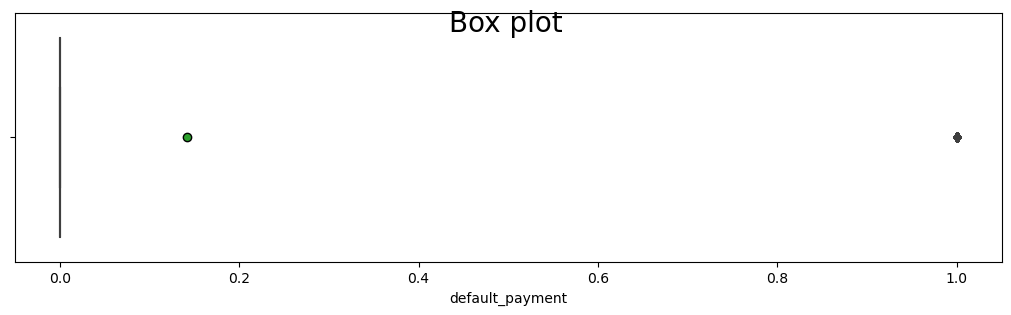

In [236]:
for num in num_feat:
    plt.figure(figsize = (10,3),constrained_layout=True)
    plt.suptitle("Box plot", size=20, y=1)
    sns.boxplot(data=train_V1, x=num,showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})

#### Target

<AxesSubplot:title={'center':'Target'}, ylabel='TARGET'>

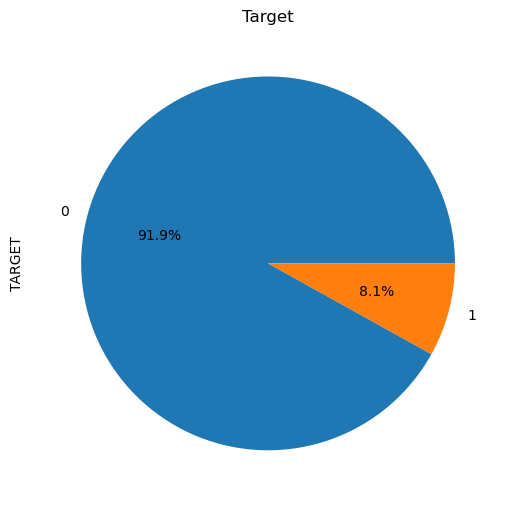

In [237]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['TARGET'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Target")

92% de client qui remboursent leur crédit => pas équilibré

#### OWN_CAR_AGE

<AxesSubplot:xlabel='OWN_CAR_AGE', ylabel='Count'>

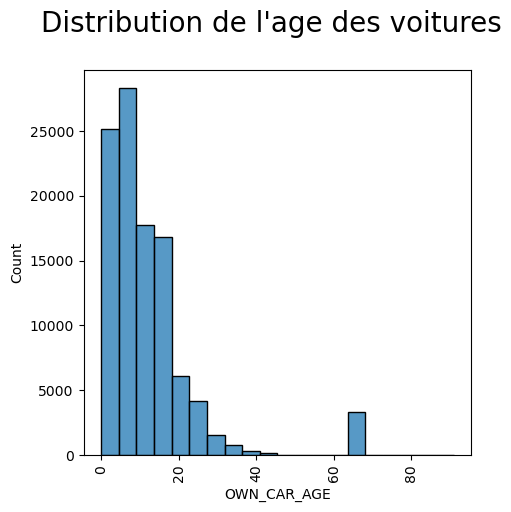

In [238]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution de l'age des voitures", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['OWN_CAR_AGE'], bins =20)#, stat='percent' #, kde=True)

Bien que l'age des voitures est parfois (souvent) important, je ne supprime pas les outliers car cette donnée ne servira pas,a priori, pour le ML. Sera uniquement utilisé dans le cadre de l'EDA.

#### Count children

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Count'>

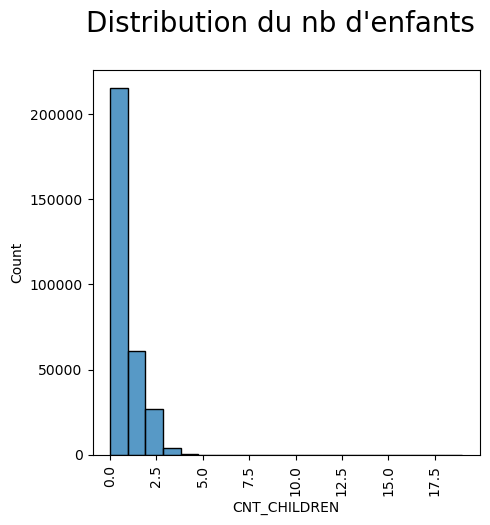

In [239]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution du nb d'enfants", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['CNT_CHILDREN'], bins =20)#, stat='percent' #, kde=True)

Nb de cas avec nb d'enfants > 5

In [240]:
tmp=train_V1.loc[train_V1['CNT_CHILDREN']>5]
tmp.shape

(42, 26)

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Count'>

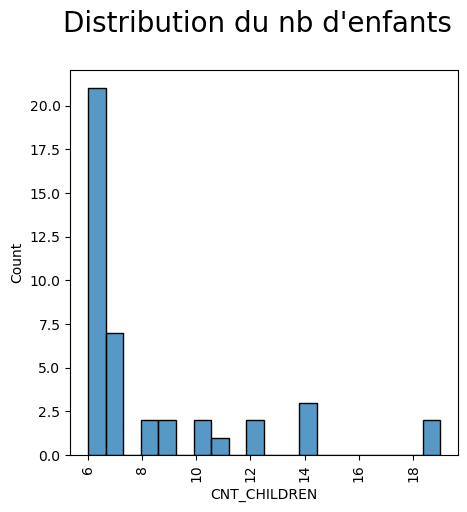

In [241]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution du nb d'enfants", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(tmp['CNT_CHILDREN'], bins =20)#, stat='percent' #, kde=True)

In [242]:
train_V1.loc[train_V1['CNT_CHILDREN']>10].shape

(8, 26)

Suppression des 8 clients ayant plus de 10 enfants

In [243]:
train_V1.shape

(307499, 26)

In [244]:
train_V1=train_V1.drop(train_V1.loc[train_V1['CNT_CHILDREN']>10].index).reset_index(drop=True)
train_V1.shape

(307491, 26)

Suppression de la feature CNT_CHILDREN qui fait doublon avec CNT_FAM_MEMBERS

In [245]:
train_V1=train_V1.drop(labels='CNT_CHILDREN', axis=1).reset_index(drop=True)
train_V1.shape

(307491, 25)

#### AMT_INCOME_TOTAL

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

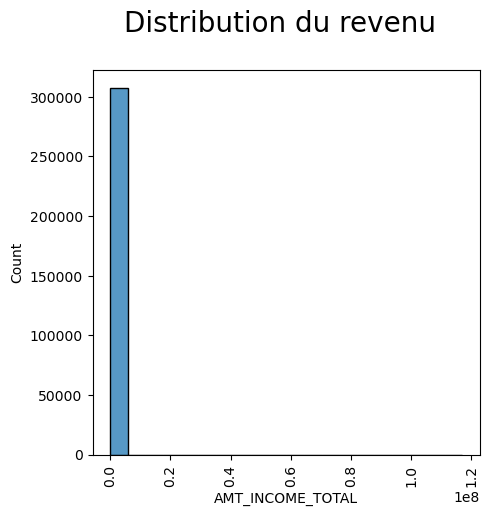

In [246]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution du revenu", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['AMT_INCOME_TOTAL'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

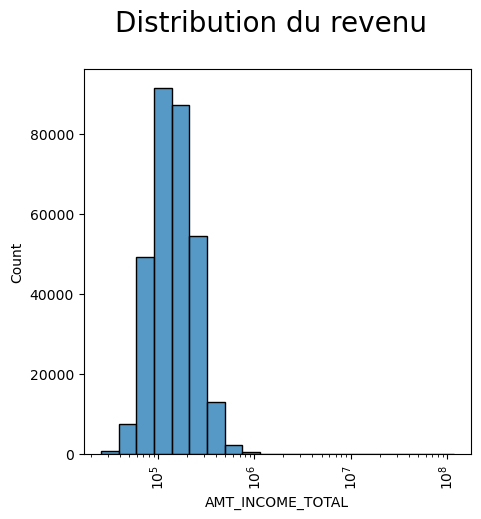

In [247]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution du revenu", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['AMT_INCOME_TOTAL'], bins =20, log_scale= True)#, stat='percent' #, kde=True)

In [248]:
tmp=train_V1.loc[train_V1['AMT_INCOME_TOTAL']<20000000]
tmp.shape

(307490, 25)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

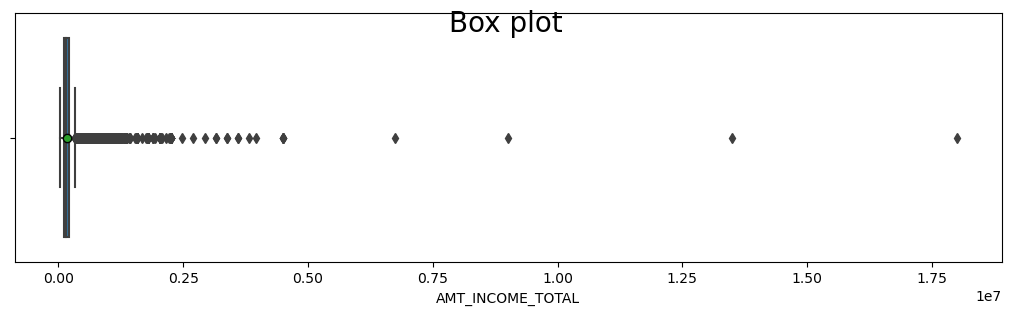

In [249]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=tmp, x='AMT_INCOME_TOTAL',showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})

In [250]:
tmp=train_V1.loc[train_V1['AMT_INCOME_TOTAL']<4000000]
tmp.shape

(307482, 25)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

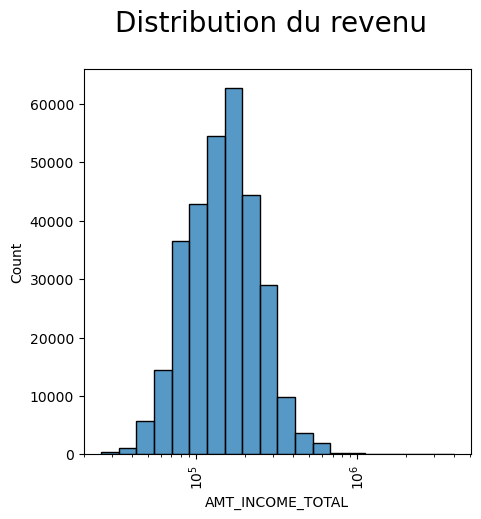

In [251]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution du revenu", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(tmp['AMT_INCOME_TOTAL'], bins =20, log_scale= True)#, stat='percent' #, kde=True)

##### Suppresion des 9 revenus > 4 000 000

In [252]:
train_V1.loc[train_V1['AMT_INCOME_TOTAL']>4000000].shape

(9, 25)

In [253]:
train_V1=train_V1.drop(train_V1.loc[train_V1['AMT_INCOME_TOTAL']>4000000].index).reset_index(drop=True)
train_V1.shape

(307482, 25)

#### AMT_CREDIT

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

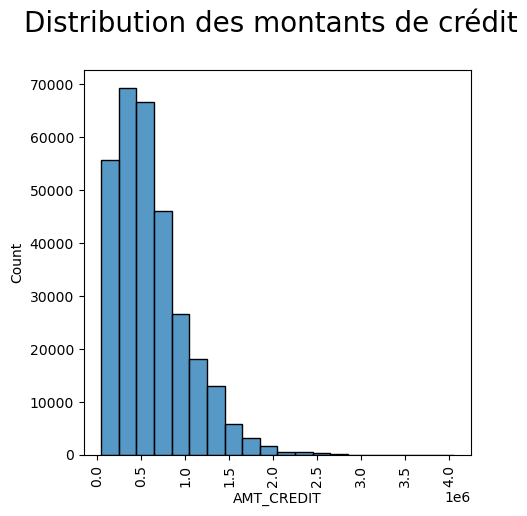

In [254]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des montants de crédit", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['AMT_CREDIT'], bins =20)

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

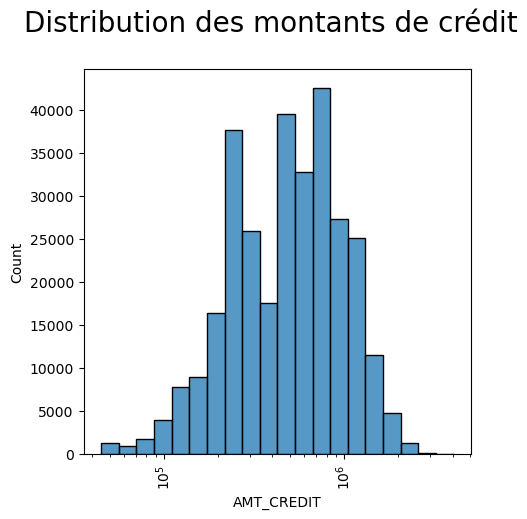

In [255]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des montants de crédit", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['AMT_CREDIT'], bins =20, log_scale= True)

### INCOME_CREDIT_PERC

En V1, ajout d'une nouvelle feature revenu/montant crédit:

'INCOME_CREDIT_PERC' = 'AMT_INCOME_TOTAL' / 'AMT_CREDIT'

In [256]:
train_V1['INCOME_CREDIT_PERC']=train_V1['AMT_INCOME_TOTAL']/train_V1['AMT_CREDIT']

In [257]:
train_V1['INCOME_CREDIT_PERC'].describe()

count    307482.000000
mean          0.398773
std           0.338502
min           0.011801
25%           0.193798
50%           0.306272
75%           0.495376
max          15.000000
Name: INCOME_CREDIT_PERC, dtype: float64

<AxesSubplot:xlabel='INCOME_CREDIT_PERC', ylabel='Count'>

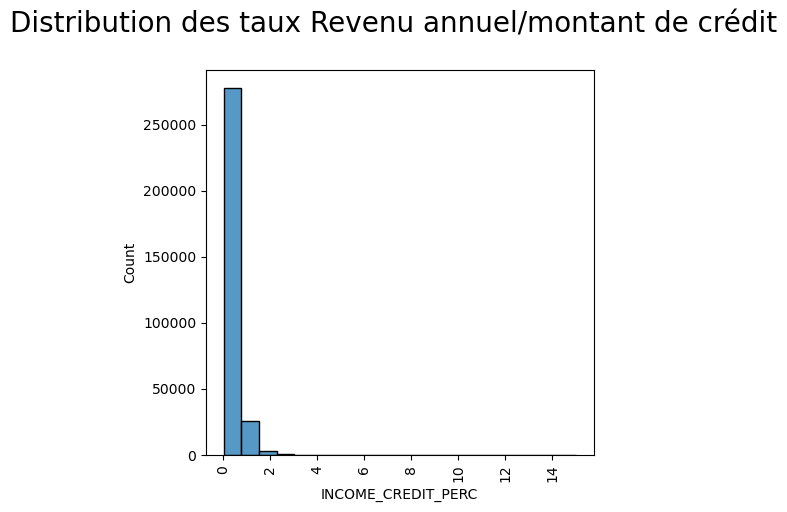

In [258]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des taux Revenu annuel/montant de crédit", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['INCOME_CREDIT_PERC'], bins =20)

<AxesSubplot:xlabel='INCOME_CREDIT_PERC', ylabel='Count'>

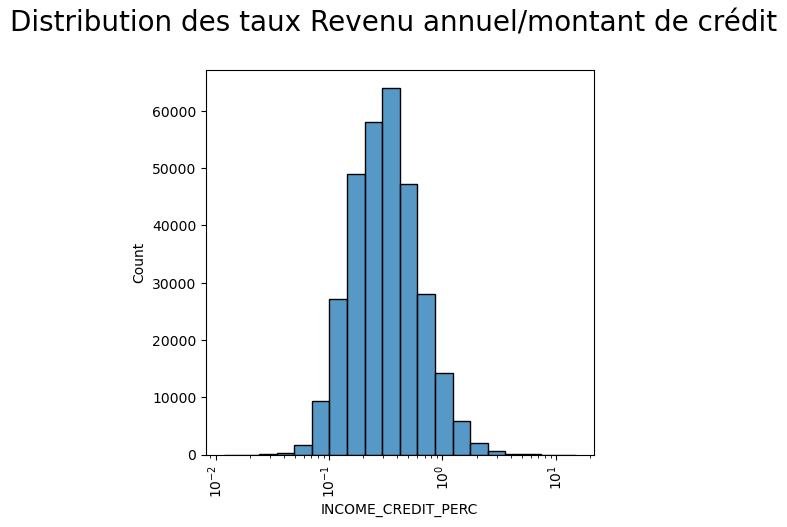

In [259]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des taux Revenu annuel/montant de crédit", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['INCOME_CREDIT_PERC'], bins =20, log_scale= True)

A voir si a a une influence sur le modèle de ML

### AMT_ANNUITY

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Count'>

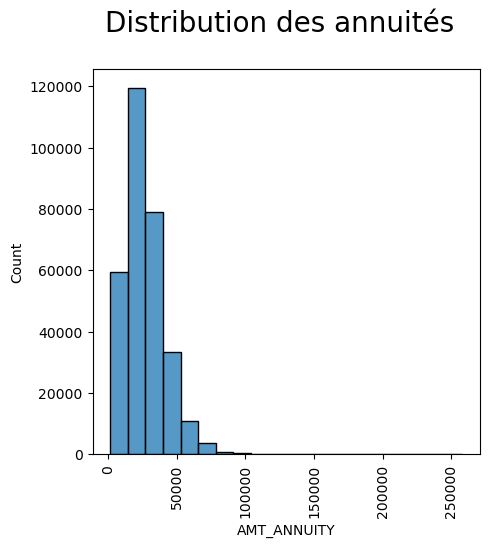

In [260]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des annuités", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['AMT_ANNUITY'], bins =20)

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Count'>

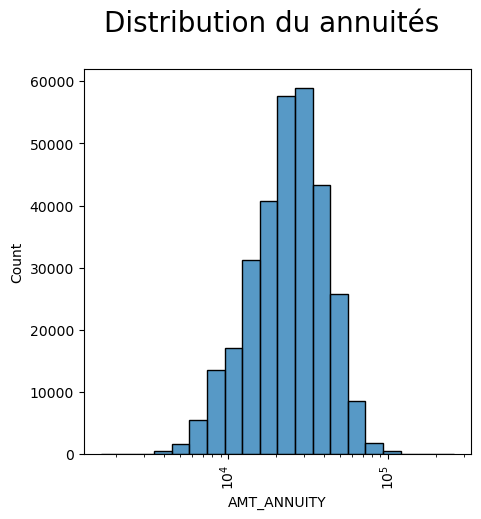

In [261]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution du annuités", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['AMT_ANNUITY'], bins =20, log_scale= True)

In [262]:
train_V1.loc[train_V1['AMT_ANNUITY']>200000,:].shape

(35, 26)

En V0, pas d'outliers, à voir en V1

### V1: ajout des features 'ANNUITY_INCOME_PERC' et 'PAYMENT_RATE'
- 'ANNUITY_INCOME_PERC' = 'AMT_ANNUITY' / 'AMT_INCOME_TOTAL'
- 'PAYMENT_RATE' = 'AMT_ANNUITY' / 'AMT_CREDIT'

In [265]:
train_V1['ANNUITY_INCOME_PERC'] = train_V1['AMT_ANNUITY'] / train_V1['AMT_INCOME_TOTAL']

In [266]:
train_V1['PAYMENT_RATE'] = train_V1['AMT_ANNUITY'] / train_V1['AMT_CREDIT']

In [267]:
train_V1[['ANNUITY_INCOME_PERC','PAYMENT_RATE']].describe()

ANNUITY_INCOME_PERC   PAYMENT_RATE
count        307482.000000  307482.000000
mean              0.180934       0.053694
std               0.094568       0.022481
min               0.003333       0.022073
25%               0.114792       0.036900
50%               0.162833       0.050000
75%               0.229067       0.064043
max               1.875965       0.124430

<AxesSubplot:xlabel='ANNUITY_INCOME_PERC', ylabel='Count'>

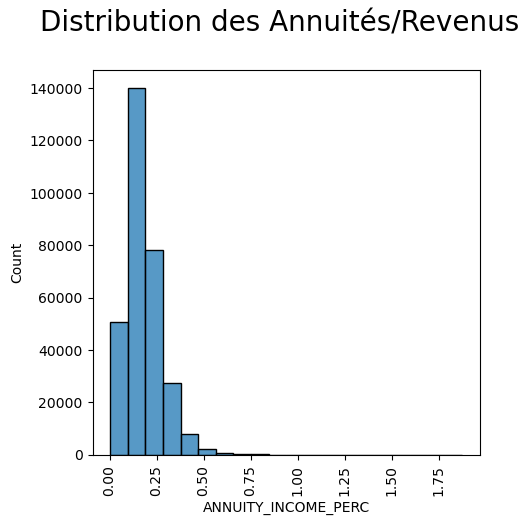

In [268]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des Annuités/Revenus", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['ANNUITY_INCOME_PERC'], bins =20)

<AxesSubplot:xlabel='ANNUITY_INCOME_PERC', ylabel='Count'>

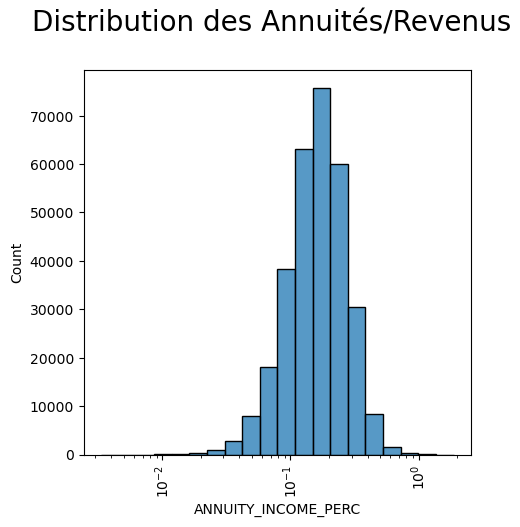

In [269]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des Annuités/Revenus", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['ANNUITY_INCOME_PERC'], bins =20, log_scale=True)

Focus sur les taux > 33%

In [270]:
tmp=train_V1.loc[train_V1['ANNUITY_INCOME_PERC']>0.33]
tmp.shape

(21380, 28)

<AxesSubplot:xlabel='ANNUITY_INCOME_PERC'>

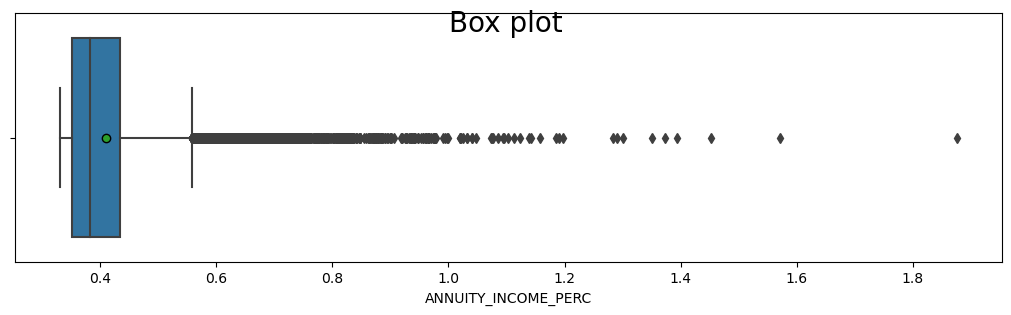

In [271]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=tmp, x='ANNUITY_INCOME_PERC',showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})

Beaucoup de cas: ne pas les considérer comme des outliers . En revanche il sera de voir la corrélation entre ce taux et le défaut de paiement

<AxesSubplot:xlabel='PAYMENT_RATE', ylabel='Count'>

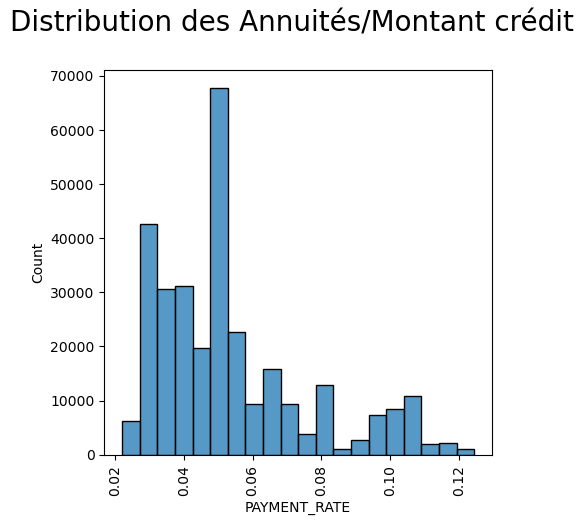

In [272]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des Annuités/Montant crédit", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['PAYMENT_RATE'], bins =20)

Taux max env 12%. rien d'exceptionnel

### DAYS_BIRTH

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

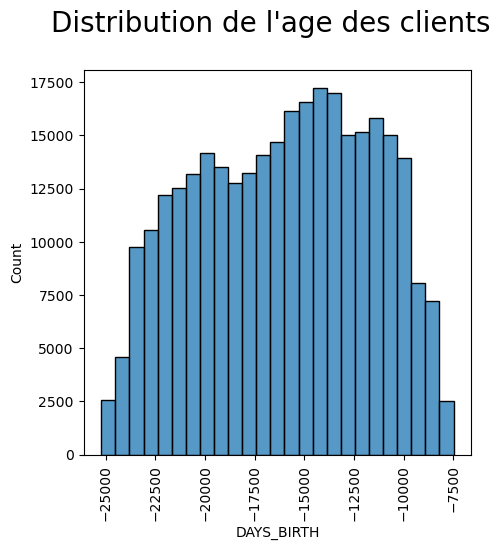

In [273]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution de l'age des clients", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['DAYS_BIRTH'], bins =25)

 - Dois-je transformer ce nb de jours en année? Qu'est ce que ça va apporter? Si oui avec arrondi?
 
 - Vérifions tout de même qu'il n'y a pas d'age 'étonnant'

In [274]:
train_V1['client_age']=(train_V1['DAYS_BIRTH']/-365).astype(int)

In [275]:
train_V1['client_age'].describe()

count    307482.000000
mean         43.436191
std          11.954789
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: client_age, dtype: float64

<AxesSubplot:xlabel='client_age', ylabel='Count'>

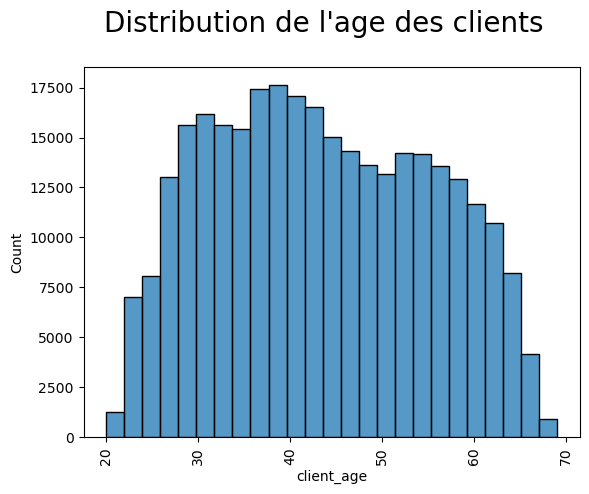

In [276]:
plt.figure()#figsize = (5,5))
plt.suptitle("Distribution de l'age des clients", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['client_age'], bins =25)

##### Les ages sont réalistes, pas d'outlier

#### Suppression de la colonne 'DAYS_BIRTH'

In [277]:
train_V1=train_V1.drop(labels='DAYS_BIRTH', axis=1).reset_index(drop=True)
train_V1.shape

(307482, 28)

### DAYS_EMPLOYED

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

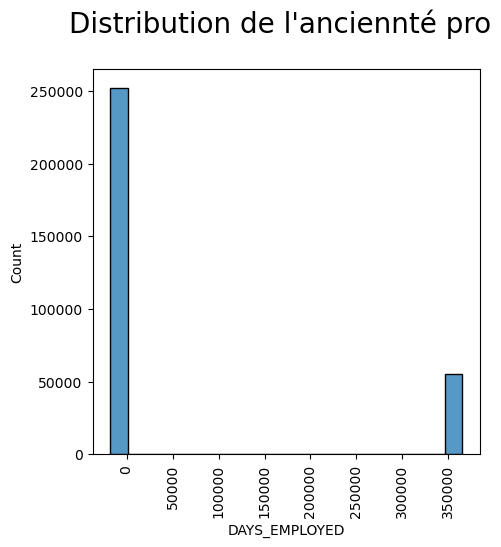

In [278]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution de l'anciennté pro", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['DAYS_EMPLOYED'], bins =20)

In [279]:
tmp=train_V1.loc[train_V1['DAYS_EMPLOYED']>0,:]
tmp

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
38          100045       0         Cash loans           F            N   
43          100050       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307440      456209       0         Cash loans           F            N   
307454      456227       0         Cash loans           F            N   
307458      456231       0         Cash loans           M            N   
307476      456249       0         Cash loans           F            N   
307478      456252       0         Cash loans           F            N   

        OWN_CAR_AGE FLAG_OWN_REALTY  NAME_HOUSING_TYPE  AMT_INCOME_TOTAL  \
8               NaN               Y  House / apartment        112500.000   
11              NaN               Y  House / apartment         38419.155   
23              NaN               Y  House / apartment         83250.000   
38              NaN               Y  House / apartment         99000.000   
43              NaN               Y  House / apartment        108000.000   
...             ...             ...                ...               ...   
307440          NaN               Y  House / apartment        202500.000   
307454          NaN               Y  House / apartment         99000.000   
307458          NaN               Y  House / apartment        117000.000   
307476          NaN               Y  House / apartment        112500.000   
307478          NaN               Y  House / apartment         72000.000   

        AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
8        1019610.0      33826.5         913500.0        Pensioner   
11        148365.0      10678.5         135000.0        Pensioner   
23        239850.0      23850.0         225000.0        Pensioner   
38        247275.0      17338.5         225000.0        Pensioner   
43        746280.0      42970.5         675000.0        Pensioner   
...            ...          ...              ...              ...   
307440    703728.0      29943.0         607500.0        Pensioner   
307454    247275.0      16479.0         225000.0        Pensioner   
307458   1071909.0      31473.0         936000.0        Pensioner   
307476    225000.0      22050.0         225000.0        Pensioner   
307478    269550.0      12001.5         225000.0        Pensioner   

          NAME_FAMILY_STATUS            NAME_EDUCATION_TYPE  DAYS_EMPLOYED  \
8                    Married  Secondary / secondary special         365243   
11                   Married  Secondary / secondary special         365243   
23                   Married  Secondary / secondary special         365243   
38                   Married  Secondary / secondary special         365243   
43      Single / not married               Higher education         365243   
...                      ...                            ...            ...   
307440  Single / not married  Secondary / secondary special         365243   
307454             Separated  Secondary / secondary special         365243   
307458               Married  Secondary / secondary special         365243   
307476  Single / not married  Secondary / secondary special         365243   
307478                 Widow  Secondary / secondary special         365243   

        CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
8                   2.0      0.587334      0.205747      0.751724   
11                  2.0      0.722044      0.555183      0.652897   
23                  2.0           NaN      0.624305      0.669057   
38                  2.0           NaN      0.650765      0.751724   
43                  1.0           NaN      0.766138      0.684828   
...                 ...   

In [280]:
tmp['NAME_INCOME_TYPE'].value_counts()

Pensioner     55351
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

A defulter à 0?

In [281]:
tmp=train_V1.loc[train_V1['DAYS_EMPLOYED']==0,:]
tmp

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
23690       127568       0         Cash loans           F            N   
121613      241013       1         Cash loans           F            N   

        OWN_CAR_AGE FLAG_OWN_REALTY  NAME_HOUSING_TYPE  AMT_INCOME_TOTAL  \
23690           NaN               N  House / apartment          189000.0   
121613          NaN               Y  House / apartment          112500.0   

        AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
23690     983299.5      36571.5         904500.0          Working   
121613    134775.0       7438.5         112500.0          Working   

       NAME_FAMILY_STATUS            NAME_EDUCATION_TYPE  DAYS_EMPLOYED  \
23690           Separated               Higher education              0   
121613     Civil marriage  Secondary / secondary special              0   

        CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
23690               3.0      0.409224      0.323724      0.379100   
121613              3.0           NaN      0.558081      0.609276   

        Prev_contract_nb  Prev_AMT_CREDIT  Refused_rate  default_payment  \
23690                6.0        753450.57           0.0              0.0   
121613               0.0             0.00           0.2              0.0   

        INCOME_CREDIT_PERC  ANNUITY_INCOME_PERC  PAYMENT_RATE  client_age  
23690             0.192210              0.19350      0.037193          34  
121613            0.834725              0.06612      0.055192          41

Hormis pensionnaires et chomeurs, seuls 2 clients 'working' ont une date d'ancienneté = 0

Est ce que tous les pensionnaires et chomeurs ont une ancienneté positive? Meme valeur?

In [282]:
train_V1.loc[(train_V1['NAME_INCOME_TYPE'].isin(['Pensioner','Unemployed'])) & (~train_V1['DAYS_EMPLOYED'])== 365243,:]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, OWN_CAR_AGE, FLAG_OWN_REALTY, NAME_HOUSING_TYPE, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_EDUCATION_TYPE, DAYS_EMPLOYED, CNT_FAM_MEMBERS, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, Prev_contract_nb, Prev_AMT_CREDIT, Refused_rate, default_payment, INCOME_CREDIT_PERC, ANNUITY_INCOME_PERC, PAYMENT_RATE, client_age]
Index: []

Pas de cas avec valuers <>

##### Modification  de 365243 jours par 0

In [283]:
train_V1.loc[train_V1['DAYS_EMPLOYED']==365243,['DAYS_EMPLOYED']]=0

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

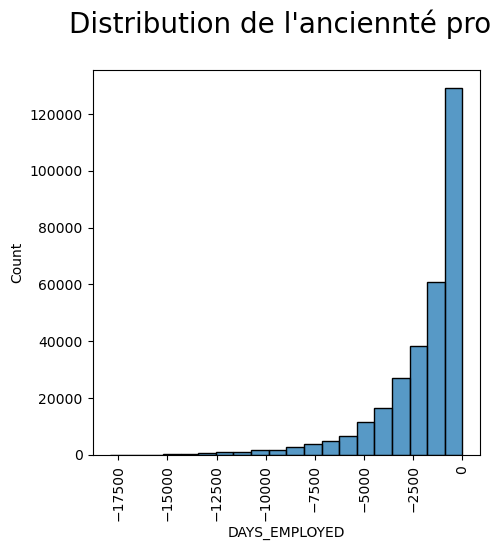

In [284]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution de l'anciennté pro", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['DAYS_EMPLOYED'], bins =20)

In [285]:
train_V1['client_prof_exp']=round(train_V1['DAYS_EMPLOYED']/-365,0)

In [286]:
train_V1['client_prof_exp'].describe()

count    307482.000000
mean          5.356239
std           6.325140
min          -0.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          49.000000
Name: client_prof_exp, dtype: float64

<AxesSubplot:xlabel='client_prof_exp', ylabel='Count'>

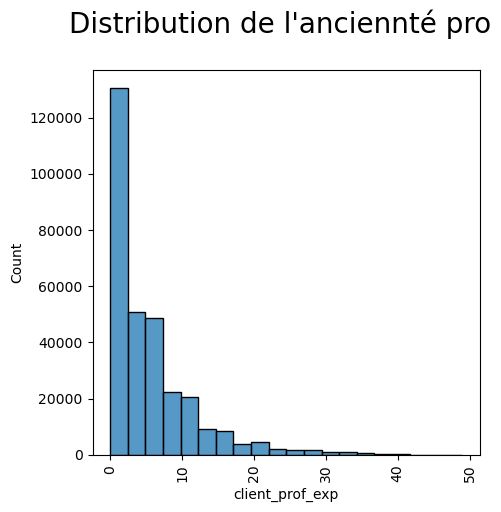

In [287]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution de l'anciennté pro", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['client_prof_exp'], bins =20)

#### Suppresion de la colonne 'DAYS_EMPLOYED'


In [ ]:
train_V1=train_V1.drop(labels='DAYS_EMPLOYED', axis=1).reset_index(drop=True)
train_V1.shape

### (V1) DAYS_EMPLOYED_PERC 

Inspiration kernel kaggle fourni en ressource du projet, ajout de la feature DAYS_EMPLOYED_PERC
DAYS_EMPLOYED_PERC = client_prof_exp / client_age

In [288]:
train_V1['DAYS_EMPLOYED_PERC'] = train_V1['client_prof_exp'] / train_V1['client_age']

In [289]:
train_V1['DAYS_EMPLOYED_PERC']. describe()

count    307482.000000
mean          0.130300
std           0.136901
min          -0.000000
25%           0.024390
50%           0.090909
75%           0.193548
max           0.731343
Name: DAYS_EMPLOYED_PERC, dtype: float64

<AxesSubplot:xlabel='DAYS_EMPLOYED_PERC', ylabel='Count'>

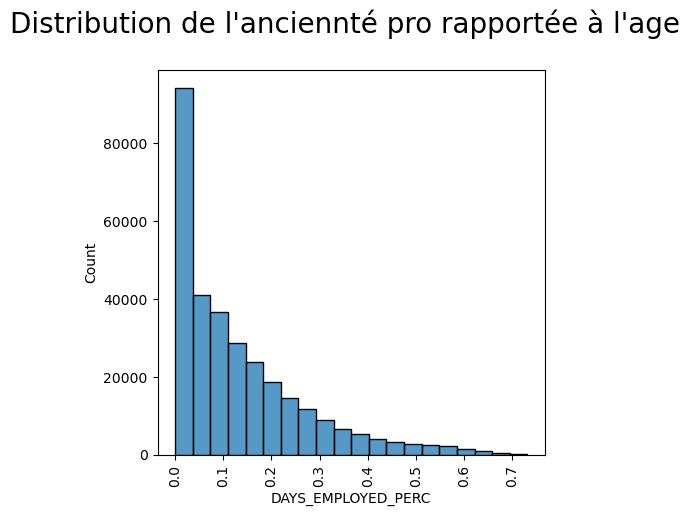

In [329]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution de l'anciennté pro rapportée à l'age", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['DAYS_EMPLOYED_PERC'], bins =20)

### MEMBRE DE LA FAMILLE

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Count'>

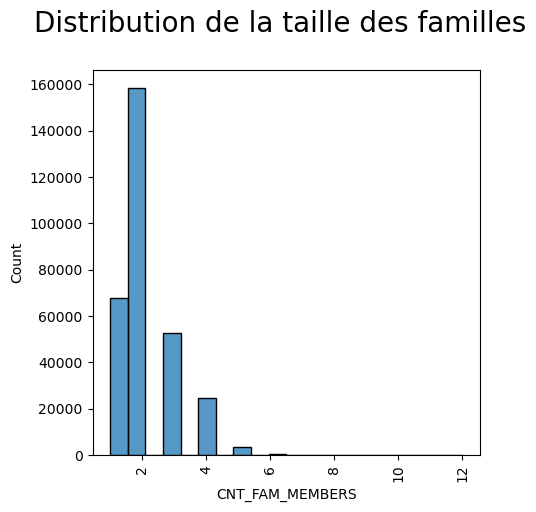

In [292]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution de la taille des familles", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['CNT_FAM_MEMBERS'], bins =20)

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Count'>

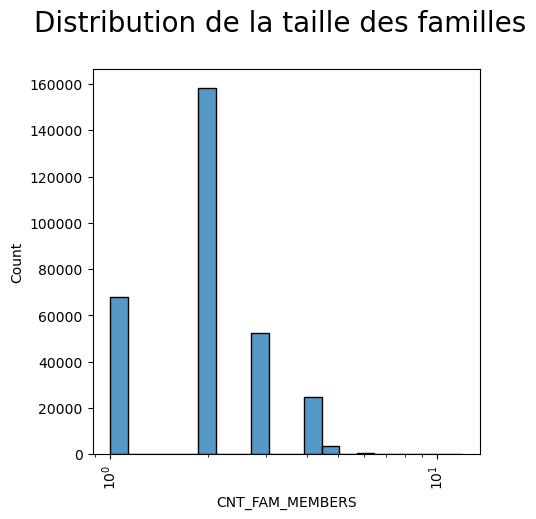

In [293]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution de la taille des familles", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['CNT_FAM_MEMBERS'], bins =20,log_scale=True)

### (V1) ajout de la feature 'INCOME_PER_PERSON'

'INCOME_PER_PERSON' = 'AMT_INCOME_TOTAL' / 'CNT_FAM_MEMBERS'

In [294]:
train_V1['INCOME_PER_PERSON'] = train_V1['AMT_INCOME_TOTAL'] / train_V1['CNT_FAM_MEMBERS']

In [295]:
train_V1['INCOME_PER_PERSON']. describe()

count    3.074820e+05
mean     9.287843e+04
std      6.994616e+04
min      4.875000e+03
25%      4.725000e+04
50%      7.500000e+04
75%      1.125000e+05
max      3.600000e+06
Name: INCOME_PER_PERSON, dtype: float64

<AxesSubplot:xlabel='INCOME_PER_PERSON', ylabel='Count'>

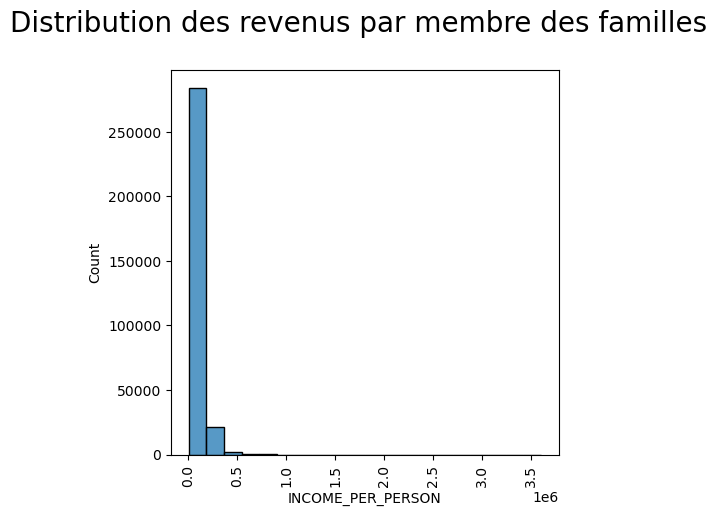

In [296]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des revenus par membre des familles", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['INCOME_PER_PERSON'], bins =20)

<AxesSubplot:xlabel='INCOME_PER_PERSON', ylabel='Count'>

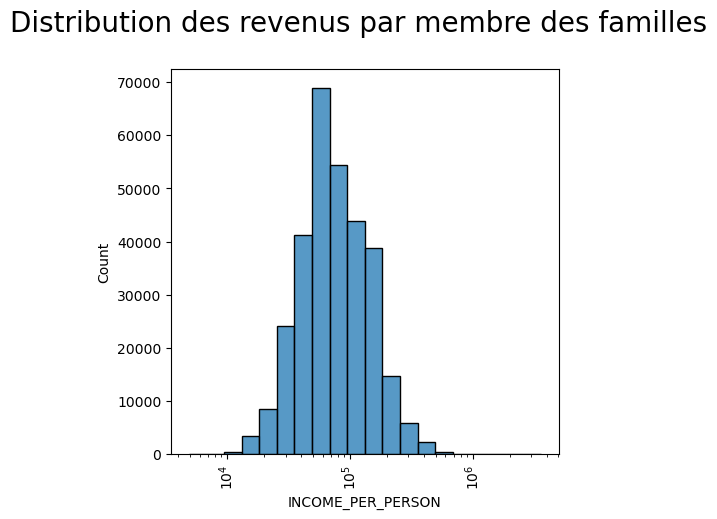

In [297]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution des revenus par membre des familles", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['INCOME_PER_PERSON'], bins =20,log_scale=True)

Vérifier corrélation entre cette feature et la capacité de remboursement

### EXT_SOURCE_1 / 2 / 3

<AxesSubplot:xlabel='EXT_SOURCE_1', ylabel='Count'>

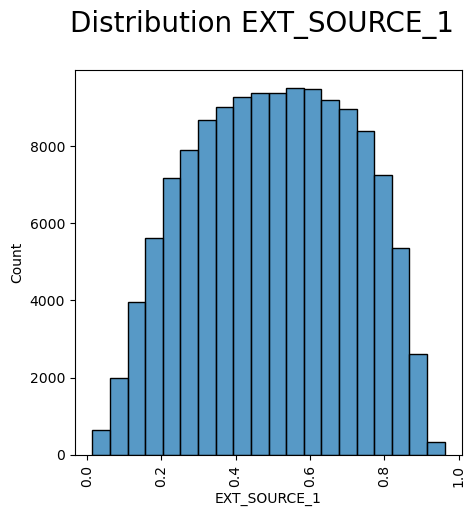

In [298]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution EXT_SOURCE_1", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['EXT_SOURCE_1'], bins =20)

<AxesSubplot:xlabel='EXT_SOURCE_2', ylabel='Count'>

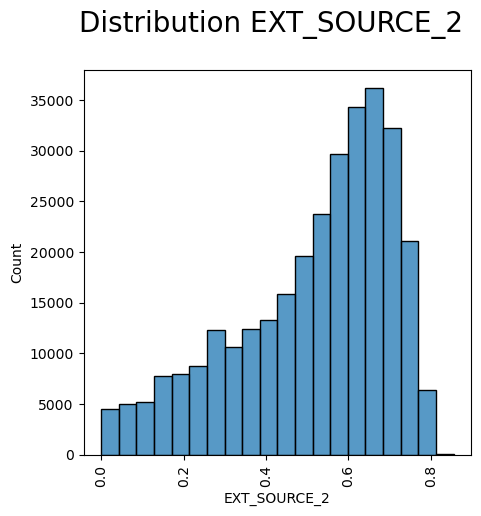

In [299]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution EXT_SOURCE_2", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['EXT_SOURCE_2'], bins =20)

<AxesSubplot:xlabel='EXT_SOURCE_3', ylabel='Count'>

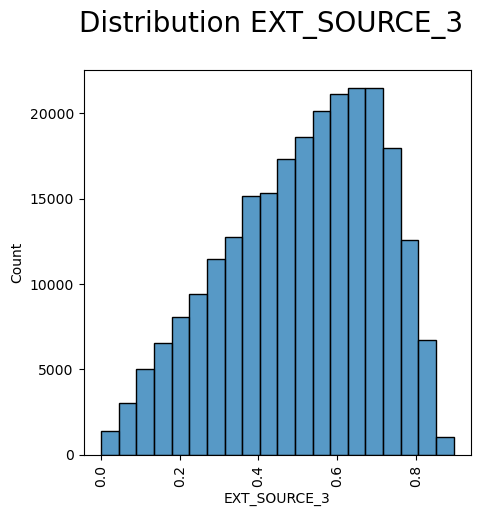

In [300]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution EXT_SOURCE_3", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['EXT_SOURCE_3'], bins =20)

### V(1) Prev_contract_nb

<AxesSubplot:xlabel='Prev_contract_nb'>

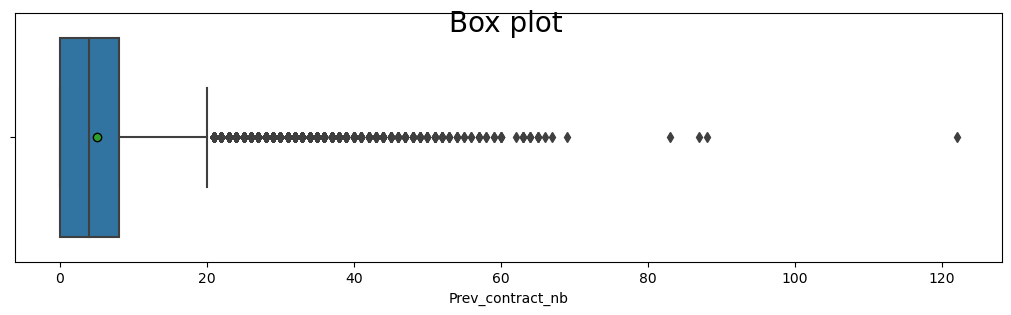

In [338]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=train_V1, x='Prev_contract_nb',showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})

In [344]:
tmp=train_V1.loc[train_V1['Prev_contract_nb']>60]
tmp['TARGET'].value_counts()

0    14
1     4
Name: TARGET, dtype: int64

In [ ]:
Suppression des 18 outliers ayant plus de 60 contrats

In [345]:
train_V1.shape

(307482, 30)

In [347]:
train_V1=train_V1.drop(train_V1.loc[train_V1['Prev_contract_nb']>60].index).reset_index(drop=True)
train_V1.shape

(307464, 30)

<AxesSubplot:xlabel='Prev_contract_nb', ylabel='Count'>

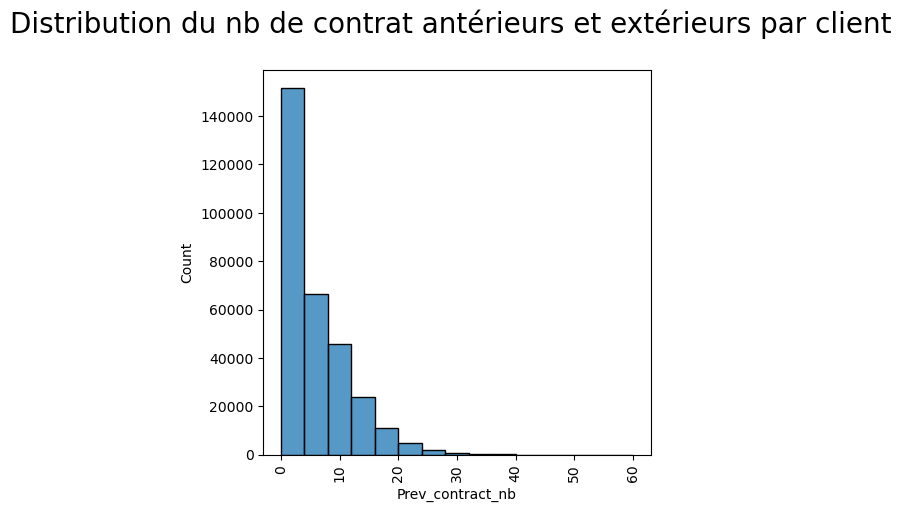

In [349]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution du nb de contrat antérieurs et extérieurs par client", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['Prev_contract_nb'], bins =15)

### Prev_AMT_CREDIT

<AxesSubplot:xlabel='Prev_AMT_CREDIT'>

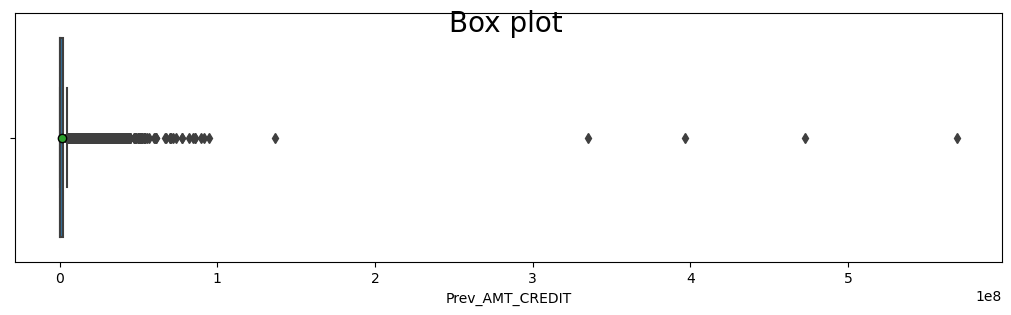

In [350]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=train_V1, x='Prev_AMT_CREDIT',showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})

In [353]:
tmp=train_V1.loc[train_V1['Prev_AMT_CREDIT']>100000000]
tmp['TARGET'].value_counts()

0    5
Name: TARGET, dtype: int64

Suppression de ces 5 outliers

In [355]:
train_V1=train_V1.drop(train_V1.loc[train_V1['Prev_AMT_CREDIT']>100000000].index).reset_index(drop=True)
train_V1.shape

(307459, 30)

<AxesSubplot:xlabel='Prev_AMT_CREDIT', ylabel='Count'>

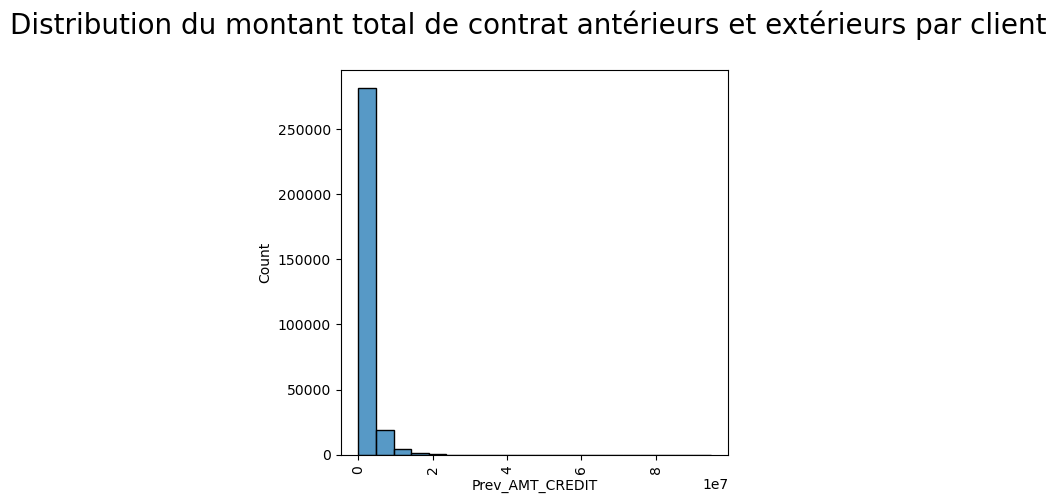

In [357]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution du montant total de contrat antérieurs et extérieurs par client", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['Prev_AMT_CREDIT'], bins =20)#, log_scale=True)

### Refused_rate

<AxesSubplot:xlabel='Refused_rate', ylabel='Count'>

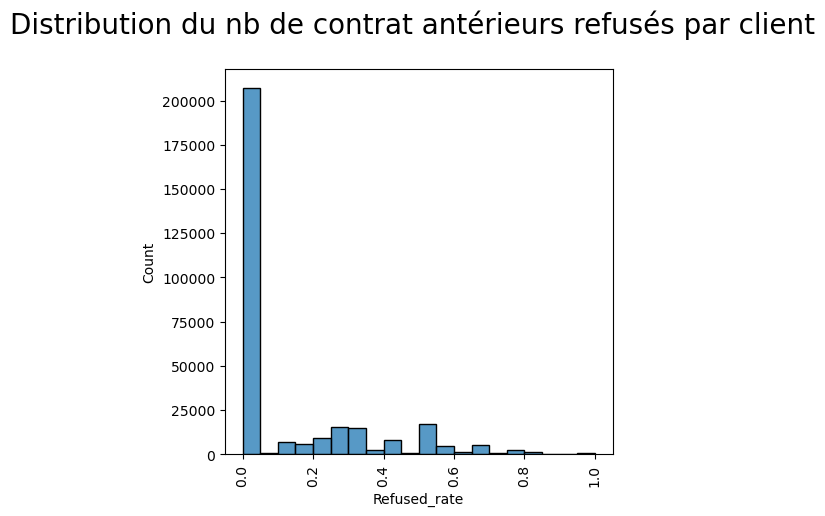

In [358]:
plt.figure(figsize = (5,5))
plt.suptitle("Distribution du nb de contrat antérieurs refusés par client", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['Refused_rate'], bins =20)

### default_payment

<AxesSubplot:title={'center':"Part des client n'ayant jamais eu un refus de crédit"}, ylabel='default_payment'>

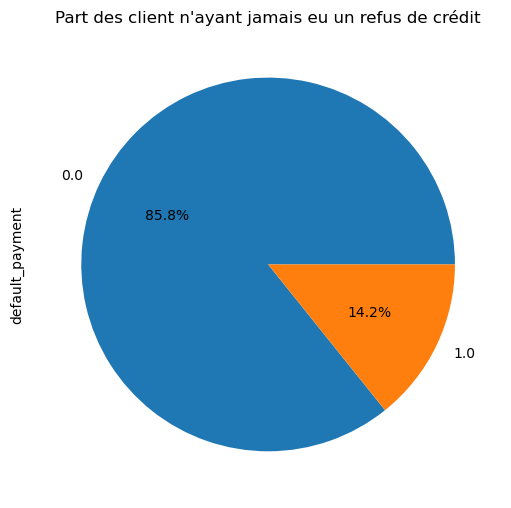

In [359]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['default_payment'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Part des client n'ayant jamais eu un refus de crédit")

### 3.3.2 Variables catégorielles

In [360]:
cat_feat=train_V1.select_dtypes(include=object).columns.to_list()
cat_feat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE']

In [361]:
train_V1.describe(include=object)

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307459      307459       307459          307459   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278183      202421       202896          213281   

        NAME_HOUSING_TYPE NAME_INCOME_TYPE NAME_FAMILY_STATUS  \
count              307459           307459             307459   
unique                  6                8                  6   
top     House / apartment          Working            Married   
freq               272821           158745             196400   

                  NAME_EDUCATION_TYPE  
count                          307459  
unique                              5  
top     Secondary / secondary special  
freq                           218361

Les features qui prennent 2 valeurs peuvent être transformées en booléen. A creuser pour gender qui ne devrait prendre que 2 valeurs

#### NAME_CONTRACT_TYPE

<AxesSubplot:title={'center':'Type de crédit'}, ylabel='NAME_CONTRACT_TYPE'>

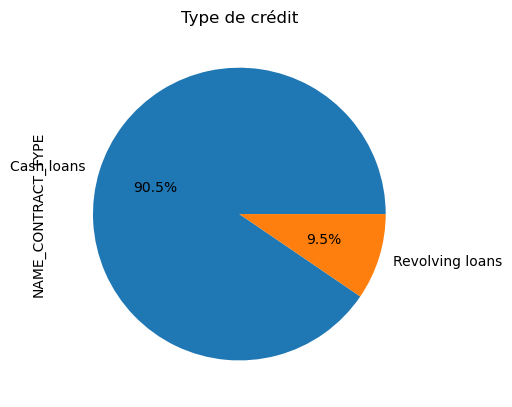

In [362]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Type de crédit")

#### Booléanisation de CONTRACT_TYPE (Cash loans = True; Revolving = False)

(Nouvelle feature où Cash_loans = 1 et Revolving = 0)

In [363]:
train_V1['Cash_loans']=(train_V1['NAME_CONTRACT_TYPE']=='Cash loans').astype(int)

<AxesSubplot:title={'center':'Type de crédit=cash loan'}, ylabel='Cash_loans'>

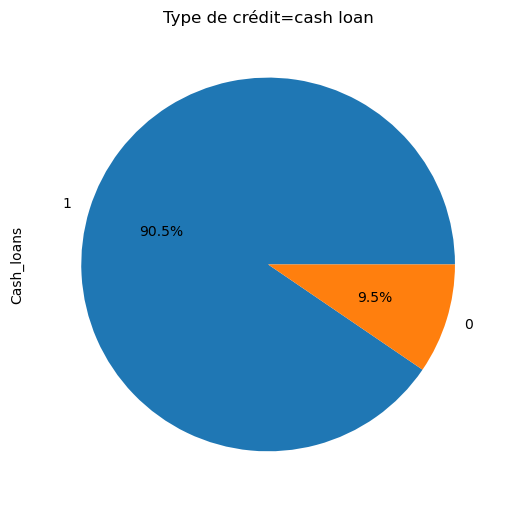

In [364]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['Cash_loans'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Type de crédit=cash loan")

Suppresion de la feature 'NAME_CONTRACT_TYPE'

In [365]:
train_V1=train_V1.drop(labels='NAME_CONTRACT_TYPE', axis=1).reset_index(drop=True)
train_V1.shape

(307459, 30)

#### CODE_GENDER

In [366]:
train_V1['CODE_GENDER'].value_counts()

F      202421
M      105034
XNA         4
Name: CODE_GENDER, dtype: int64

<AxesSubplot:title={'center':'Gender'}, ylabel='CODE_GENDER'>

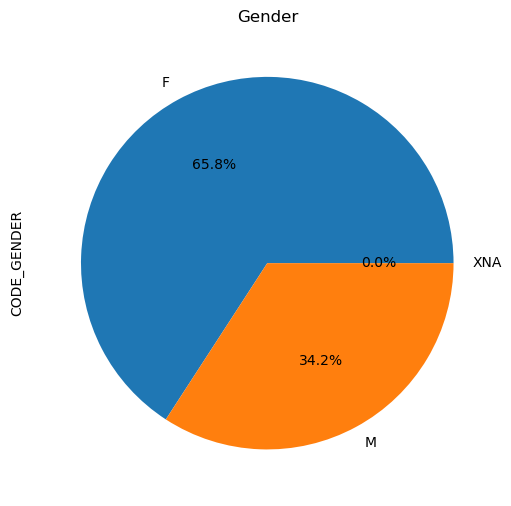

In [367]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['CODE_GENDER'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Gender")

In [368]:
train_V1.loc[train_V1['CODE_GENDER']=='XNA',:]

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR  OWN_CAR_AGE  \
35654       141289       0         XNA            Y         13.0   
38563       144669       0         XNA            N          NaN   
83369       196708       0         XNA            N          NaN   
189608      319880       0         XNA            Y          8.0   

       FLAG_OWN_REALTY    NAME_HOUSING_TYPE  AMT_INCOME_TOTAL  AMT_CREDIT  \
35654                Y  Municipal apartment          207000.0    382500.0   
38563                Y    House / apartment          157500.0    270000.0   
83369                Y    House / apartment          135000.0    405000.0   
189608               Y    House / apartment          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE NAME_FAMILY_STATUS  \
35654       19125.0         337500.0               Working            Married   
38563       13500.0         225000.0               Working            Married   
83369       20250.0         225000.0               Working            Married   
189608      27000.0         900000.0  Commercial associate     Civil marriage   

                  NAME_EDUCATION_TYPE  CNT_FAM_MEMBERS  EXT_SOURCE_1  \
35654   Secondary / secondary special              2.0           NaN   
38563   Secondary / secondary special              4.0           NaN   
83369                Higher education              3.0      0.404970   
189608              Incomplete higher              2.0      0.653035   

        EXT_SOURCE_2  EXT_SOURCE_3  Prev_contract_nb  Prev_AMT_CREDIT  \
35654       0.295998      0.461482               0.0              0.0   
38563       0.709205      0.310818              19.0        3757738.5   
83369       0.659185      0.076984              11.0        3112956.0   
189608      0.658620      0.360613              25.0        9022738.5   

        Refused_rate  default_payment  INCOME_CREDIT_PERC  \
35654       0.333333              0.0            0.541176   
38563       0.666667              1.0            0.583333   
83369       0.500000              0.0            0.333333   
189608      0.411765              0.0            0.458333   

        ANNUITY_INCOME_PERC  PAYMENT_RATE  client_age  client_prof_exp  \
35654              0.092391          0.05          55             28.0   
38563              0.085714          0.05          37              8.0   
83369              0.150000          0.05          29              3.0   
189608             0.109091          0.05          26              6.0   

        DAYS_EMPLOYED_PERC  INCOME_PER_PERSON  Cash_loans  
35654             0.509091           103500.0           0  
38563             0.216216            39375.0           0  
83369             0.103448            45000.0           0  
189608            0.230769           123750.0           0

Que faire des XNA? Correspond à des NAN 

#### => Suppression de ces 4 lignes

In [369]:
train_V1=train_V1.drop(train_V1.loc[train_V1['CODE_GENDER']=='XNA'].index).reset_index(drop=True)
train_V1.shape

(307455, 30)

<AxesSubplot:title={'center':'Gender'}, ylabel='CODE_GENDER'>

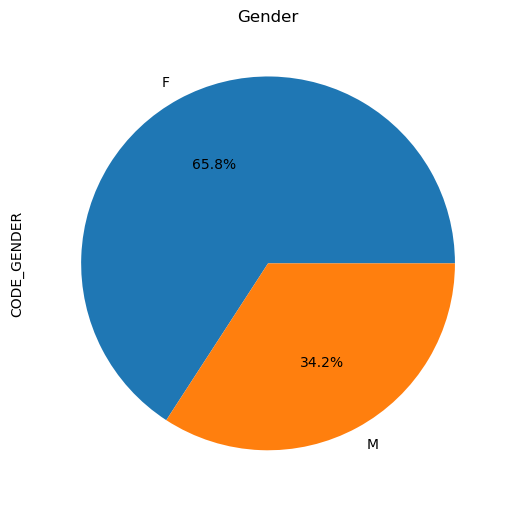

In [370]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['CODE_GENDER'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Gender")

#### Transformation en booléen
(F = 1 et M = 0)

In [371]:
train_V1['GENDER_FEMALE']=(train_V1['CODE_GENDER']=='F').astype(int)

<AxesSubplot:title={'center':'Gender=female'}, ylabel='GENDER_FEMALE'>

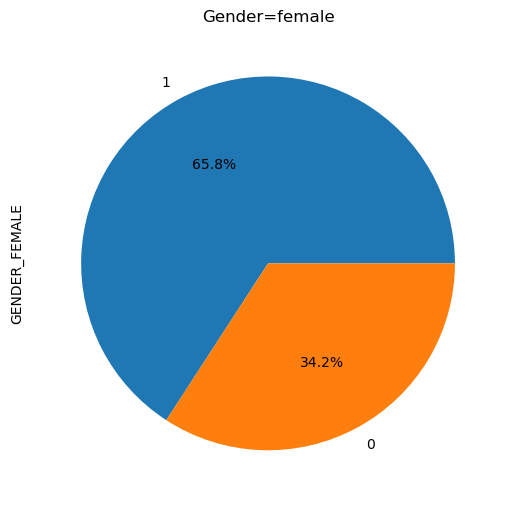

In [372]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['GENDER_FEMALE'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Gender=female")

Suppresion de la feature 'CODE_GENDER'

In [373]:
train_V1=train_V1.drop(labels='CODE_GENDER', axis=1).reset_index(drop=True)
train_V1.shape

(307455, 30)

#### FLAG_OWN_CAR

<AxesSubplot:title={'center':'Propriétaires de voitures'}, ylabel='FLAG_OWN_CAR'>

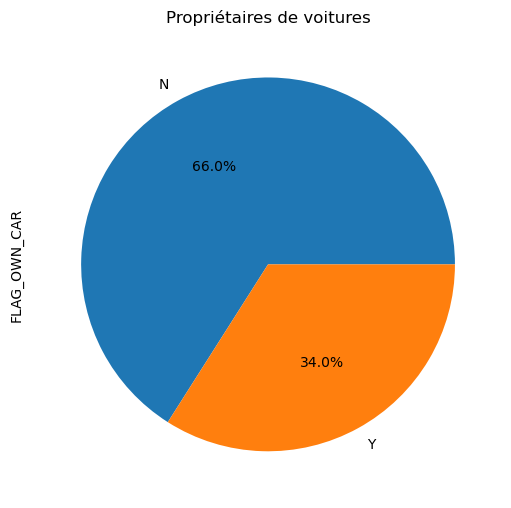

In [374]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['FLAG_OWN_CAR'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Propriétaires de voitures")

#### Transformation en booléen
(Nouvelle feature avec N = 0 et Y = 1)

In [375]:
train_V1['FLAG_OWN_CAR']=(train_V1['FLAG_OWN_CAR']=='Y').astype(int)

#### FLAG_OWN_REALTY

<AxesSubplot:title={'center':'Propriétaires de bien immo'}, ylabel='FLAG_OWN_REALTY'>

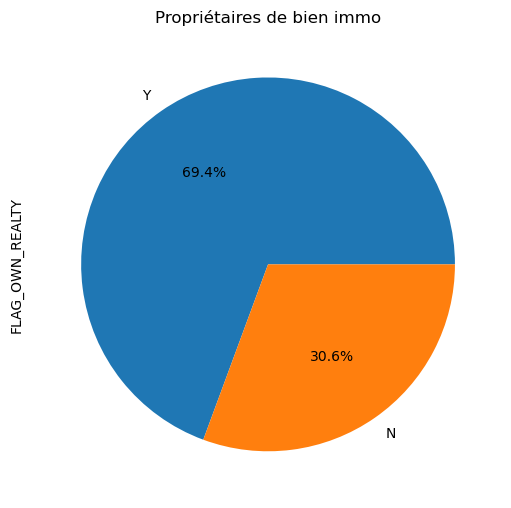

In [376]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['FLAG_OWN_REALTY'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Propriétaires de bien immo")

#### Transformation en booléen
(Nouvelle feature avec N = 0 et Y = 1)

In [377]:
train_V1['FLAG_OWN_REALTY']=(train_V1['FLAG_OWN_REALTY']=='Y').astype(int)

#### NAME_HOUSING_TYPE

In [378]:
train_V1['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272818
With parents            14837
Municipal apartment     11181
Rented apartment         4880
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

A priori non utilisé pour ML mais à étudier via EDA

#### NAME_INCOME_TYPE

In [379]:
train_V1['NAME_INCOME_TYPE'].value_counts()

Working                 158742
Commercial associate     71602
Pensioner                55358
State servant            21698
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='Percent'>

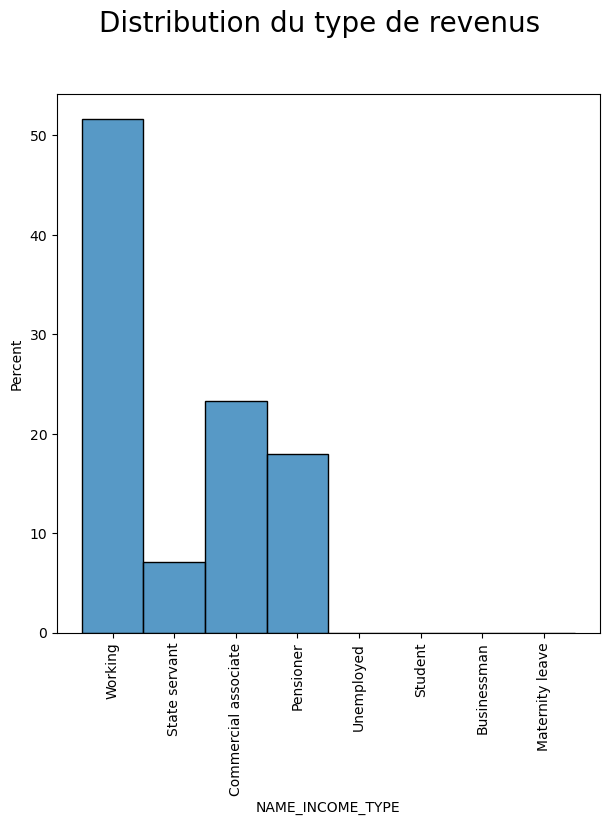

In [380]:
 plt.figure(figsize = (7,7))#,constrained_layout=True)
plt.suptitle("Distribution du type de revenus", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['NAME_INCOME_TYPE'], bins =20, stat='percent')

In [381]:
cont_table=pd.crosstab(train_V1.NAME_INCOME_TYPE,train_V1.TARGET)
cont_table['pct_KO']=round(cont_table[1]/cont_table[0]*100,2)
cont_table

TARGET                     0      1  pct_KO
NAME_INCOME_TYPE                           
Businessman               10      0    0.00
Commercial associate   66243   5359    8.09
Maternity leave            3      2   66.67
Pensioner              52377   2981    5.69
State servant          20449   1249    6.11
Student                   18      0    0.00
Unemployed                14      8   57.14
Working               143522  15220   10.60

En V0, Transformation de cette variable en booléen: actif vs non actif? 

En V1, voir si on peut détailler avec OCCUPATION_TYPE malgré le nb important de NaN?

In [382]:
train['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [383]:
cont_table=pd.crosstab(train.OCCUPATION_TYPE,train.TARGET)
cont_table['pct_KO']=round(cont_table[1]/cont_table[0]*100,2)
cont_table

TARGET                     0     1  pct_KO
OCCUPATION_TYPE                           
Accountants             9339   474    5.08
Cleaning staff          4206   447   10.63
Cooking staff           5325   621   11.66
Core staff             25832  1738    6.73
Drivers                16496  2107   12.77
HR staff                 527    36    6.83
High skill tech staff  10679   701    6.56
IT staff                 492    34    6.91
Laborers               49348  5838   11.83
Low-skill Laborers      1734   359   20.70
Managers               20043  1328    6.63
Medicine staff          7965   572    7.18
Private service staff   2477   175    7.06
Realty agents            692    59    8.53
Sales staff            29010  3092   10.66
Secretaries             1213    92    7.58
Security staff          5999   722   12.04
Waiters/barmen staff    1196   152   12.71

In [384]:
train.loc[train['OCCUPATION_TYPE'].isna(),['NAME_INCOME_TYPE']].value_counts()

NAME_INCOME_TYPE    
Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
dtype: int64

In [385]:
train.loc[train['NAME_INCOME_TYPE']=='State servant',['OCCUPATION_TYPE']].value_counts()

OCCUPATION_TYPE      
Core staff               6956
Medicine staff           2585
Managers                 2142
Laborers                 1868
High skill tech staff    1033
Drivers                   815
Accountants               729
Cooking staff             453
Security staff            380
Secretaries               264
Cleaning staff            261
Sales staff               186
HR staff                   64
IT staff                   55
Waiters/barmen staff       53
Private service staff      38
Low-skill Laborers         25
Realty agents               9
dtype: int64

Les States Servant sotn à classer dans les actifs

In [386]:
train.loc[train['NAME_INCOME_TYPE']=='Student',['OCCUPATION_TYPE']].value_counts()
                     

OCCUPATION_TYPE     
Laborers                5
Core staff              3
Low-skill Laborers      2
Accountants             1
Drivers                 1
Waiters/barmen staff    1
dtype: int64

Classons les étudiants parmi les actifs

In [387]:
for cat in train_V1['NAME_INCOME_TYPE'].value_counts().index:
    print(cat +'\n')
    print(train.loc[train['NAME_INCOME_TYPE']==cat,['OCCUPATION_TYPE']].value_counts())
    print('\n')

Working

OCCUPATION_TYPE      
Laborers                 40548
Sales staff              20811
Core staff               14080
Drivers                  12871
Managers                 10306
High skill tech staff     6852
Accountants               5112
Medicine staff            4915
Security staff            4782
Cooking staff             4188
Cleaning staff            3498
Low-skill Laborers        1696
Private service staff     1625
Waiters/barmen staff       908
Secretaries                698
Realty agents              418
HR staff                   279
IT staff                   267
dtype: int64


Commercial associate

OCCUPATION_TYPE      
Laborers                 12763
Sales staff              11104
Managers                  8916
Core staff                6528
Drivers                   4916
Accountants               3970
High skill tech staff     3495
Security staff            1559
Cooking staff             1305
Medicine staff            1036
Private service staff      989
Cleaning st

Dictionnaire pour classer les actifs et les non actifs

In [388]:
train_V1['NAME_INCOME_TYPE'].value_counts().index.to_list()

['Working',
 'Commercial associate',
 'Pensioner',
 'State servant',
 'Unemployed',
 'Student',
 'Businessman',
 'Maternity leave']

In [389]:
active={
    'Working':1,
 'Commercial associate':1,
 'Pensioner':0,
 'State servant':1,
 'Unemployed':0,
 'Student':1,
 'Businessman':1,
 'Maternity leave':1}

In [390]:
active.items()

dict_items([('Working', 1), ('Commercial associate', 1), ('Pensioner', 0), ('State servant', 1), ('Unemployed', 0), ('Student', 1), ('Businessman', 1), ('Maternity leave', 1)])

In [391]:
active.values()

dict_values([1, 1, 0, 1, 0, 1, 1, 1])

In [392]:
train_V1['active_client']=0
for idx in range(len(train_V1)):
    for k,v in active.items():
        if train_V1['NAME_INCOME_TYPE'][idx]==k:
            train_V1['active_client'][idx]=v

C:\Users\xavie\AppData\Local\Temp\ipykernel_69176\1320502551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_V1['active_client'][idx]=v


In [393]:
train_V1['active_client']

0         1
1         1
2         1
3         1
4         1
         ..
307450    1
307451    0
307452    1
307453    1
307454    1
Name: active_client, Length: 307455, dtype: int64

In [394]:
train_V1['active_client'].isna().sum()

0

<AxesSubplot:title={'center':'Actifs = 1 / Non_actifs =0'}, ylabel='active_client'>

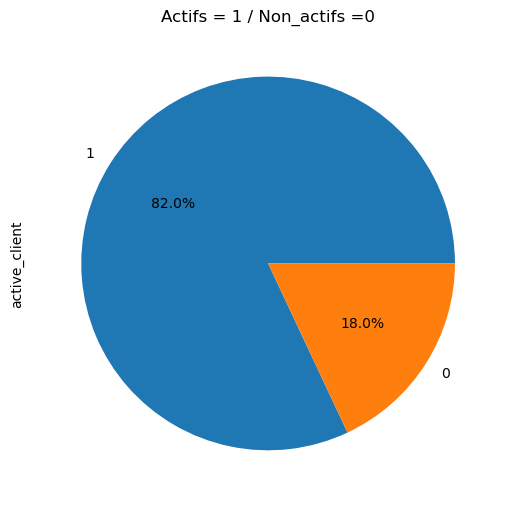

In [395]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['active_client'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Actifs = 1 / Non_actifs =0")

#### NAME_FAMILY_STATUS

In [396]:
train_V1['NAME_FAMILY_STATUS'].value_counts().index.to_list()

['Married',
 'Single / not married',
 'Civil marriage',
 'Separated',
 'Widow',
 'Unknown']

In [397]:
train_V1.loc[train_V1['NAME_FAMILY_STATUS']=='Unknown',:]

SK_ID_CURR  TARGET  FLAG_OWN_CAR  OWN_CAR_AGE  FLAG_OWN_REALTY  \
41977       148605       0             0          NaN                1   
187314      317181       0             0          NaN                1   

          NAME_HOUSING_TYPE  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
41977   Municipal apartment          450000.0    675000.0      33750.0   
187314    House / apartment          202500.0    585000.0      29250.0   

        AMT_GOODS_PRICE      NAME_INCOME_TYPE NAME_FAMILY_STATUS  \
41977          675000.0  Commercial associate            Unknown   
187314         585000.0  Commercial associate            Unknown   

       NAME_EDUCATION_TYPE  CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  \
41977      Lower secondary              1.0      0.628564      0.700618   
187314    Higher education              1.0           NaN      0.645168   

        EXT_SOURCE_3  Prev_contract_nb  Prev_AMT_CREDIT  Refused_rate  \
41977            NaN               0.0              0.0           0.0   
187314      0.670652               0.0              0.0           0.0   

        default_payment  INCOME_CREDIT_PERC  ANNUITY_INCOME_PERC  \
41977               0.0            0.666667             0.075000   
187314              0.0            0.346154             0.144444   

        PAYMENT_RATE  client_age  client_prof_exp  DAYS_EMPLOYED_PERC  \
41977           0.05          33              3.0            0.090909   
187314          0.05          35              1.0            0.028571   

        INCOME_PER_PERSON  Cash_loans  GENDER_FEMALE  active_client  
41977            450000.0           0              0              1  
187314           202500.0           0              1              1

Pour les 'Unknown', 1 seul membre dans la famille => single

In [398]:
cont_table=pd.crosstab(train_V1.NAME_FAMILY_STATUS,train_V1.TARGET)
cont_table['pct_KO']=round(cont_table[1]/cont_table[0]*100,2)
cont_table

TARGET                     0      1  pct_KO
NAME_FAMILY_STATUS                         
Civil marriage         26807   2961   11.05
Married               181553  14844    8.18
Separated              18147   1620    8.93
Single / not married   40977   4457   10.88
Unknown                    2      0    0.00
Widow                  15150    937    6.18

Dcitionnaire pour différencier personne vivant seul ou en couple:

=> 1 = en couple

=> 0 = single

In [399]:
relationship={'Married':1,
 'Single / not married':0,
 'Civil marriage':1,
 'Separated':0,
 'Widow':0,
 'Unknown':0}

In [400]:
train_V1['relationship']=0
for idx in range(len(train_V1)):
    for k,v in relationship.items():
        if train_V1['NAME_FAMILY_STATUS'][idx]==k:
            train_V1['relationship'][idx]=v

C:\Users\xavie\AppData\Local\Temp\ipykernel_69176\3797116526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_V1['relationship'][idx]=v


<AxesSubplot:title={'center':'en couple: 1 / single =0'}, ylabel='relationship'>

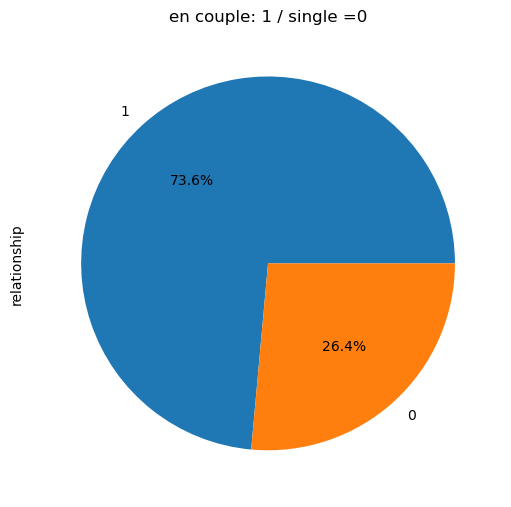

In [401]:
plt.figure(figsize = (5,5),constrained_layout=True)
train_V1['relationship'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="en couple: 1 / single =0")

#### NAME_EDUCATION_TYPE

In [402]:
train_V1['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218359
Higher education                  74843
Incomplete higher                 10275
Lower secondary                    3814
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='Percent'>

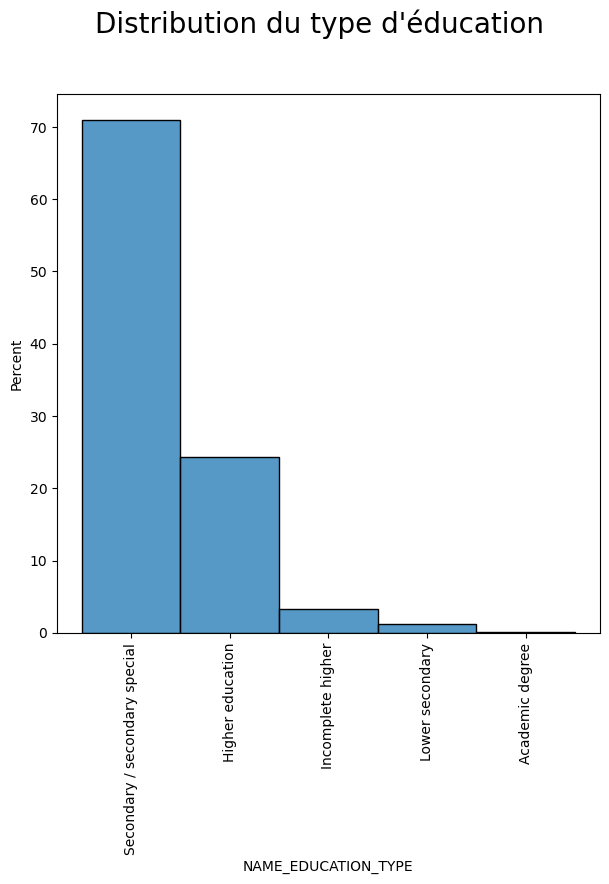

In [403]:
 plt.figure(figsize = (7,7))#,constrained_layout=True)
plt.suptitle("Distribution du type d'éducation", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(train_V1['NAME_EDUCATION_TYPE'], bins =20, stat='percent')

### Visualisation après 1ere phase de feat engineerng

In [404]:
train_V1.head()

SK_ID_CURR  TARGET  FLAG_OWN_CAR  OWN_CAR_AGE  FLAG_OWN_REALTY  \
0      100002       1             0          NaN                1   
1      100003       0             0          NaN                0   
2      100004       0             1         26.0                1   
3      100006       0             0          NaN                1   
4      100007       0             0          NaN                1   

   NAME_HOUSING_TYPE  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  House / apartment          202500.0    406597.5      24700.5   
1  House / apartment          270000.0   1293502.5      35698.5   
2  House / apartment           67500.0    135000.0       6750.0   
3  House / apartment          135000.0    312682.5      29686.5   
4  House / apartment          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE    NAME_FAMILY_STATUS  \
0         351000.0          Working  Single / not married   
1        1129500.0    State servant               Married   
2         135000.0          Working  Single / not married   
3         297000.0          Working        Civil marriage   
4         513000.0          Working  Single / not married   

             NAME_EDUCATION_TYPE  CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  \
0  Secondary / secondary special              1.0      0.083037      0.262949   
1               Higher education              2.0      0.311267      0.622246   
2  Secondary / secondary special              1.0           NaN      0.555912   
3  Secondary / secondary special              2.0           NaN      0.650442   
4  Secondary / secondary special              1.0           NaN      0.322738   

   EXT_SOURCE_3  Prev_contract_nb  Prev_AMT_CREDIT  Refused_rate  \
0      0.139376               7.0       526610.565      0.000000   
1           NaN               7.0      2469973.500      0.000000   
2      0.729567               3.0       209143.800      0.000000   
3           NaN               0.0            0.000      0.166667   
4           NaN               0.0            0.000      0.000000   

   default_payment  INCOME_CREDIT_PERC  ANNUITY_INCOME_PERC  PAYMENT_RATE  \
0              0.0            0.498036             0.121978      0.060749   
1              0.0            0.208736             0.132217      0.027598   
2              0.0            0.500000             0.100000      0.050000   
3              0.0            0.431748             0.219900      0.094941   
4              0.0            0.236842             0.179963      0.042623   

   client_age  client_prof_exp  DAYS_EMPLOYED_PERC  INCOME_PER_PERSON  \
0          25              2.0            0.080000           202500.0   
1          45              3.0            0.066667           135000.0   
2          52              1.0            0.019231            67500.0   
3          52              8.0            0.153846            67500.0   
4          54              8.0            0.148148           121500.0   

   Cash_loans  GENDER_FEMALE  active_client  relationship  
0           1              0              1             0  
1           1              1              1             1  
2           0              0              1             0  
3           1              1              1             1  
4           1              0              1             0

In [405]:
train_V1.shape

(307455, 32)

In [406]:
train_V1.dtypes

SK_ID_CURR               int64
TARGET                   int64
FLAG_OWN_CAR             int32
OWN_CAR_AGE            float64
FLAG_OWN_REALTY          int32
NAME_HOUSING_TYPE       object
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_INCOME_TYPE        object
NAME_FAMILY_STATUS      object
NAME_EDUCATION_TYPE     object
CNT_FAM_MEMBERS        float64
EXT_SOURCE_1           float64
EXT_SOURCE_2           float64
EXT_SOURCE_3           float64
Prev_contract_nb       float64
Prev_AMT_CREDIT        float64
Refused_rate           float64
default_payment        float64
INCOME_CREDIT_PERC     float64
ANNUITY_INCOME_PERC    float64
PAYMENT_RATE           float64
client_age               int32
client_prof_exp        float64
DAYS_EMPLOYED_PERC     float64
INCOME_PER_PERSON      float64
Cash_loans               int32
GENDER_FEMALE            int32
active_client            int64
relationship             int64
dtype: o

In [407]:
train_V1.isna().sum()

SK_ID_CURR                  0
TARGET                      0
FLAG_OWN_CAR                0
OWN_CAR_AGE            202899
FLAG_OWN_REALTY             0
NAME_HOUSING_TYPE           0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                 0
AMT_GOODS_PRICE             0
NAME_INCOME_TYPE            0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
CNT_FAM_MEMBERS             0
EXT_SOURCE_1           173353
EXT_SOURCE_2              660
EXT_SOURCE_3            60960
Prev_contract_nb            0
Prev_AMT_CREDIT             0
Refused_rate                0
default_payment             0
INCOME_CREDIT_PERC          0
ANNUITY_INCOME_PERC         0
PAYMENT_RATE                0
client_age                  0
client_prof_exp             0
DAYS_EMPLOYED_PERC          0
INCOME_PER_PERSON           0
Cash_loans                  0
GENDER_FEMALE               0
active_client               0
relationship                0
dtype: int64

## 5.2 Analyse bi-variée

### 3.4.1 Variables quantitatives / Matrice de corrélation

In [408]:
correlations = train_V1.corr()['TARGET'].sort_values()

In [409]:
print('Most Positive Correlations:\n', correlations)

Most Positive Correlations:
 EXT_SOURCE_3          -0.178885
EXT_SOURCE_2          -0.160415
EXT_SOURCE_1          -0.155254
client_age            -0.078232
GENDER_FEMALE         -0.054713
client_prof_exp       -0.046049
AMT_GOODS_PRICE       -0.039626
DAYS_EMPLOYED_PERC    -0.036127
AMT_CREDIT            -0.030369
AMT_INCOME_TOTAL      -0.022137
FLAG_OWN_CAR          -0.021891
INCOME_PER_PERSON     -0.015190
AMT_ANNUITY           -0.012786
relationship          -0.012236
INCOME_CREDIT_PERC    -0.009266
Prev_AMT_CREDIT       -0.007963
FLAG_OWN_REALTY       -0.006179
SK_ID_CURR            -0.002088
Prev_contract_nb       0.001860
CNT_FAM_MEMBERS        0.009284
PAYMENT_RATE           0.012742
ANNUITY_INCOME_PERC    0.014309
default_payment        0.018071
Cash_loans             0.030874
OWN_CAR_AGE            0.037615
active_client          0.046029
Refused_rate           0.080514
TARGET                 1.000000
Name: TARGET, dtype: float64


En V2, on observe une corrélation entre 'Refused_rate' et 'Target'. Les 3 autres features ajoutées ('Prev_contract_nb', 'Prev_AMT_CREDIT' et 'default_payment' sont peu corrélées à la 'Target

Text(0.5, 1.0, 'Matrice de corrélation')

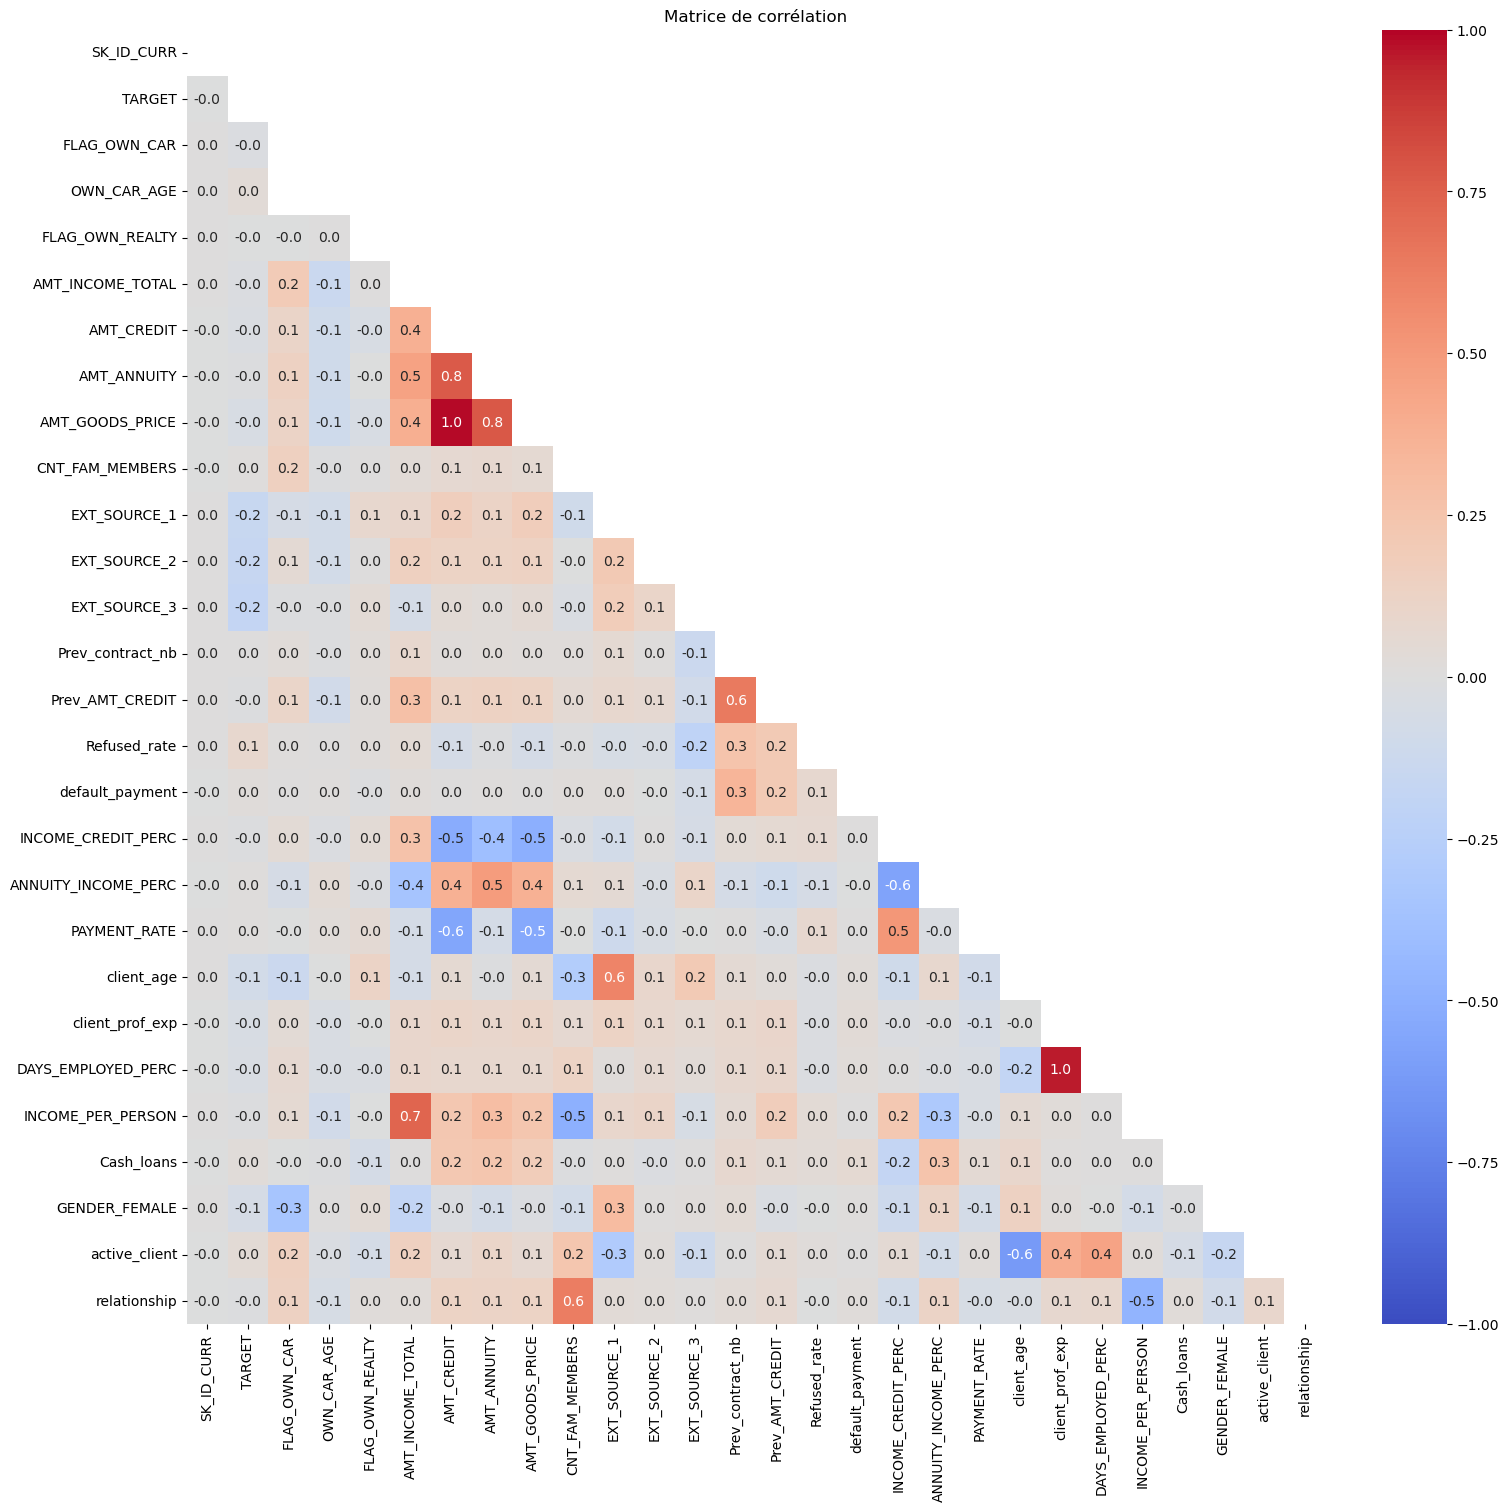

In [410]:
corr=train_V1.corr()
mask=np.triu(corr)
plt.figure(figsize = (15,15),constrained_layout=True)
sns.heatmap(corr, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap="coolwarm",mask=mask)
plt.title("Matrice de corrélation")

Quelques relations semblent fortes:

- V2: corrélation très forte entre client_prof_exp rt new feature DAYS_EMPLOYED_PERC (nouvelle feature supprimée pour ML)
- Très forte corrélation entre AMT_GOODS_PRICE et AMT_CREDIT=> AMT_GOODS_PRICE ne sera pas pris en compte pour le ML mais servira de base pour définir une garantie en cas de défaillance du client

- entre montant du crédit et annuité

- entre revenu et montant du crédit et annuité

- EXT_SOURCE_1 et age du client

- Pas de relation évidente entre TARGET et <> features

In [411]:
train_V1=train_V1.drop(labels='DAYS_EMPLOYED_PERC', axis=1).reset_index(drop=True)
train_V1.shape

(307455, 31)

In [412]:
train_V1.to_csv('C:/Users/xavie/P7/train_V2.csv', index=False)

In [413]:
if DISPLAY:
    sns.pairplot(train_V1, corner = True)

### Boxplots pour essayer de comprendre lien eventuel entre Target et <> features

In [414]:
col_train=train_V1.columns.to_list()

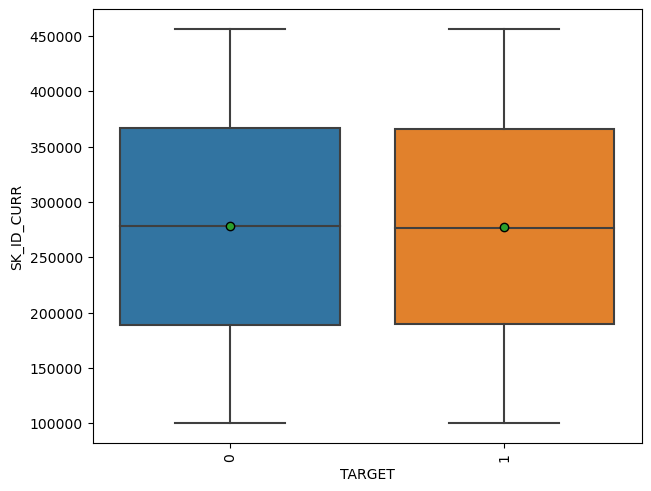

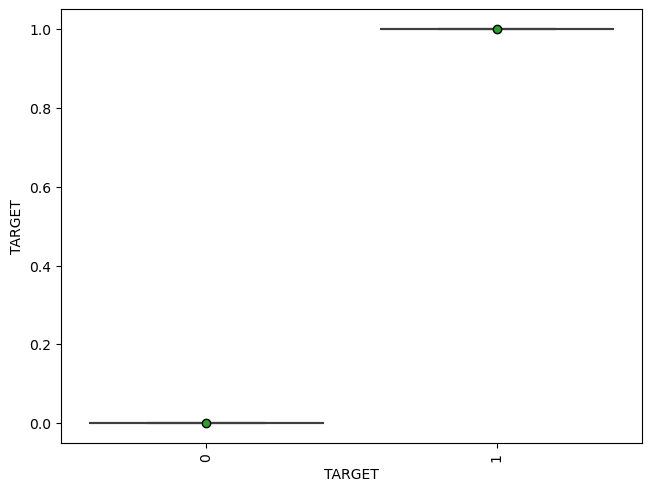

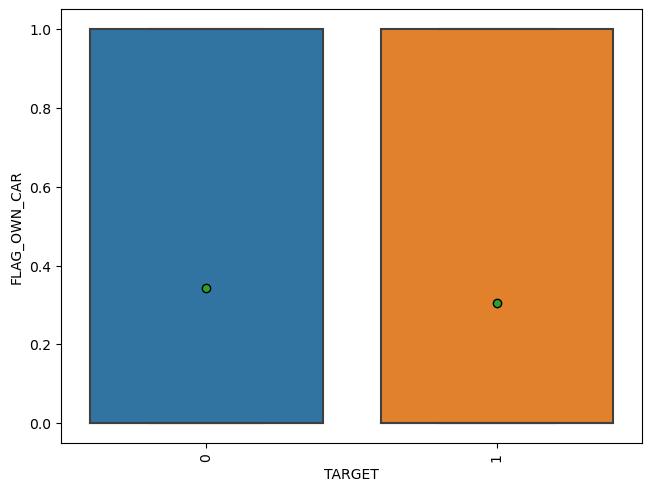

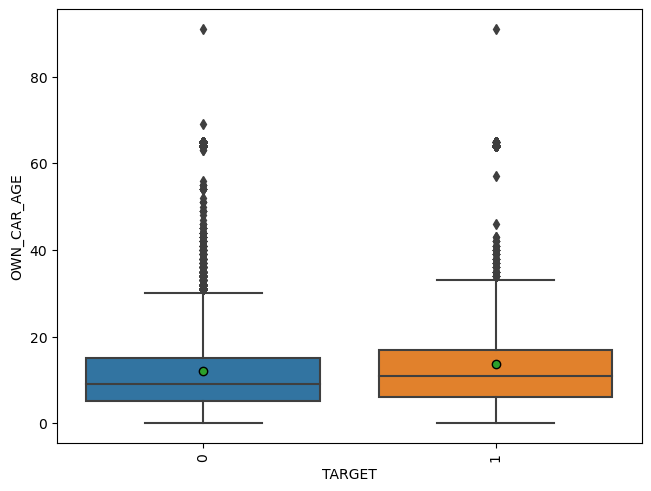

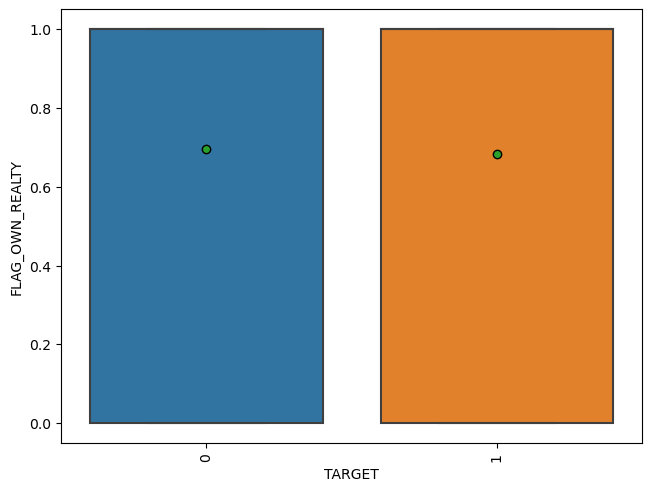

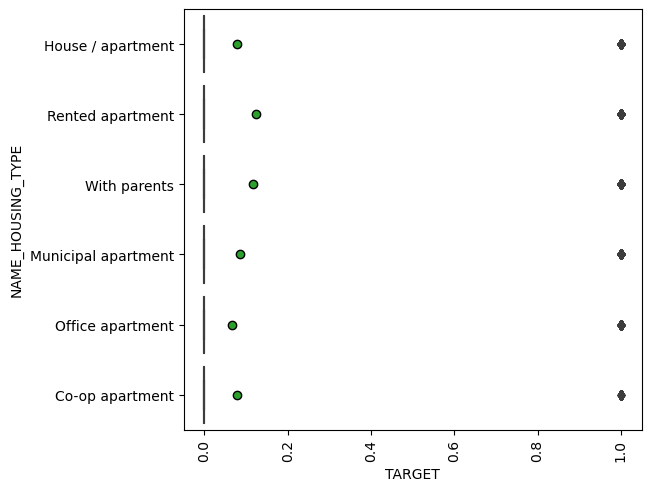

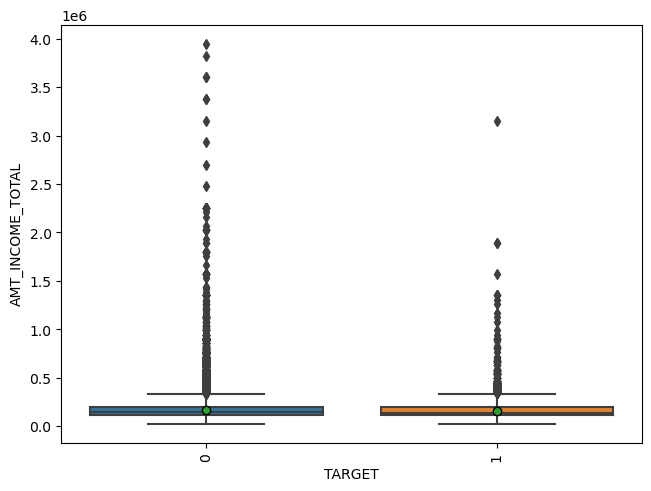

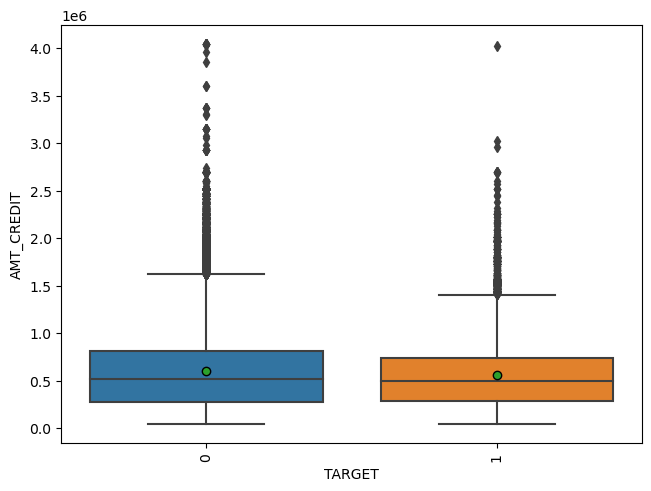

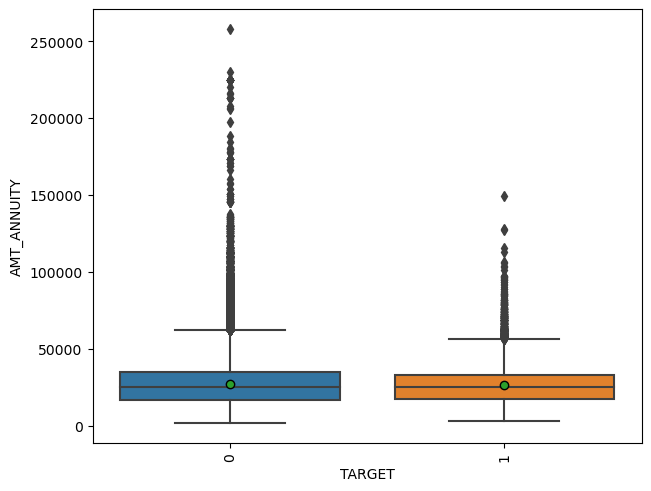

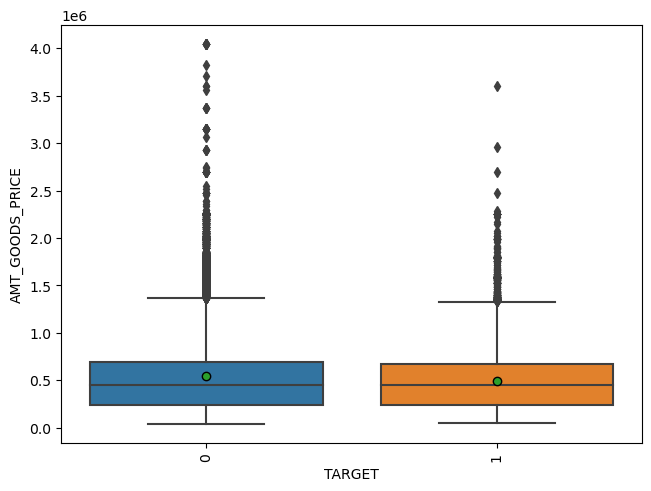

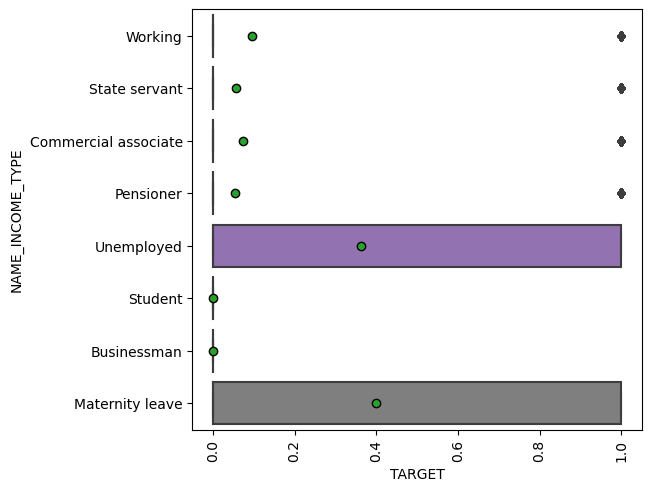

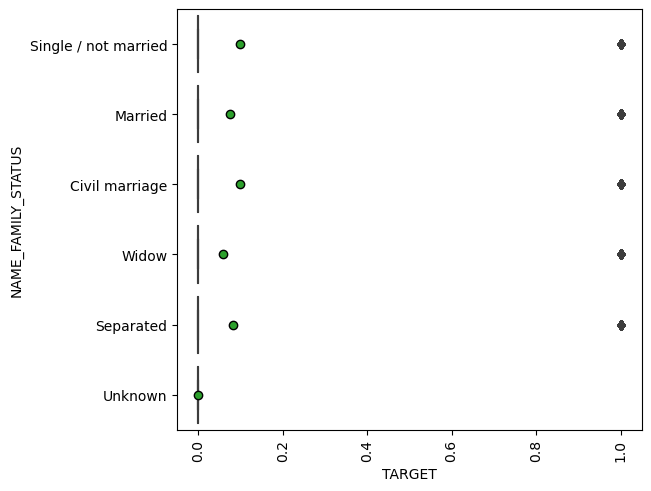

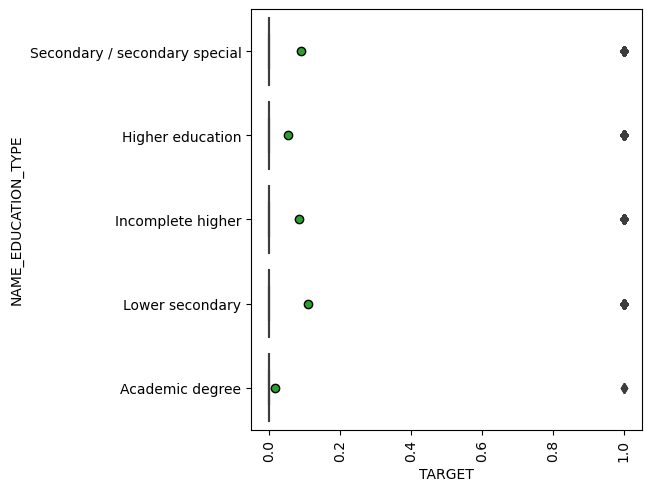

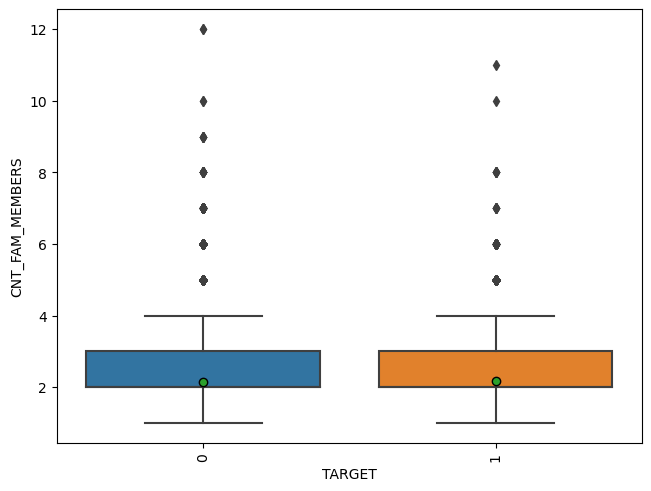

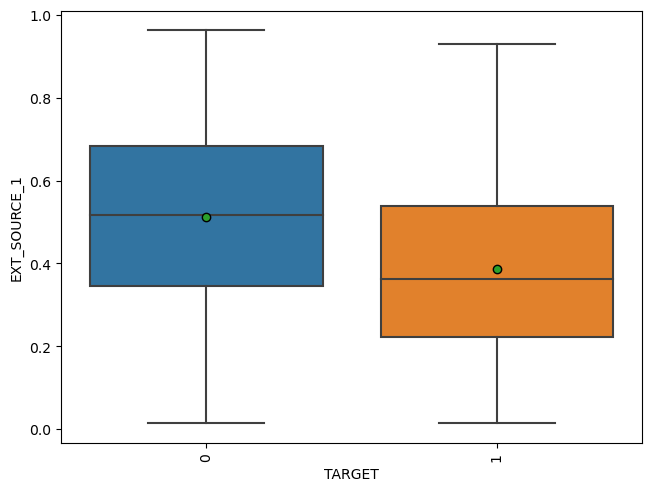

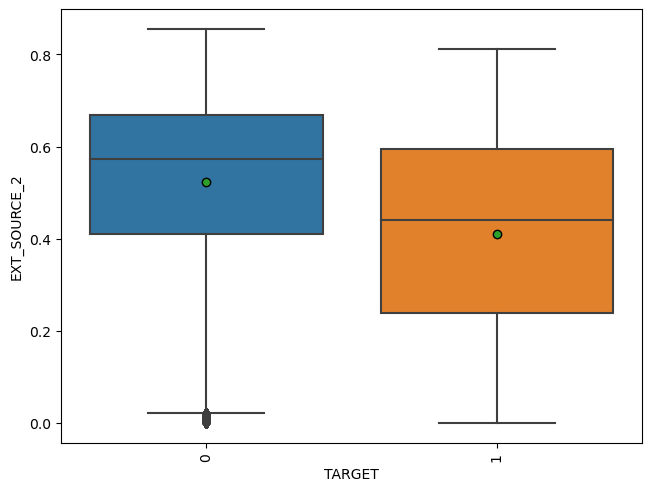

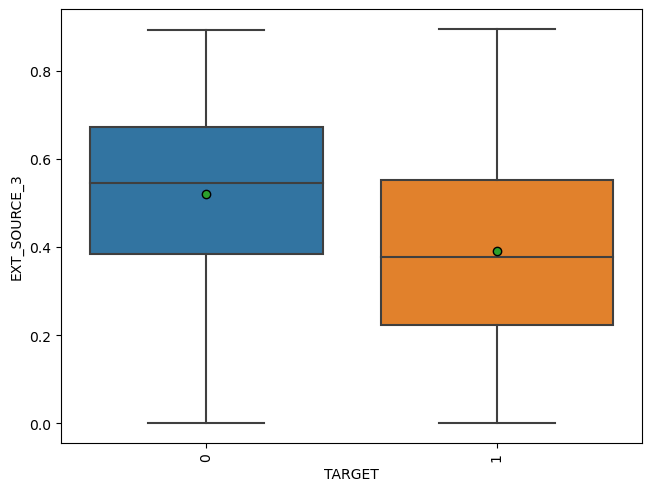

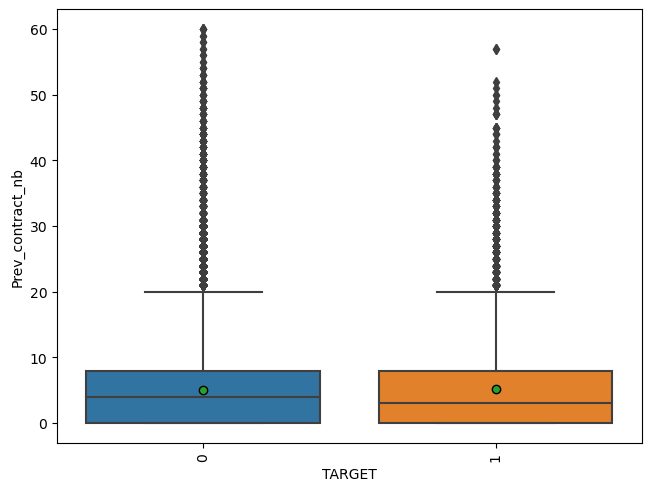

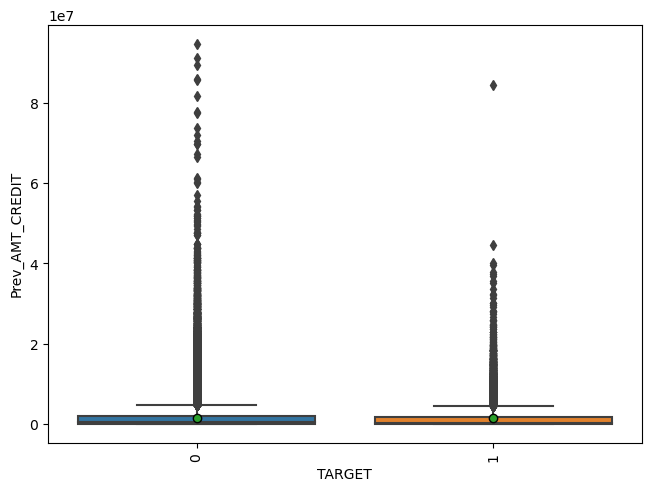

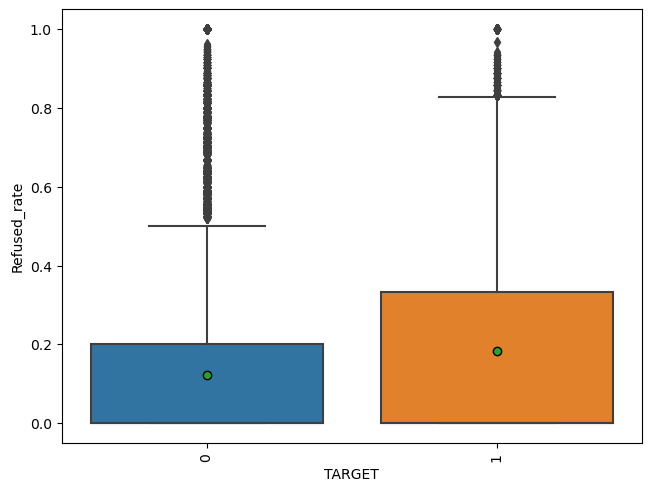

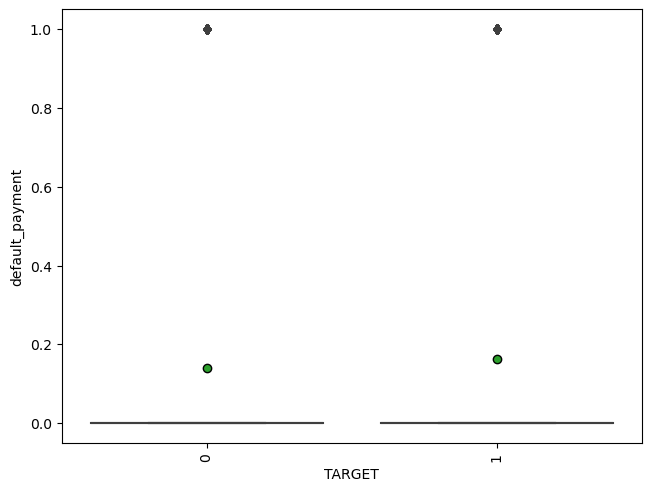

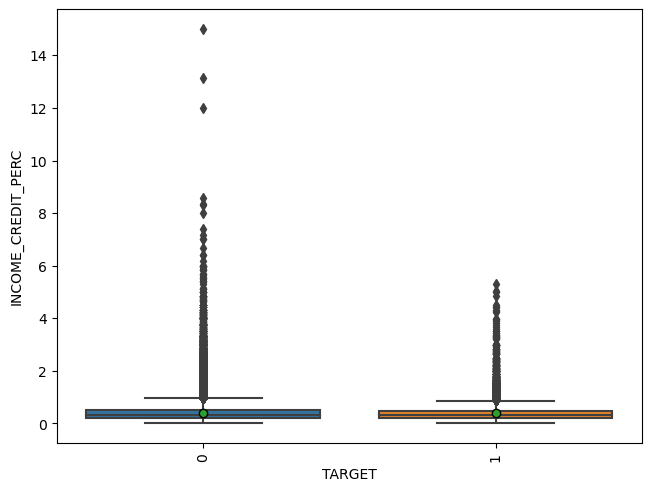

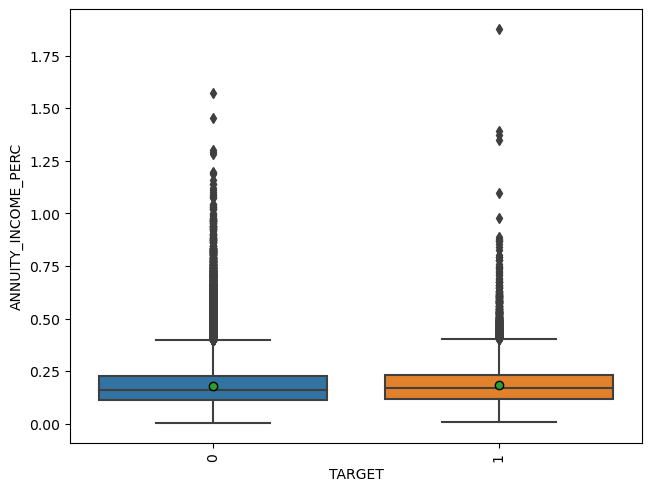

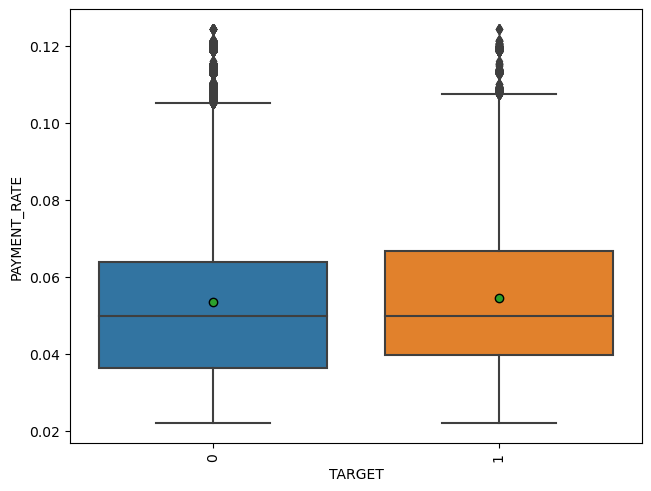

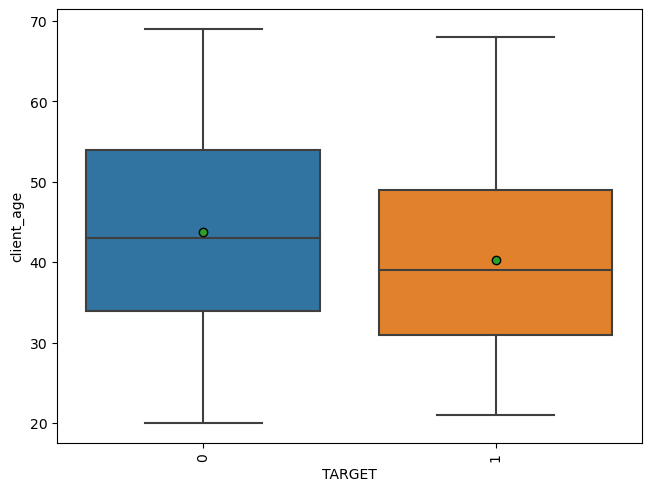

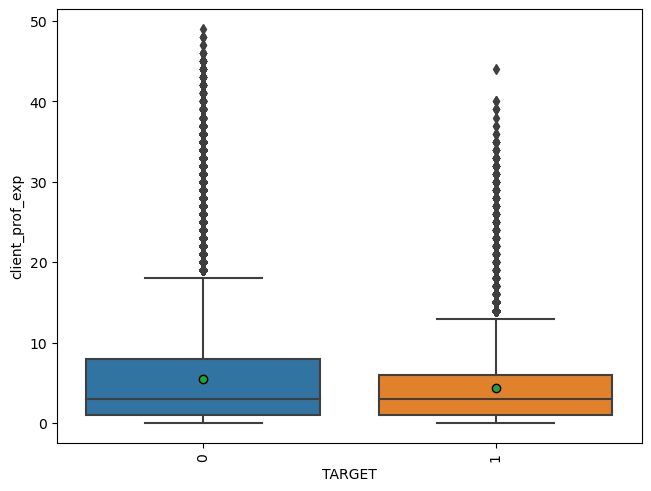

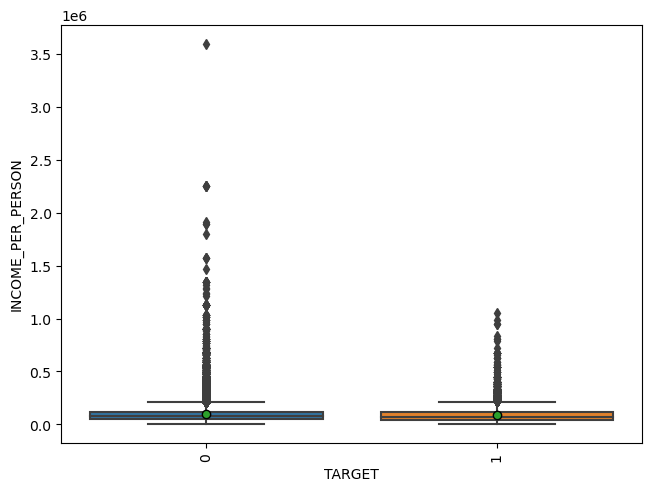

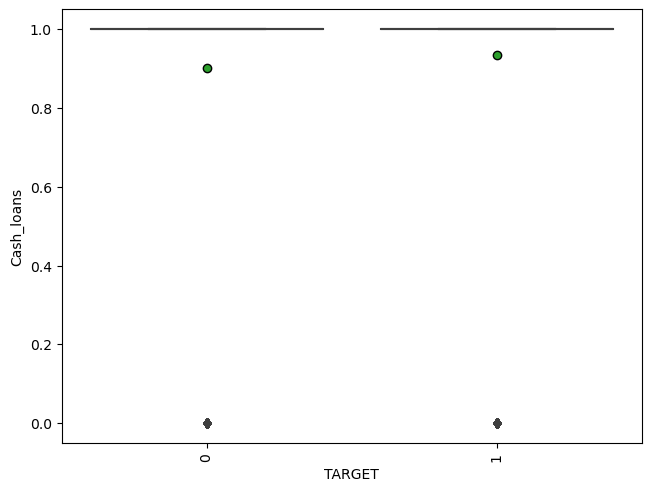

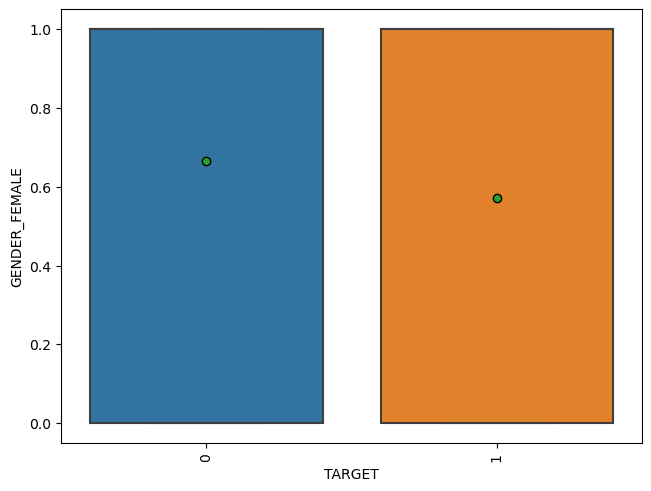

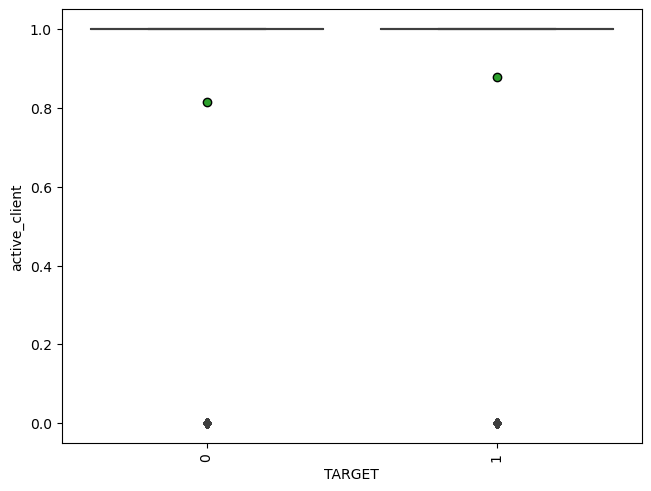

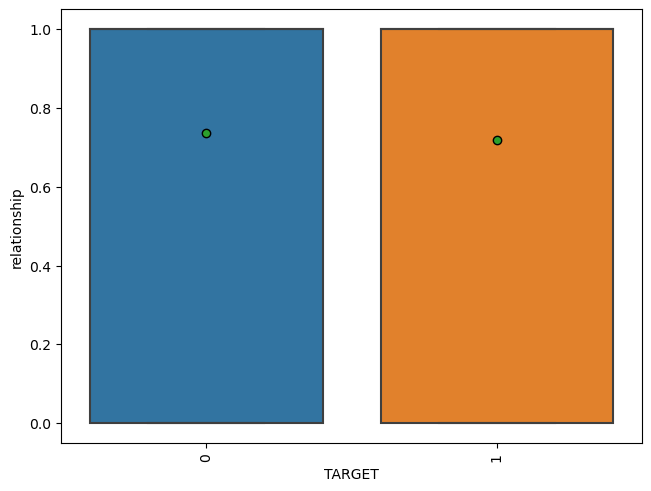

In [415]:
for col in col_train:
    plt.figure(constrained_layout=True)
    sns.boxplot(data=train_V1, x='TARGET', y=col, 
    showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
    plt.xticks(rotation = 90)
    plt.show()

In [416]:
num_feat=train_V1.select_dtypes(exclude=object).columns.to_list()
num_feat

['SK_ID_CURR',
 'TARGET',
 'FLAG_OWN_CAR',
 'OWN_CAR_AGE',
 'FLAG_OWN_REALTY',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'Prev_contract_nb',
 'Prev_AMT_CREDIT',
 'Refused_rate',
 'default_payment',
 'INCOME_CREDIT_PERC',
 'ANNUITY_INCOME_PERC',
 'PAYMENT_RATE',
 'client_age',
 'client_prof_exp',
 'INCOME_PER_PERSON',
 'Cash_loans',
 'GENDER_FEMALE',
 'active_client',
 'relationship']

In [417]:
cat_feat=train_V1.select_dtypes(include=object).columns.to_list()
cat_feat

['NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE']

C:\Users\xavie\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\xavie\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


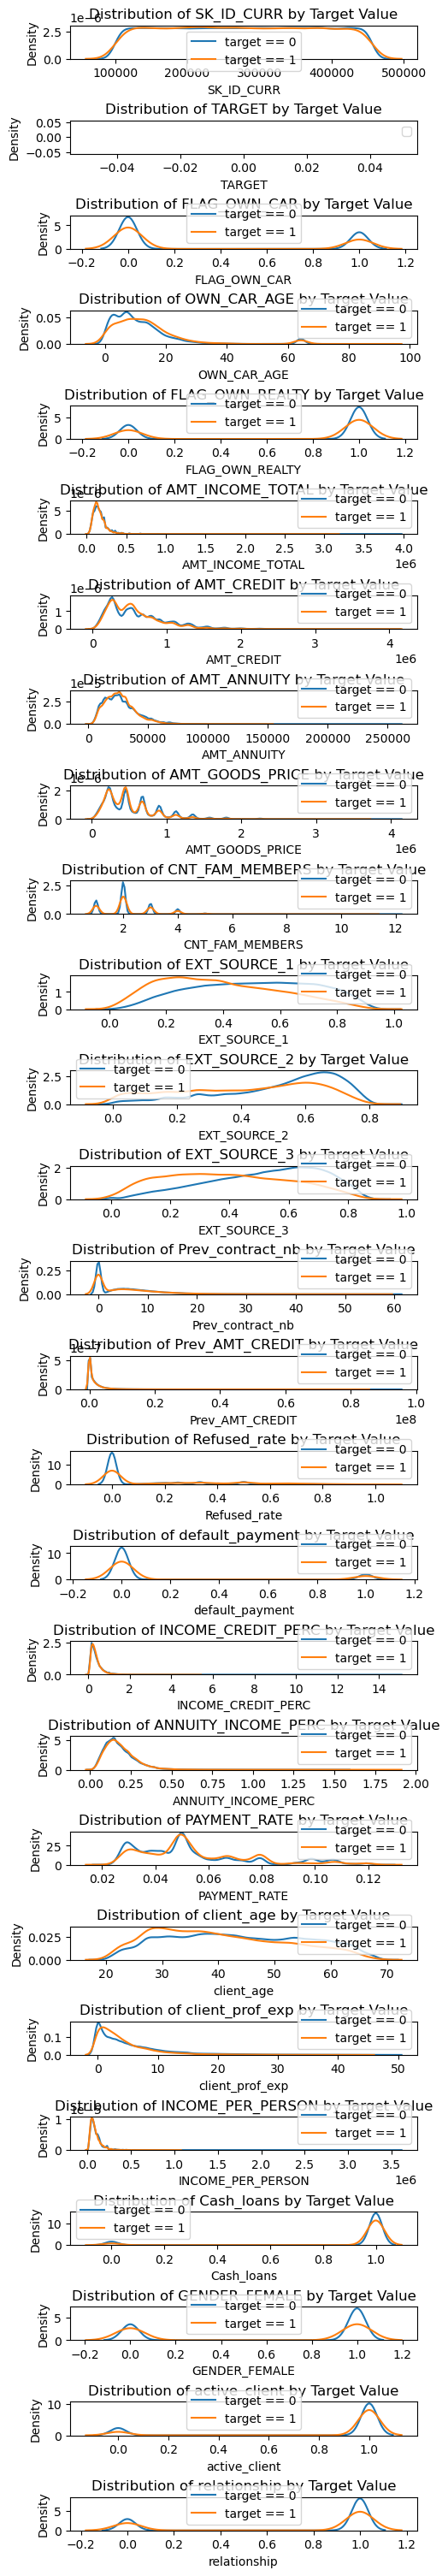

In [418]:
plt.figure(figsize = (5, 30),constrained_layout=True)

# iterate through the sources
for i, source in enumerate(num_feat):
    
    # create a new subplot for each source
    plt.subplot(len(num_feat), 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 0, source], label = 'target == 0').legend()
    # plot loans that were not repaid
    sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 1, source], label = 'target == 1').legend()
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
#plt.tight_layout(h_pad = 2.5)

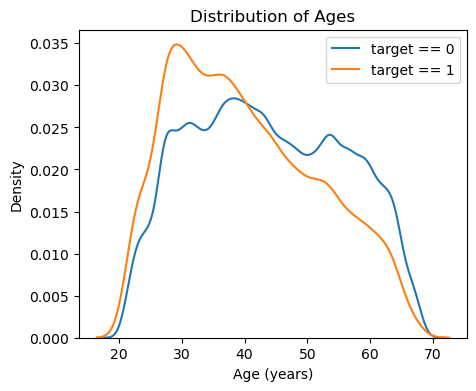

In [419]:
plt.figure(figsize = (5, 4))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 0, 'client_age'], label = 'target == 0').legend()

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 1, 'client_age'], label = 'target == 1').legend()

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

L'age des clients distinque la capacité de remboursement ou non

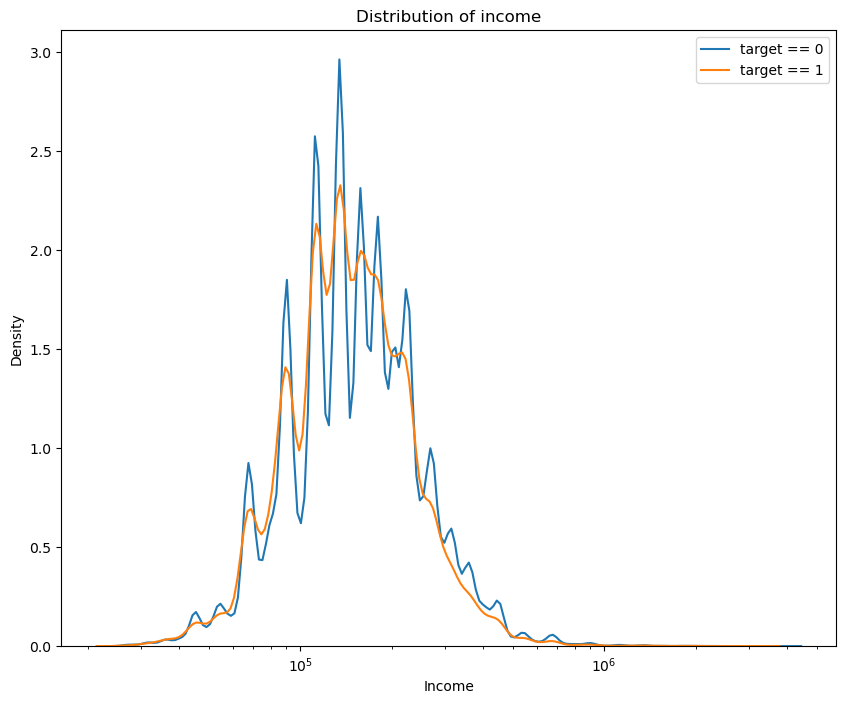

In [420]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 0, 'AMT_INCOME_TOTAL'],log_scale=True, label = 'target == 0').legend()

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 1, 'AMT_INCOME_TOTAL'], log_scale=True,label = 'target == 1').legend()

# Labeling of plot
plt.xlabel('Income'); plt.ylabel('Density'); plt.title('Distribution of income');

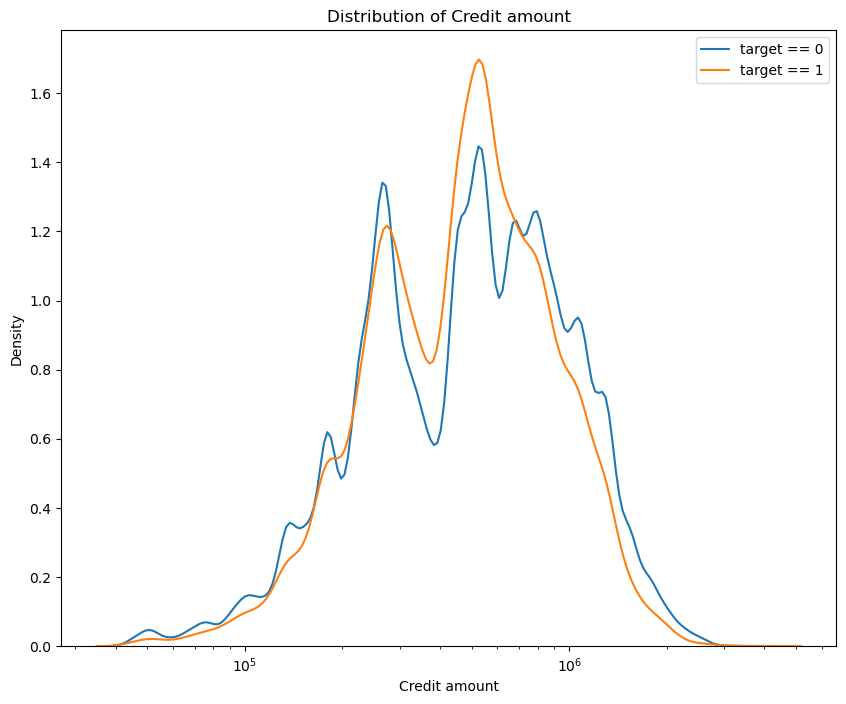

In [421]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 0, 'AMT_CREDIT'],log_scale=True, label = 'target == 0').legend()

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 1, 'AMT_CREDIT'], log_scale=True,label = 'target == 1').legend()

# Labeling of plot
plt.xlabel('Credit amount'); plt.ylabel('Density'); plt.title('Distribution of Credit amount');

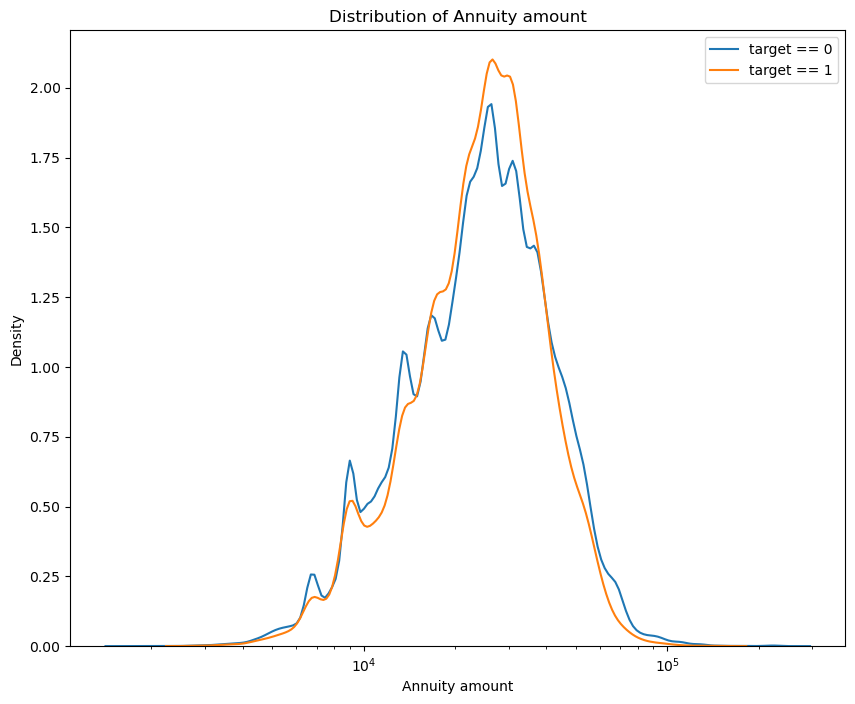

In [422]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 0, 'AMT_ANNUITY'],log_scale=True, label = 'target == 0').legend()

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 1, 'AMT_ANNUITY'], log_scale=True,label = 'target == 1').legend()

# Labeling of plot
plt.xlabel('Annuity amount'); plt.ylabel('Density'); plt.title('Distribution of Annuity amount');

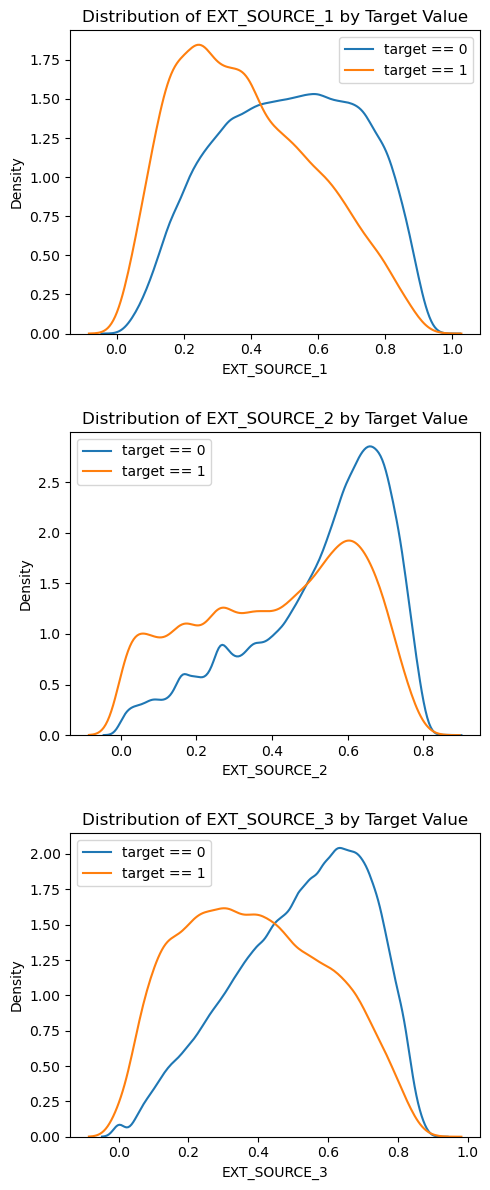

In [423]:
plt.figure(figsize = (5, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 0, source], label = 'target == 0').legend()
    # plot loans that were not repaid
    sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 1, source], label = 'target == 1').legend()
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

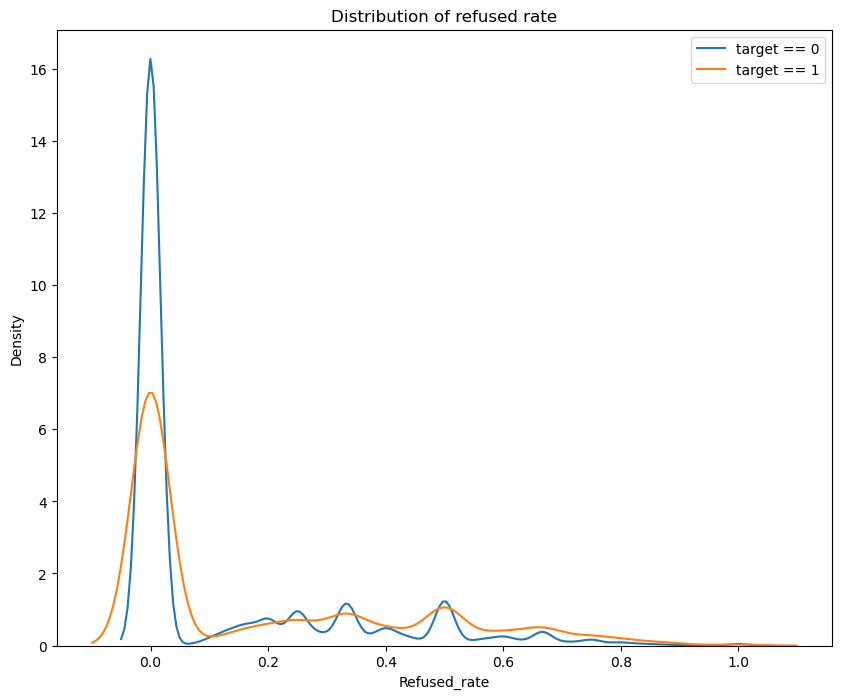

In [425]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 0, 'Refused_rate'], label = 'target == 0').legend()

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_V1.loc[train_V1['TARGET'] == 1, 'Refused_rate'],label = 'target == 1').legend()

# Labeling of plot
plt.xlabel('Refused_rate'); plt.ylabel('Density'); plt.title('Distribution of refused rate');

Les clients n'ayant jamais eu de refus de prêt ont logiquement une meilleure capacité à rembourser

### Variables catégorielles

#### NAME_EDUCATION_TYPE

#### Lien entre niveau scolaire et target


In [426]:
cont_table=pd.crosstab(train_V1.NAME_EDUCATION_TYPE,train_V1.TARGET)
cont_table['pct_KO']=round(cont_table[1]/(cont_table[0]+cont_table[1])*100,2)
cont_table

TARGET                              0      1  pct_KO
NAME_EDUCATION_TYPE                                 
Academic degree                   161      3    1.83
Higher education                70834   4009    5.36
Incomplete higher                9403    872    8.49
Lower secondary                  3397    417   10.93
Secondary / secondary special  198841  19518    8.94

#### Lien entre niveau scolaire et statut actif ou non

In [427]:
cont_table=pd.crosstab(train_V1.NAME_EDUCATION_TYPE,train_V1.active_client)
cont_table['pct_active']=round(cont_table[1]/(cont_table[0]+cont_table[1])*100,2)
cont_table

active_client                      0       1  pct_active
NAME_EDUCATION_TYPE                                     
Academic degree                   26     138       84.15
Higher education                8193   66650       89.05
Incomplete higher                521    9754       94.93
Lower secondary                 1529    2285       59.91
Secondary / secondary special  45111  173248       79.34

#### Lien entre niveau scolaire et type d'emploi


In [428]:
cont_table=pd.crosstab(train_V1.NAME_EDUCATION_TYPE,train_V1.NAME_INCOME_TYPE)
#cont_table['pct_KO']=round(cont_table[1]/cont_table[0]*100,2)
cont_table

NAME_INCOME_TYPE               Businessman  Commercial associate  \
NAME_EDUCATION_TYPE                                                
Academic degree                          0                    43   
Higher education                        10                 24021   
Incomplete higher                        0                  3398   
Lower secondary                          0                   460   
Secondary / secondary special            0                 43680   

NAME_INCOME_TYPE               Maternity leave  Pensioner  State servant  \
NAME_EDUCATION_TYPE                                                        
Academic degree                              0         26             23   
Higher education                             3       8187           8861   
Incomplete higher                            0        518            770   
Lower secondary                              0       1529            102   
Secondary / secondary special                2      45098          11942   

NAME_INCOME_TYPE               Student  Unemployed  Working  
NAME_EDUCATION_TYPE                                          
Academic degree                      0           0       72  
Higher education                     6           6    33749  
Incomplete higher                    1           3     5585  
Lower secondary                      0           0     1723  
Secondary / secondary special       11          13   117613

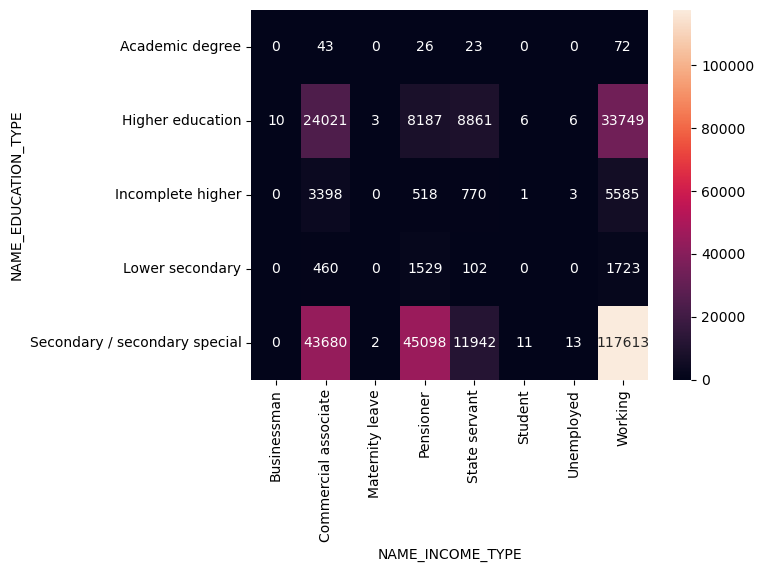

In [429]:
sns.heatmap(cont_table, annot= True, fmt=".0f")
plt.show()

#### NAME_INCOME_TYPE

In [430]:
cont_table=pd.crosstab(train_V1.NAME_INCOME_TYPE,train_V1.TARGET)
cont_table['pct_KO']=round(cont_table[1]/(cont_table[0]+cont_table[1])*100,2)
cont_table

TARGET                     0      1  pct_KO
NAME_INCOME_TYPE                           
Businessman               10      0    0.00
Commercial associate   66243   5359    7.48
Maternity leave            3      2   40.00
Pensioner              52377   2981    5.38
State servant          20449   1249    5.76
Student                   18      0    0.00
Unemployed                14      8   36.36
Working               143522  15220    9.59

In [431]:
cont_table=pd.crosstab(train_V1.NAME_INCOME_TYPE,train_V1.NAME_HOUSING_TYPE)
#cont_table['pct_KO']=round(cont_table[1]/cont_table[0]*100,2)
cont_table

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_INCOME_TYPE                                                                
Businessman                         0                 10                    0   
Commercial associate              295              62689                 2682   
Maternity leave                     0                  5                    0   
Pensioner                         116              52373                 2133   
State servant                      84              18643                 1034   
Student                             0                 13                    0   
Unemployed                          0                 17                    1   
Working                           627             139068                 5331   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_INCOME_TYPE                                                        
Businessman                          0                 0             0  
Commercial associate               508              1324          4104  
Maternity leave                      0                 0             0  
Pensioner                          316               204           216  
State servant                      533               292          1112  
Student                              2                 2             1  
Unemployed                           0                 1             3  
Working                           1258              3057          9401

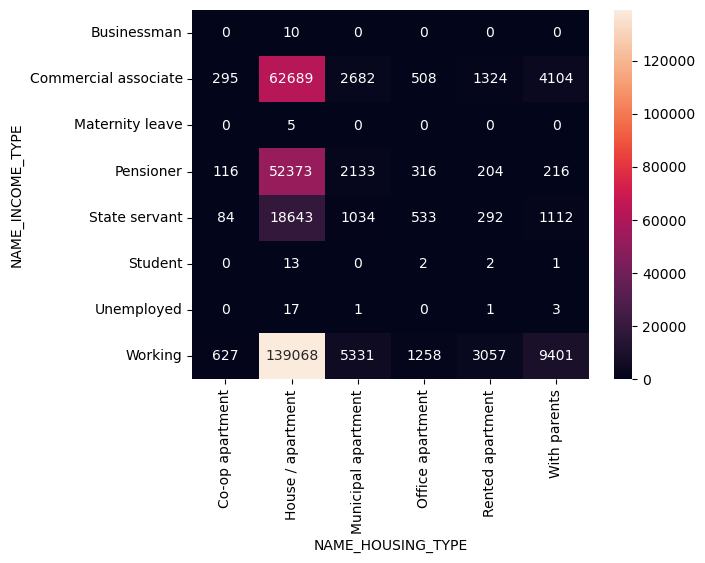

In [432]:
sns.heatmap(cont_table, annot= True, fmt=".0f")
plt.show()